In [2]:
%%capture --no-display
! pip install scipy
! pip install matplotlib 
! pip install seaborn

In [1]:
import json
import numpy as np
import pandas as pd
from src.pyipums.parse_xml import read_ipums_ddi
from ipumspy import readers, ddi
from matplotlib import pyplot as plt

In [2]:
ddi_file_path = "./cps_00003.xml"
data_file_path = "./cps_00003.dat.gz"

In [3]:
cps_ddi = read_ipums_ddi(ddi_file_path)
ddi_codebook = readers.read_ipums_ddi(ddi_file_path)

/Users/franciscojavierarceo/.pyenv/versions/3.8.16/lib/python3.8/site-packages/ipumspy/readers.py:47: CitationWarning: Use of data from IPUMS is subject to conditions including that users should cite the data appropriately.
See the `ipums_conditions` attribute of this codebook for terms of use.
See the `ipums_citation` attribute of this codebook for the appropriate citation.
  warnings.warn(


In [4]:
print(ddi_codebook.ipums_citation)

Publications and research reports based on the IPUMS-CPS database must cite it appropriately. The citation should include the following:

Sarah Flood, Miriam King, Renae Rodgers, Steven Ruggles, J. Robert Warren and Michael Westberry. Integrated Public Use Microdata Series, Current Population Survey: Version 10.0 [dataset]. Minneapolis, MN: IPUMS, 2022. https://doi.org/10.18128/D030.V10.0

The licensing agreement for use of IPUMS-CPS data requires that users supply us with the title and full citation for any publications, research reports, or educational materials making use of the data or documentation. Please add your citation to the IPUMS bibliography: http://bibliography.ipums.org/


In [5]:
xvars = [
    'AGE', 
    'ADJGINC', 
    'ASECWT', 
    'ASECWTH', 
    'ASIAN', 
    'ASECFWT', 
    'STATEFIP', 
    'TAXINC', 
    'UHRSWORK1', 
    'RACE', 
    'SEX', 
    'SRCWELFR', 
    'YEAR',
    'FOODSTAMP', 
    'STAMPVAL', 
    'WTFINL', 
    'BPL', 
    'HISPAN', 
    'EMPSTAT', 
    'LABFORCE', 
    'OCC', 
    'OCC2010',
    'MARST',
    'VETSTAT',
    'CITIZEN',
    'NATIVITY',
    'CLASSWKR',
    'WKSTAT',
    'EDUC',
    'OFFPOV',
    'EARNWT',
    'INCWAGE',
    'INCBUS',
    'INCFARM',
    'INCSS',
    'INCWELFR',
    'INCRETIR',
    'INCSSI',
    'INCINT',
    'INCUNEMP',
    'INCWKCOM',
    'INCVET',
    'INCSURV',
    'INCDISAB',
    'INCDIVID',
    'INCRENT',
    'INCEDUC',
    'INCCHILD',
    'INCASIST',
    'INCOTHER',
    'INCRANN',
    'INCPENS',
    'INCTOT',
]
ipums_df = readers.read_microdata(
    ddi_codebook,
    data_file_path,
    nrows=1e7,
    subset=xvars,
)
print(ipums_df)

         YEAR  ASECWTH  STATEFIP  STAMPVAL     WTFINL  ASECWT  AGE  SEX  RACE  \
0        2022      NaN         1      <NA>  1662.5757     NaN   36    2   100   
1        2022      NaN         1      <NA>  1978.1985     NaN   41    1   100   
2        2022      NaN         1      <NA>  1801.0842     NaN    5    2   100   
3        2022      NaN         1      <NA>  1243.6042     NaN    7    2   100   
4        2022      NaN         1      <NA>  2037.9611     NaN   50    2   200   
...       ...      ...       ...       ...        ...     ...  ...  ...   ...   
1869174  2023      NaN        56      <NA>   339.3124     NaN   43    2   100   
1869175  2023      NaN        56      <NA>   382.6062     NaN   46    1   100   
1869176  2023      NaN        56      <NA>   370.9985     NaN   50    2   100   
1869177  2023      NaN        56      <NA>   341.6635     NaN   74    1   100   
1869178  2023      NaN        56      <NA>   324.7941     NaN   71    2   100   

         MARST  ...  INCCHI

In [110]:
df = ipums_df[ipums_df['ASECWT'].isnull()==False].reset_index(drop=True)

invalids = {
    'INCSS':    999999,
    'INCWELFR': 999999.0,
    'INCRETIR': np.nan ,
    'INCSSI':   999999.0,
    'INCINT':   9999999.0,
    'INCUNEMP': 999999.0,
    'INCWKCOM': 999999.0,
    'INCVET':   9999999.0,
    'INCSURV':  9999999.0,
    'INCDISAB': 9999999,
    'INCDIVID': 9999999.0,
    'INCRENT':  9999999.0,
    'INCEDUC':  999999.0,
    'INCCHILD': 999999.0,
    'INCASIST': 9999999.0,
    'INCOTHER': 9999999.0,
    'INCRANN':  999999.0,
    'INCPENS':  999999.0,
    'TAXINC': 9999999.0,
    'INCTOT': np.nan,
    'INCWAGE': np.nan,
    'INCBUS': np.nan,
    'INCFARM': np.nan,
    'ADJGINC': np.nan,
}
for col in df.columns:
    if 'INC' in col:
        f = (df[col] == invalids[col]) | (df[col] == 99999.)
        if df[col].dtype == pd.Int64Dtype():
            f = f | (df[col] == invalids[col]) | (df[col] == 99999999) | (df[col] ==999999999) |  (df[col] == 999999)
        df[f"{col}_2"] = np.where(f, np.nan, df[col]) 

In [94]:
# # Some checks that can be done
# for k in {k: wd_buckets2[k] for k in wd_buckets2 if wd_buckets2[k] == 'Government'}:
#     print(df[f"{k}_2"].value_counts(True).head(), '\n')
    
# for k in {k: wd_buckets2[k] for k in wd_buckets2 if wd_buckets2[k] == 'Government'}:
#     print(df[f"{k}_2"].astype(float).describe(), '\n')

# Summing Up Wages

In [352]:
wd_buckets2 = {
    'INCSS':    'Government',
    'INCWELFR': 'Government',
    'INCRETIR': 'Investment',
    'INCSSI':   'Government',
    'INCINT':   'Investment',
    'INCUNEMP': 'Government',
    'INCWKCOM': 'Wage',
    'INCVET':   'Government',
    'INCSURV':  'Government',
    'INCDISAB': 'Government',
    'INCDIVID': 'Investment',
    'INCRENT':  'Investment',
    'INCEDUC':  'Government',
    'INCCHILD': 'Government',
    'INCASIST': 'Government',
    'INCOTHER': 'Unknown',
    'INCRANN':  'Investment',
    'INCPENS':  'Wage',
    'INCWAGE': 'Wage',
    'INCBUS': 'Wage',
    'INCFARM': 'Wage',
}

bd = {}
for bucket in set([wd_buckets2[k] for k in wd_buckets2]):
    for k in wd_buckets2:
        if wd_buckets2[k] == bucket:            
            if bucket not in bd:
                bd[bucket] = [f"{k}_2"]
            else:
                bd[bucket].append(f"{k}_2")
                
for k in bd:
    df[f"{k} Income"] = df[bd[k]].sum(axis=1)

In [353]:
df['Investment Income'].describe().round(0)

count     152732.0
mean        3524.0
std        19415.0
min        -9999.0
25%            0.0
50%            0.0
75%          135.0
max      1036013.0
Name: Investment Income, dtype: float64

In [354]:
df['Government Income'].describe().round(0)

count    152732.0
mean       3970.0
std        9538.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max      180000.0
Name: Government Income, dtype: float64

In [355]:
df['Wage Income'].describe().round(0)

count     152732.0
mean       32005.0
std        65812.0
min        -9999.0
25%            0.0
50%         5000.0
75%        45000.0
max      1939999.0
Name: Wage Income, dtype: float64

# Wage Decomp

21


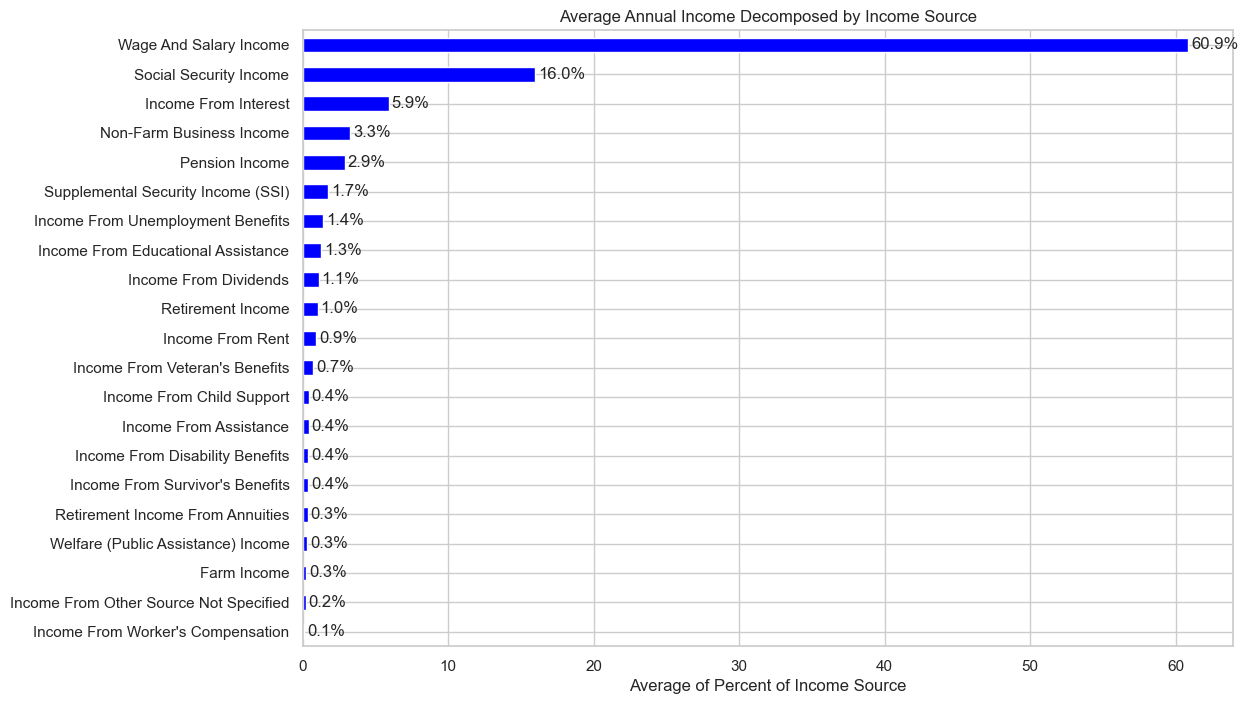

In [356]:
wd_buckets = {
    "Income From Worker's Compensation": "Wage",
    'Income From Other Source Not Specified': "Unknown",
    'Farm Income': "Wage",
    'Welfare (Public Assistance) Income': "Government",
    'Retirement Income From Annuities': "Investment",
    "Income From Survivor's Benefits": "Government",
    'Income From Disability Benefits': "Government",
    'Income From Assistance': "Government",
    'Income From Child Support': "Government",
    "Income From Veteran's Benefits": "Government",
    'Income From Rent': "Investment",
    'Retirement Income': "Investment",
    'Income From Dividends': "Investment",
    'Income From Educational Assistance': "Government",
    'Income From Unemployment Benefits': "Government",
    'Supplemental Security Income (SSI)': "Government",
    'Pension Income': "Wage",
    'Non-Farm Business Income': "Wage",
    'Income From Interest': "Investment",
    'Social Security Income': "Government",
    'Wage And Salary Income': "Wage",
}

print(len(wd_buckets))

tmp = df[
    [f"{k}_2" for k in invalids]
].div(np.where(df["INCTOT_2"]!=0, df["INCTOT_2"], np.nan), axis=0).multiply(df['ASECWT'], axis=0).div(df['ASECWT'], axis=0)
tmp.columns = [f"PRCNT_{k}" for k in tmp.columns]
wage_decomp = tmp.mean().drop({"PRCNT_ADJGINC_2", "PRCNT_TAXINC_2", "PRCNT_INCTOT_2"}).sort_values() * 100.
wage_decomp.index = [
    ddi_codebook.get_variable_info(
        x.replace("PRCNT_", "").replace("_2", "")
    ).label.title().replace("Income From Ssi", "Supplemental Security Income (SSI)").replace("'S", "'s")
    for x in wage_decomp.index
]

ax = wage_decomp.plot(kind='barh', color='blue', title="Average Annual Income Decomposed by Income Source")

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=2)

plt.xlabel("Average of Percent of Income Source")
plt.show()

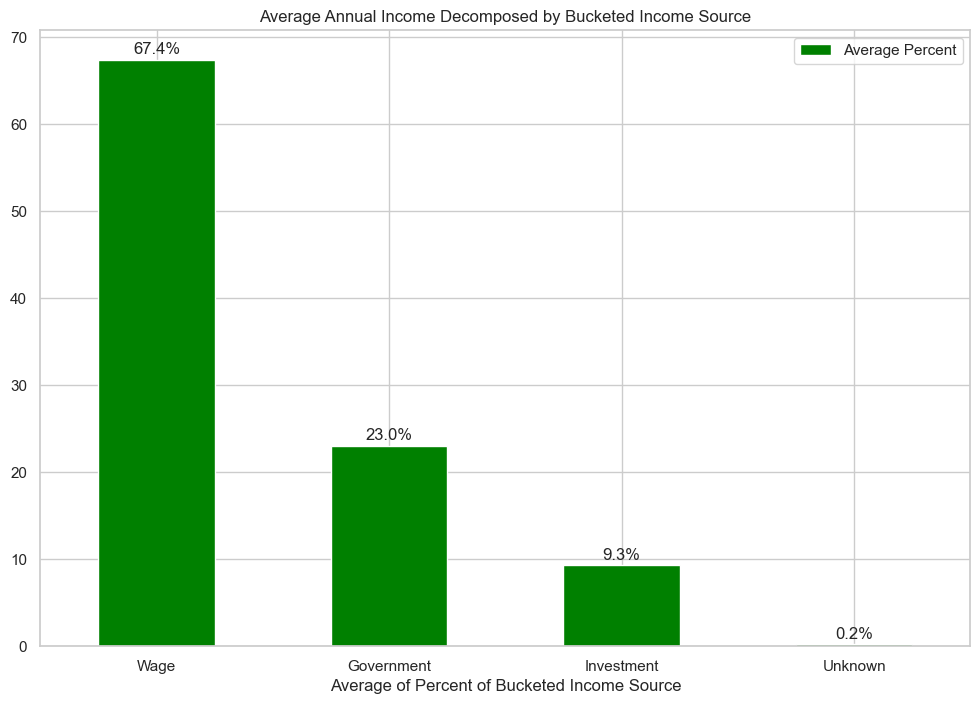

In [357]:
wdf = pd.DataFrame(wage_decomp, columns=['percent'])
wdf['Bucketed Income Source']= [wd_buckets[d] for d in wdf.index]
wdf2 = pd.DataFrame(wdf.groupby(by='Bucketed Income Source').sum()).sort_values(by='percent', ascending=False)
wdf2.rename({"percent": "Average Percent"}, axis=1, inplace=True)
ax = wdf2.plot(kind='bar', color='green', title="Average Annual Income Decomposed by Bucketed Income Source")

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=2)

plt.xlabel("Average of Percent of Bucketed Income Source")
plt.xticks(rotation='horizontal')
plt.show()

In [358]:
def map_codes(ddi, xdf, xvar):
    g = {v:k for k,v in ddi.get_variable_info(xvar).codes.items()}
    res = xdf[xvar].apply(lambda x: g.get(x, None))
    return res

EDUC_LT_HS = 'Less than High School Diploma'
EDUC_HS = 'High school diploma or equivalent'
EDUC_VOC = 'Vocational Degree'
EDUC_BS = "Bachelor's degree"
EDUC_GRAD = "Graduate degree"
educ_attain = {
    'NIU or blank': 'Missing',
    'Grades 1, 2, 3, or 4': EDUC_LT_HS,
    'Grades 5 or 6': EDUC_LT_HS,
    'Grades 7 or 8': EDUC_LT_HS,
    'Grade 9': EDUC_LT_HS,
    'Grade 10': EDUC_LT_HS,
    'Grade 11': EDUC_LT_HS,
    '12th grade, no diploma': EDUC_LT_HS,
    'None or preschool': EDUC_LT_HS,
    'High school diploma or equivalent': EDUC_HS,
    "Associate's degree, academic program": EDUC_HS,
    "Associate's degree, occupational/vocational program": EDUC_VOC,
    'Some college but no degree': EDUC_HS,
    "Bachelor's degree": EDUC_BS,
    "Master's degree": EDUC_GRAD,
    'Doctorate degree': EDUC_GRAD,
    'Professional school degree': EDUC_GRAD,
}

df['Occupation'] = map_codes(ddi_codebook, df, 'OCC2010')
df['Education'] = map_codes(ddi_codebook, df, 'EDUC')
df['Educational_Attainment'] = df['Education'].apply(lambda x: educ_attain.get(x)).astype(str)
df['Birthplace'] = map_codes(ddi_codebook, df, 'BPL')
df['Marital_Status'] = map_codes(ddi_codebook, df, 'MARST')
df['Nativity'] = map_codes(ddi_codebook, df, 'NATIVITY')
df['Class_of_worker'] = map_codes(ddi_codebook, df, 'CLASSWKR')
df['Hispanic'] = map_codes(ddi_codebook, df, 'HISPAN')
df['Asian'] = map_codes(ddi_codebook, df, 'ASIAN')
df['Race'] = map_codes(ddi_codebook, df, 'RACE')
df['Veteran_Status'] = map_codes(ddi_codebook, df, 'VETSTAT')
df['Age_bucket'] = "Age " + pd.qcut(df['AGE'], q=5).astype(str)
df['income_null'] = df['INCTOT_2'].isnull()

In [359]:
def pt(ddi: ddi.Codebook, df: pd.DataFrame, xvar: str, wvar: str=None):
    if ddi:
        codex = pd.DataFrame.from_dict(ddi.get_variable_info(xvar).codes, orient='index', columns=['code'])
        codex.reset_index(inplace=True)
        codex.rename({"index": xvar}, axis=1, inplace=True)
    if wvar:
        aggdf = df[[xvar, wvar]].groupby(by=xvar, as_index=False).agg({wvar: [np.sum, len]})
        aggdf.columns = ['_'.join([y for y in j if y != '']) for j in aggdf.columns]
        aggdf.rename({xvar: "code", f"{wvar}_sum": "count", f"{wvar}_len": "raw_count"}, inplace=True, axis=1)
        aggdf['raw_percent'] = aggdf['raw_count'] / aggdf['raw_count'].sum()
    else:
        aggdf = pd.DataFrame(
            df[xvar].value_counts().reset_index()
        ).rename({"index": 'code', xvar: 'count'}, axis=1)
        
    aggdf['Percent'] = aggdf['count'] / aggdf['count'].sum()
    if ddi:
        outdf = aggdf.merge(codex, how='left', left_on='code', right_on='code')    
    else:
        outdf = aggdf.rename({"code": xvar}, axis=1)
    outdf.sort_values(by='count', ascending=False, inplace=True)
    outdf.reset_index(drop=True, inplace=True)
    if ddi:
        outdf = outdf[[xvar] + outdf.columns[0:-1].to_list()]
    return outdf

def ptbarplot(ddi, df, xvar, wvar, color='blue', out=False):
    x = pt(ddi, df, xvar, wvar)
    try:
        ylabel = ddi.get_variable_info(xvar).label.title()
    except:
        ylabel = xvar
    x['Percent'] = (x['Percent'] * 100.).round(2)

    y = x[['Percent', xvar]].sort_values(by='Percent', ascending=False).reset_index(drop=True).loc[0:30]
    ax = y.sort_values(by='Percent').plot.barh(x=xvar, color=color, figsize=(12, 8))

    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f%%', padding=2)

    plt.legend(loc='lower right')
    plt.ylabel(ylabel)
    plt.xlabel("Percent of ASEC Sample")
    plt.show()    
    if out:
        return x

In [360]:
df['RACE_ORIGINAL'] = df['RACE']
x = pt(None, df, 'Race', 'ASECWT')
races = list(x.iloc[0:4,0].values)

df['Race_top_5'] = df['Race'].apply(lambda x: x if x in races else 'Other')

df['Race_full'] = np.where(df['Hispanic']!='Not Hispanic', 'Hispanic', df['Race_top_5'])

In [361]:
df['INCTOT_3'] = np.where(
    df['INCTOT_2'].fillna(0) < 0, 
    0, 
    df['INCTOT_2'].fillna(0)
)

df['Income Buckets'] = pd.qcut(df['INCTOT_3'], 10, duplicates='drop')

In [362]:
def clean_dollars(x):
    y = x.split(", ")
    left = round(float(y[0].replace("(", "")))
    right = round(float(y[1].replace("]", "")))
    output = f"(\${left:,}, \${right:,}]"
    return output

In [363]:
pt(ddi_codebook, df, 'LABFORCE')

LABFORCE  code  count   Percent
0     Yes, in the labor force     2  73863  0.483612
1  No, not in the labor force     1  46751  0.306098
2                         NIU     0  32118   0.21029

In [364]:
df2 = df[df.LABFORCE==2].reset_index(drop=True)

In [365]:
sdf = pd.crosstab(
    df2['Income Buckets'].astype(str).apply(lambda x: clean_dollars(x)), 
    df2['Race_full'], 
    df2['ASECWT'], 
    aggfunc = len
).rename_axis(None, axis=1)

In [366]:
print('Percent of Total')
(sdf.div(sdf.sum().sum()) * 100).round(1).style.background_gradient(axis=None, cmap='coolwarm').format('{:,.1f}%')

Percent of Total


In [367]:
print('Percent Down Columns')
(sdf.div(sdf.sum(axis=0)) * 100).round(1).style.background_gradient(axis=0, cmap='coolwarm').format('{:,.1f}%')

Percent Down Columns


In [368]:
print('Percent Across Rows')
(sdf.divide(sdf.sum(axis=1), axis=0) * 100).round(1).style.background_gradient(
    axis=1, cmap='coolwarm').format('{:,.1f}%')

Percent Across Rows


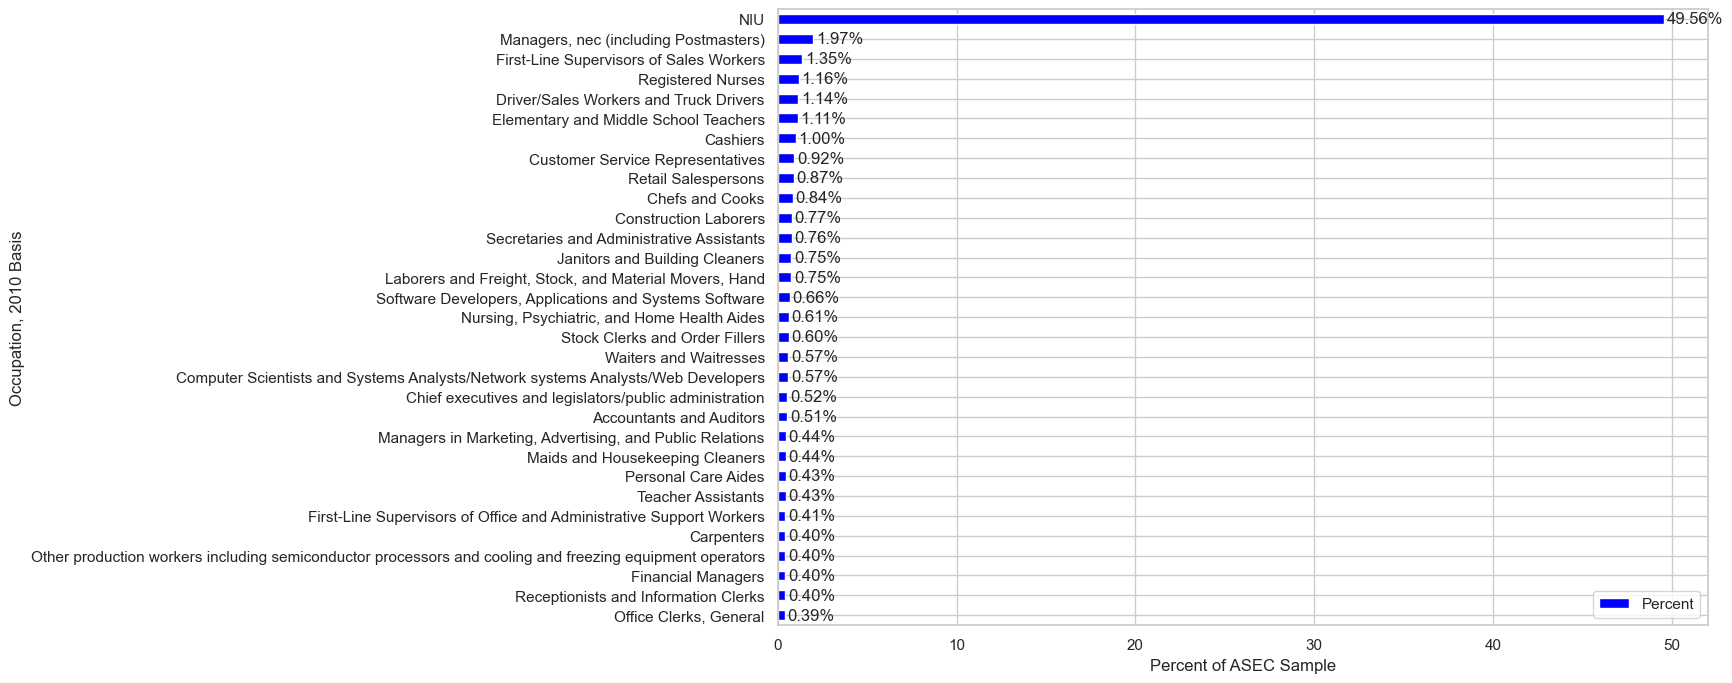

In [369]:
# ptbarplot(ddi_codebook, df[df['OCC2010']!=9999], 'OCC2010', 'ASECWT', color='blue')
ptbarplot(ddi_codebook, df, 'OCC2010', 'ASECWT', color='blue')

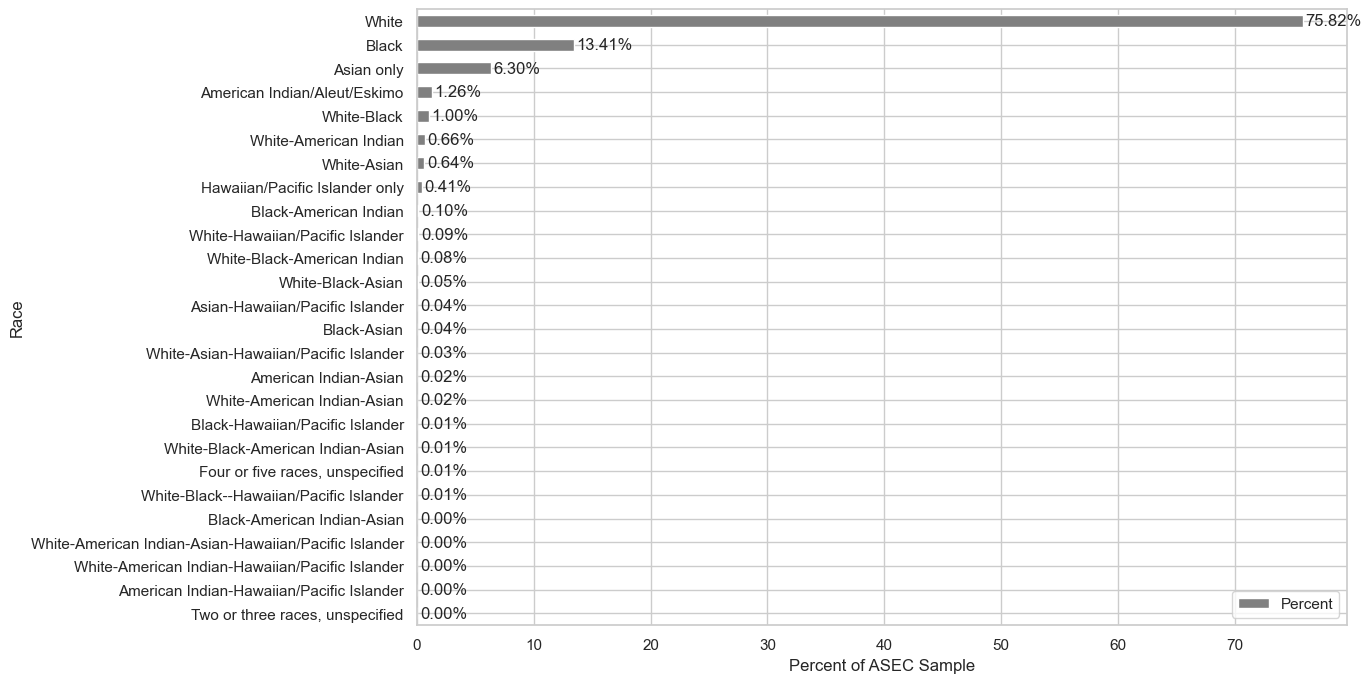

In [370]:
ptbarplot(ddi_codebook, df, 'RACE', 'ASECWT', color='gray')

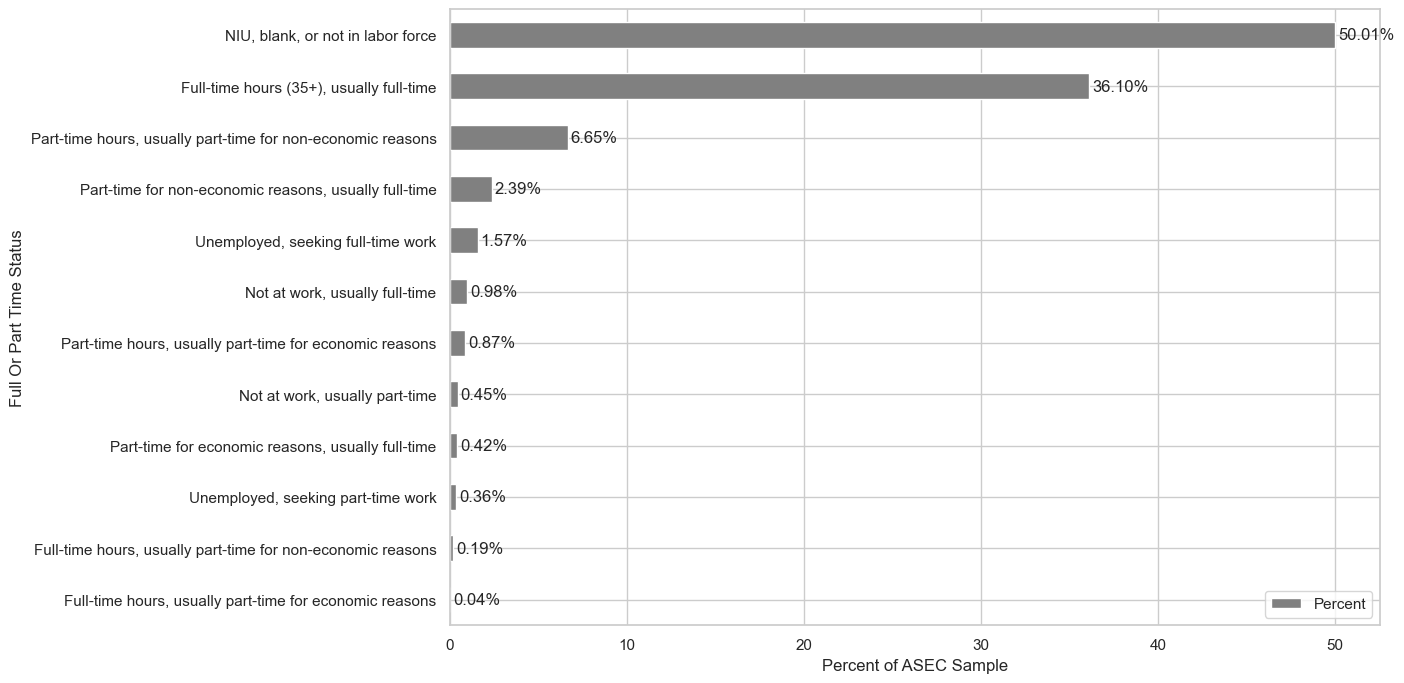

In [371]:
ptbarplot(ddi_codebook, df, 'WKSTAT', 'ASECWT', color='gray')

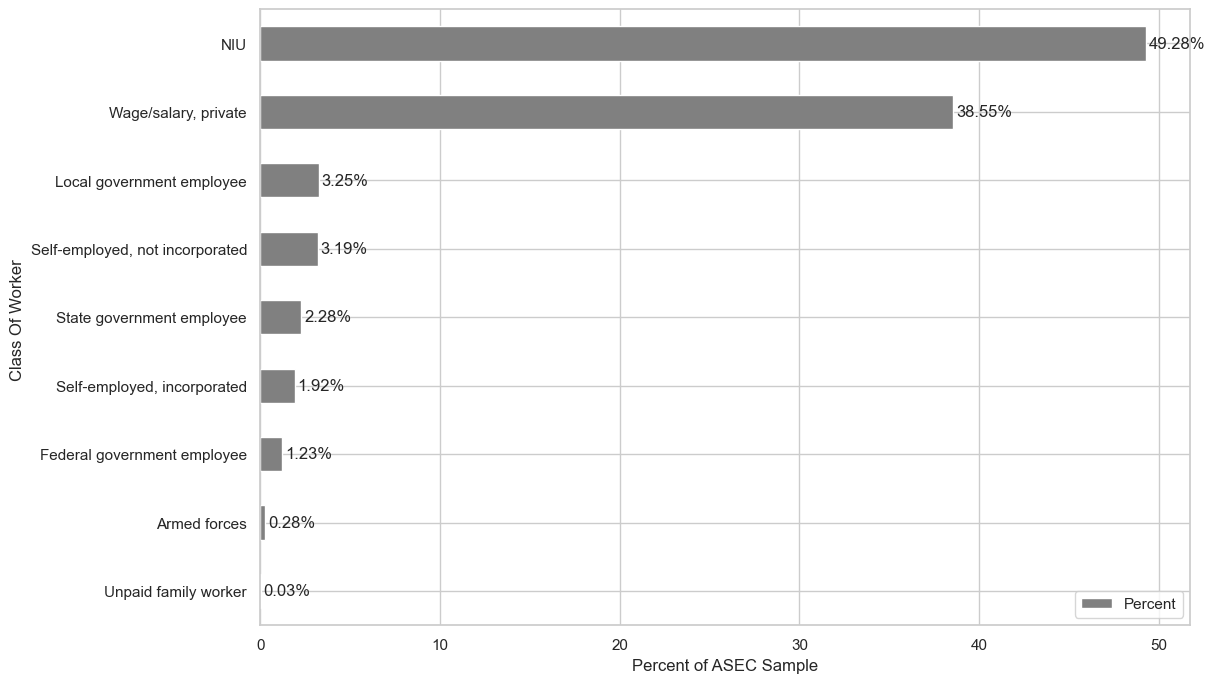

In [372]:
ptbarplot(ddi_codebook, df, 'CLASSWKR', 'ASECWT', color='gray')

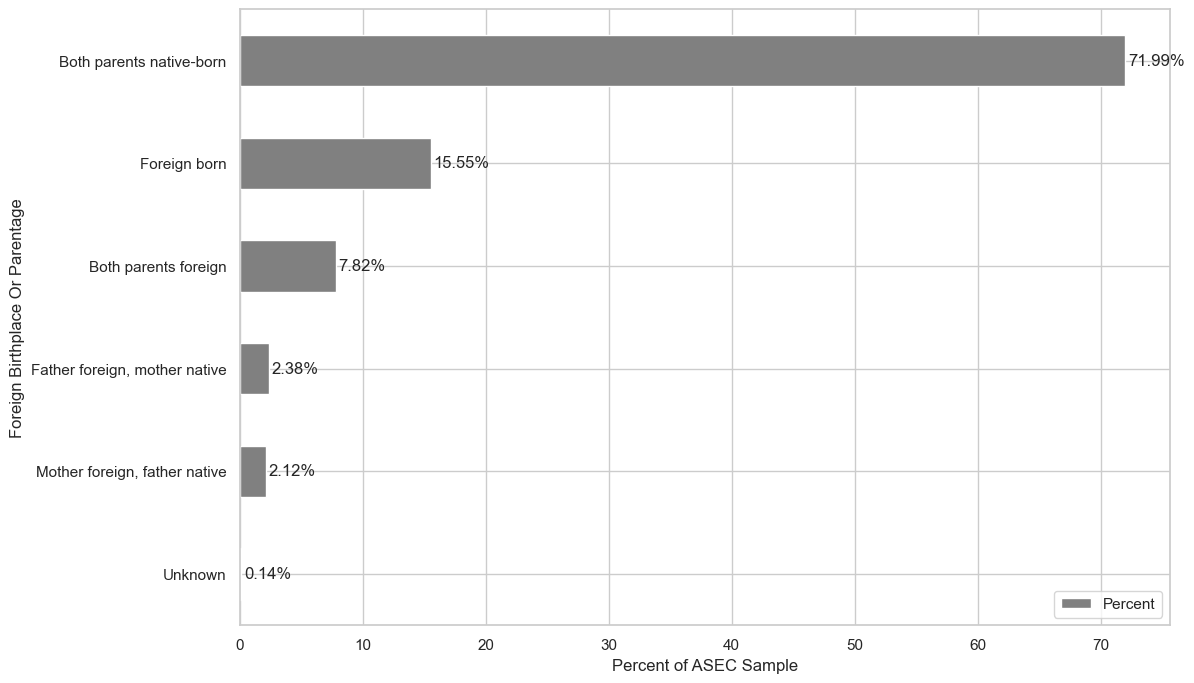

In [373]:
ptbarplot(ddi_codebook, df, 'NATIVITY', 'ASECWT', color='gray')

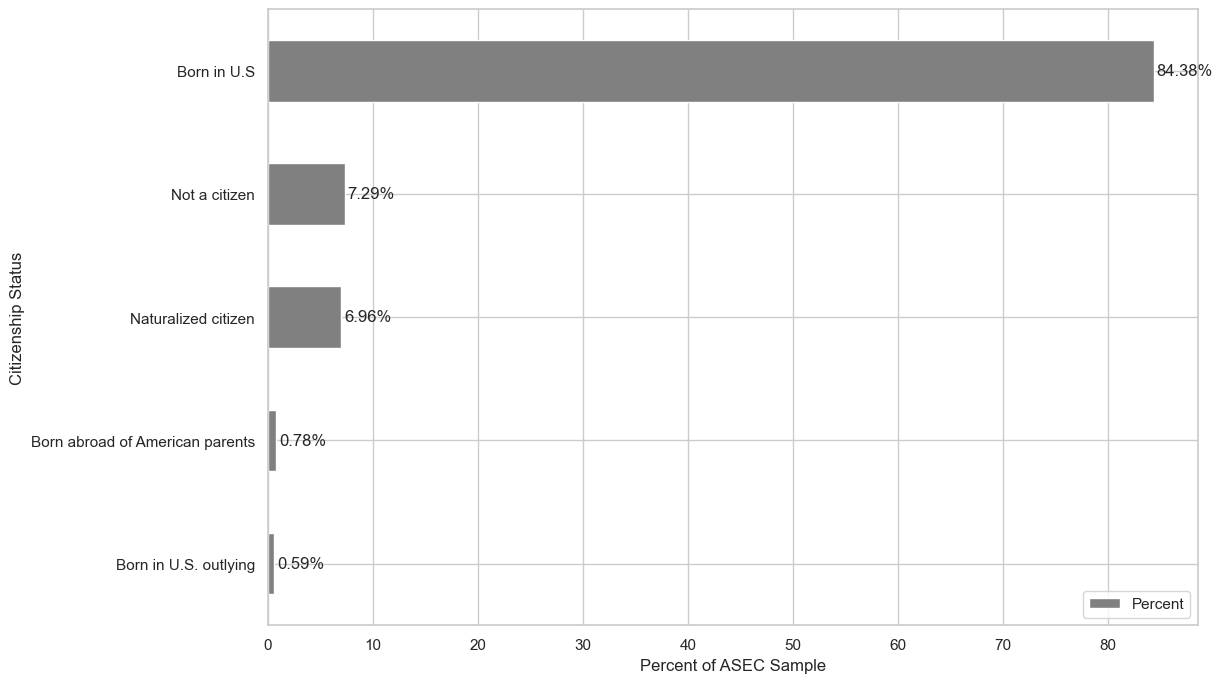

In [374]:
ptbarplot(ddi_codebook, df, 'CITIZEN', 'ASECWT', color='gray')

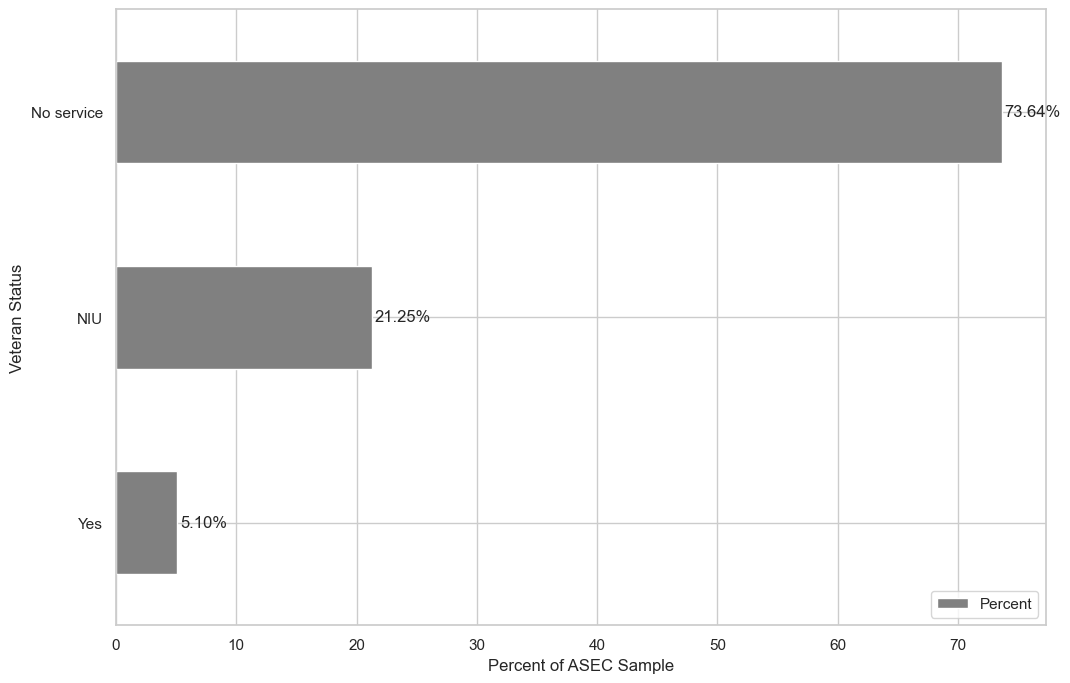

In [375]:
ptbarplot(ddi_codebook, df, 'VETSTAT', 'ASECWT', color='gray')

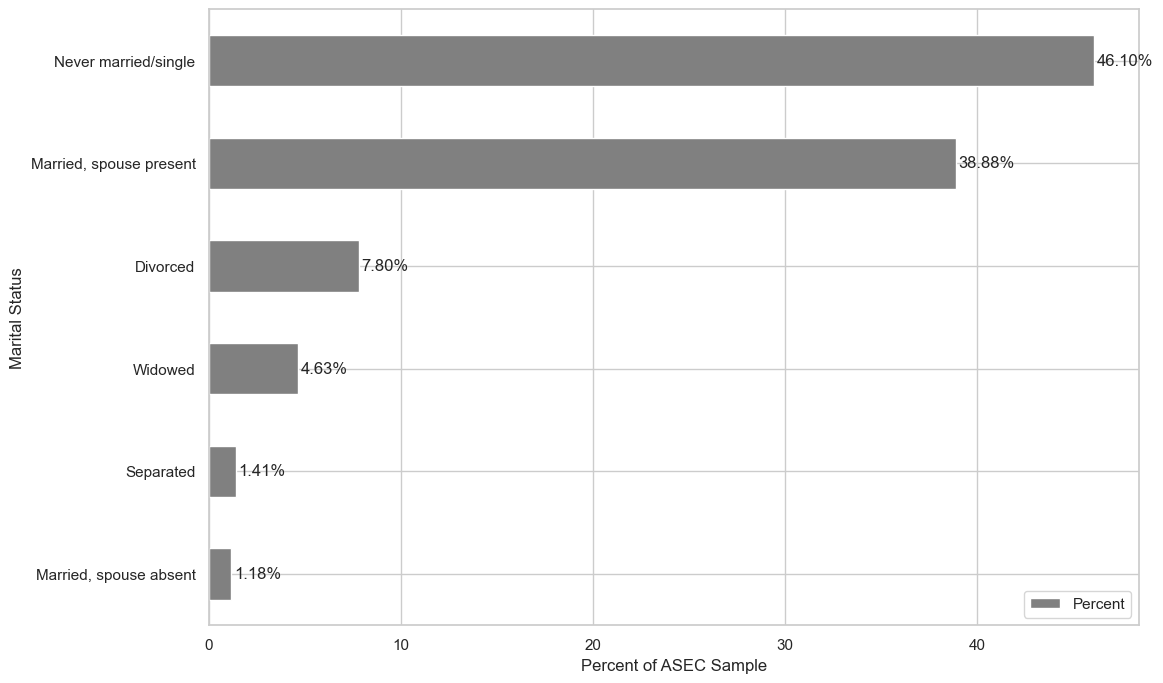

In [376]:
ptbarplot(ddi_codebook, df, 'MARST', 'ASECWT', color='gray')

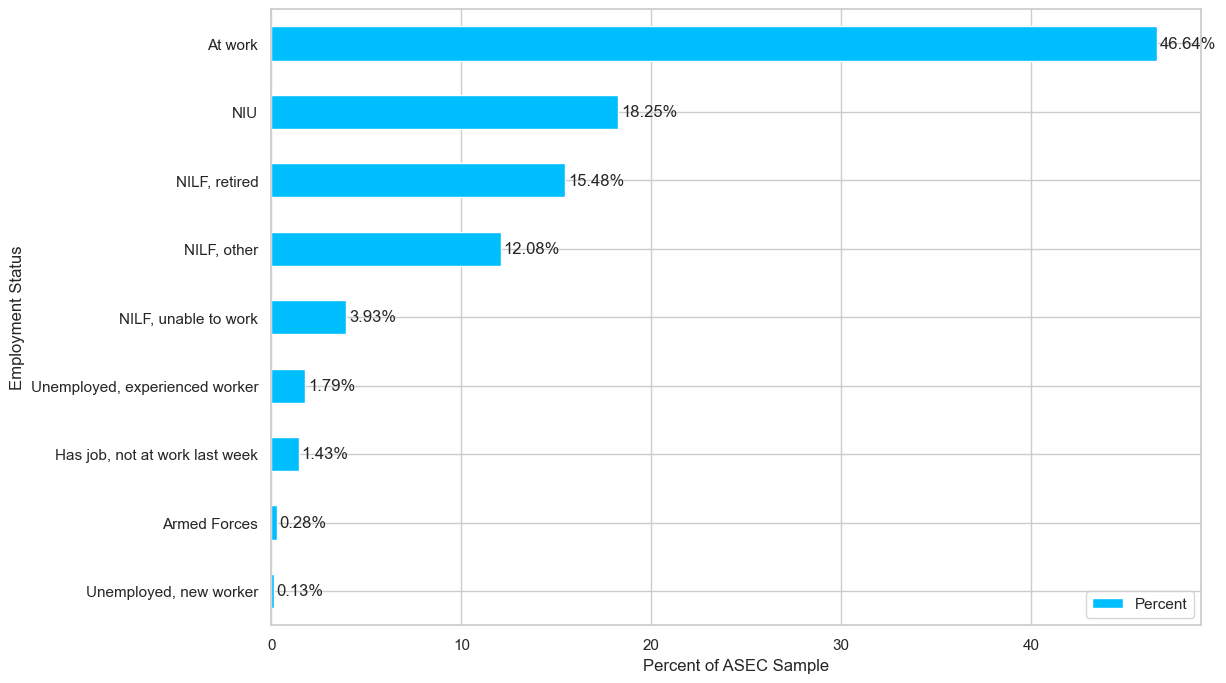

In [377]:
ptbarplot(ddi_codebook, df, 'EMPSTAT', 'ASECWT', color='deepskyblue')

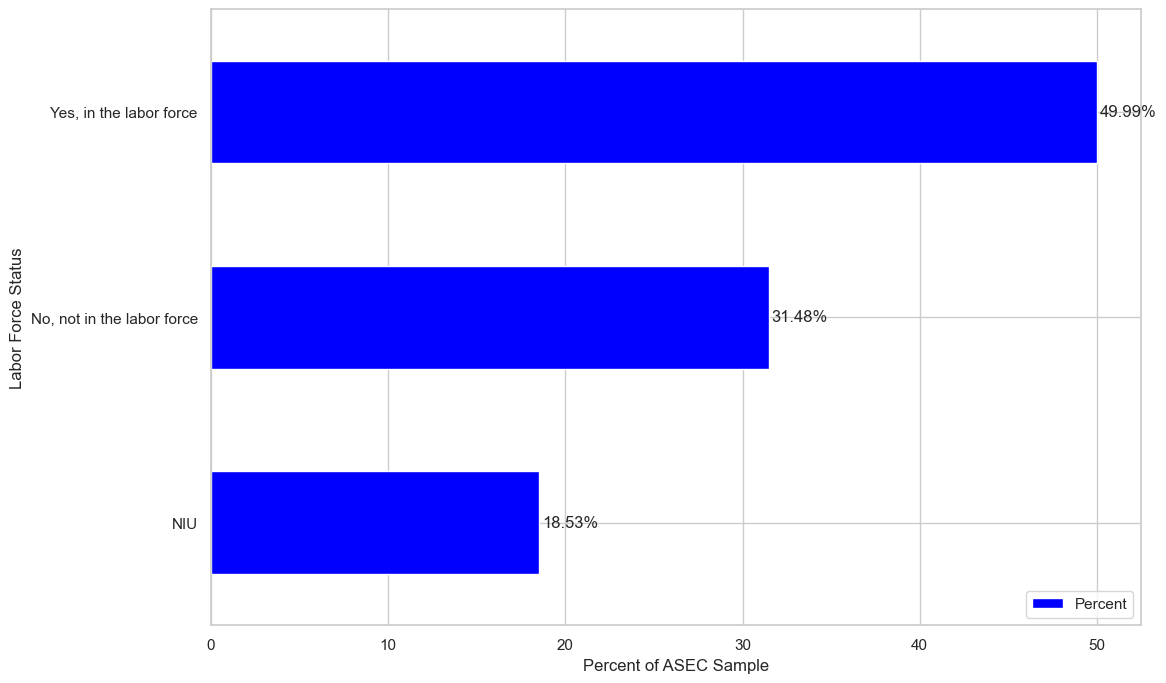

In [378]:
ptbarplot(ddi_codebook, df, 'LABFORCE', 'ASECWT', color='blue')

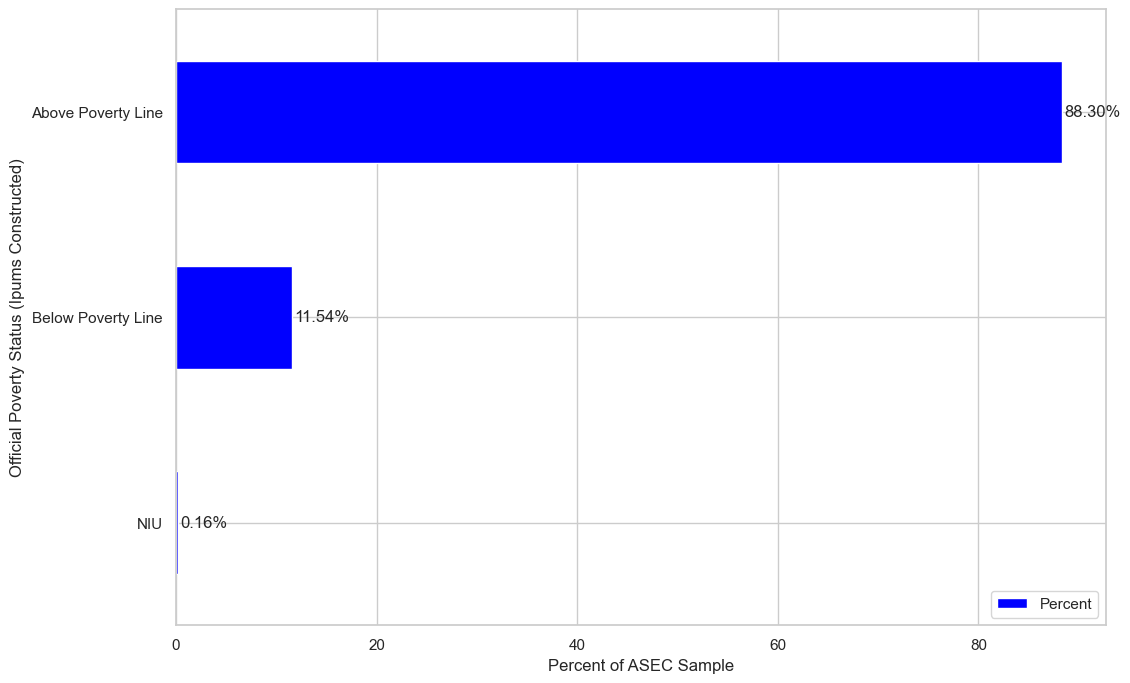

In [379]:
ptbarplot(ddi_codebook, df, 'OFFPOV', 'ASECWT', color='blue')

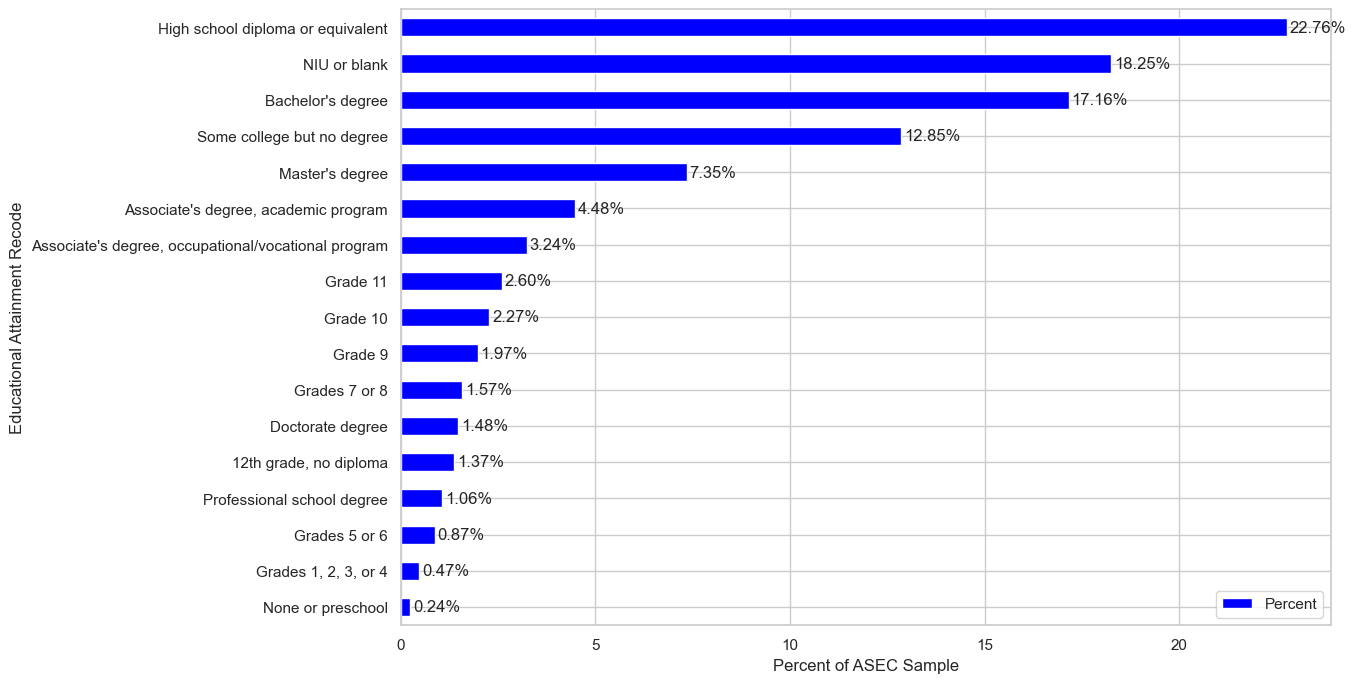

In [380]:
ptbarplot(ddi_codebook, df, 'EDUC', 'ASECWT',  color='blue')

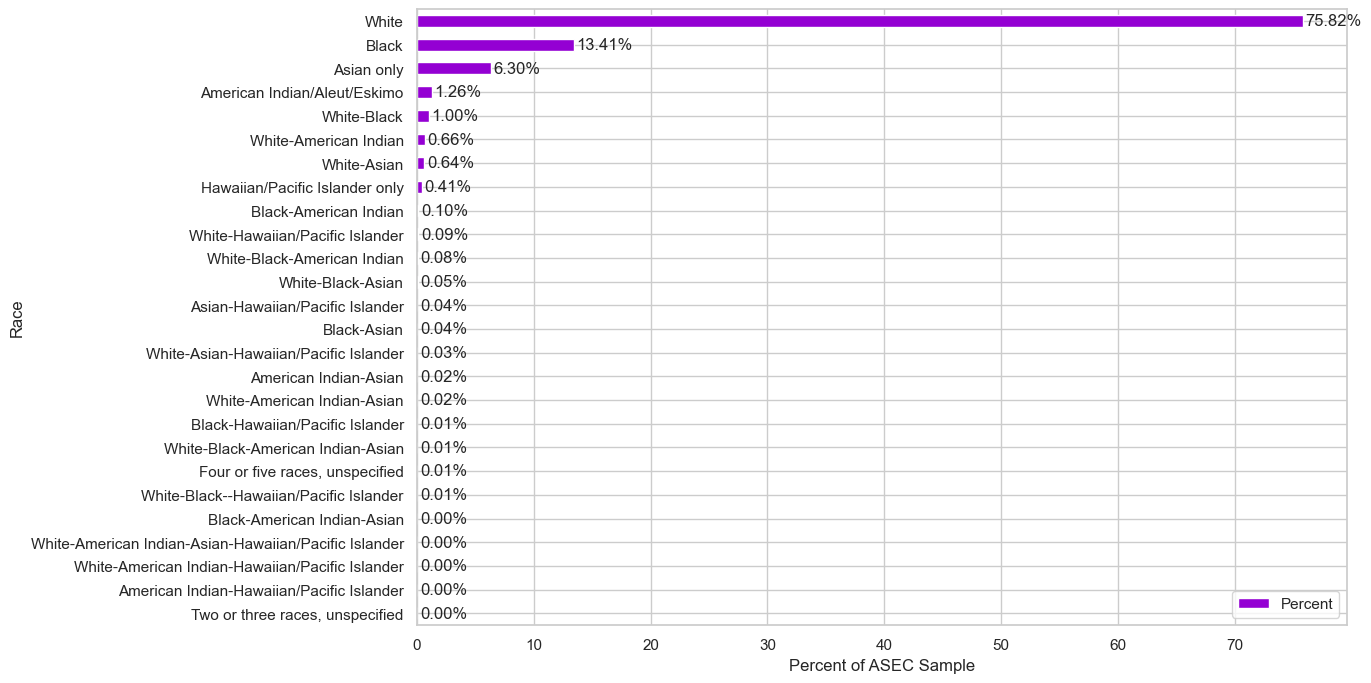

In [381]:
ptbarplot(ddi_codebook, df, 'RACE', 'ASECWT', color='darkviolet')

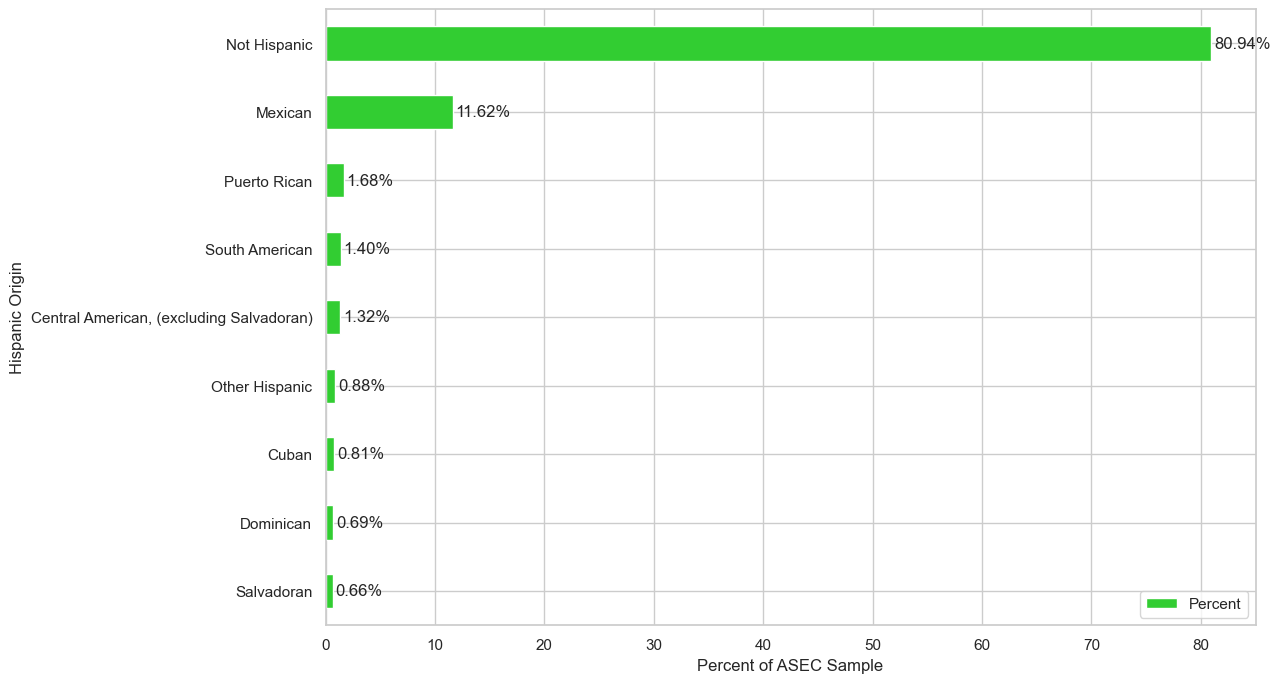

In [382]:
ptbarplot(ddi_codebook, df, 'HISPAN', 'ASECWT', color='limegreen')

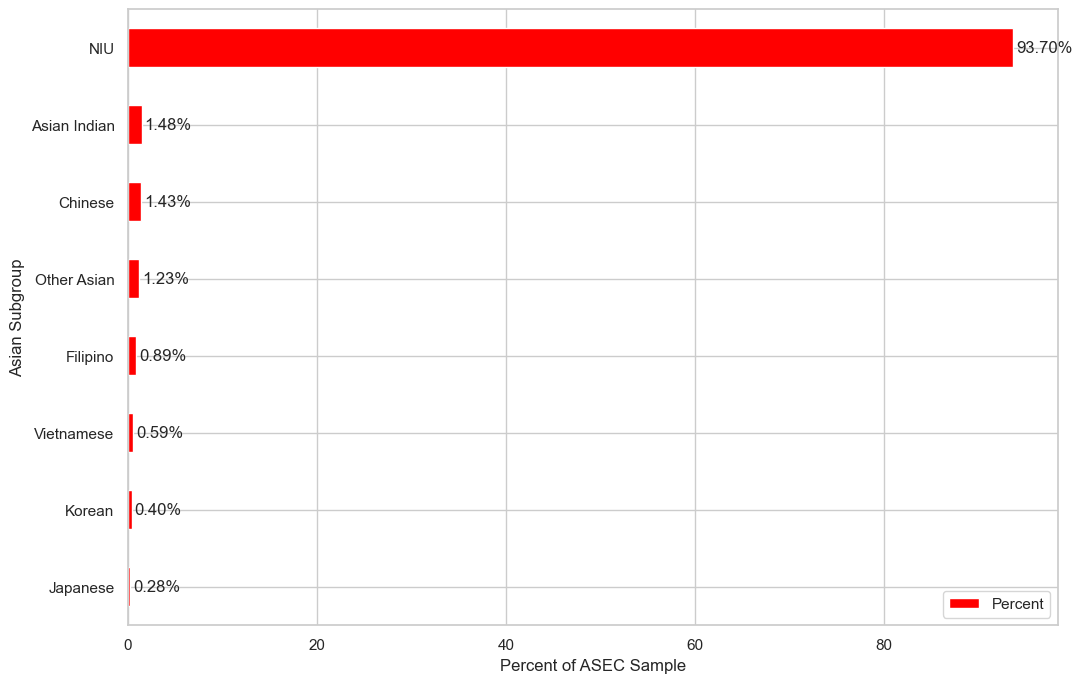

In [383]:
ptbarplot(ddi_codebook, df, 'ASIAN', 'ASECWT', color='red')

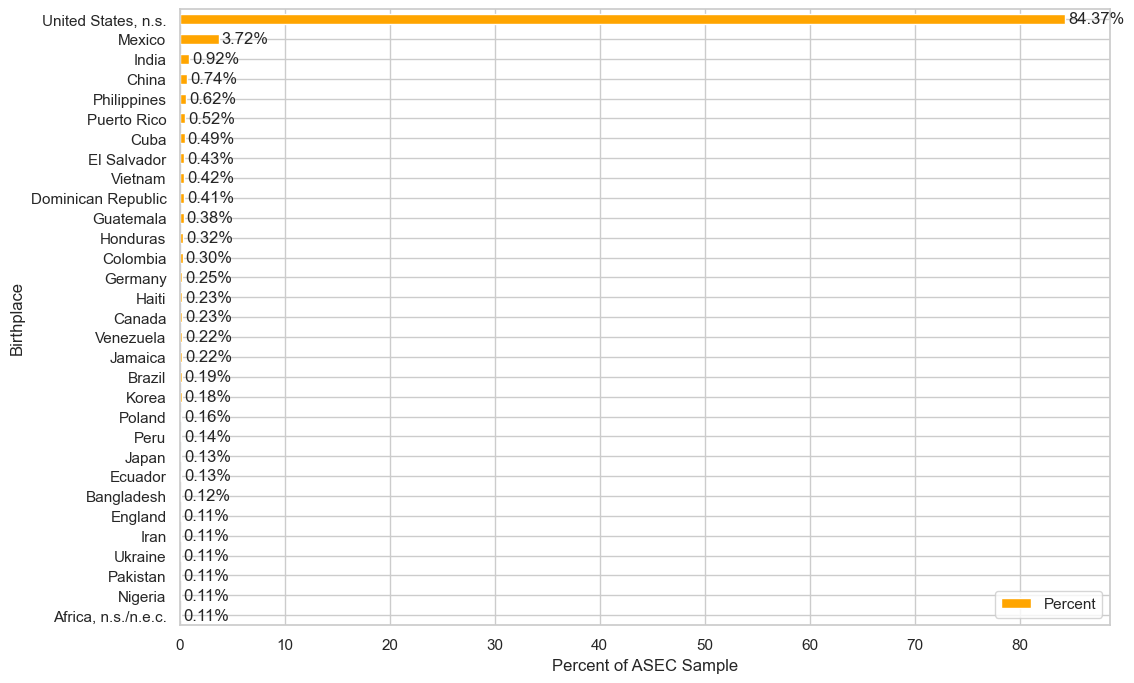

In [384]:
ptbarplot(ddi_codebook, df, 'BPL', 'ASECWT', color='orange')

<Axes: >

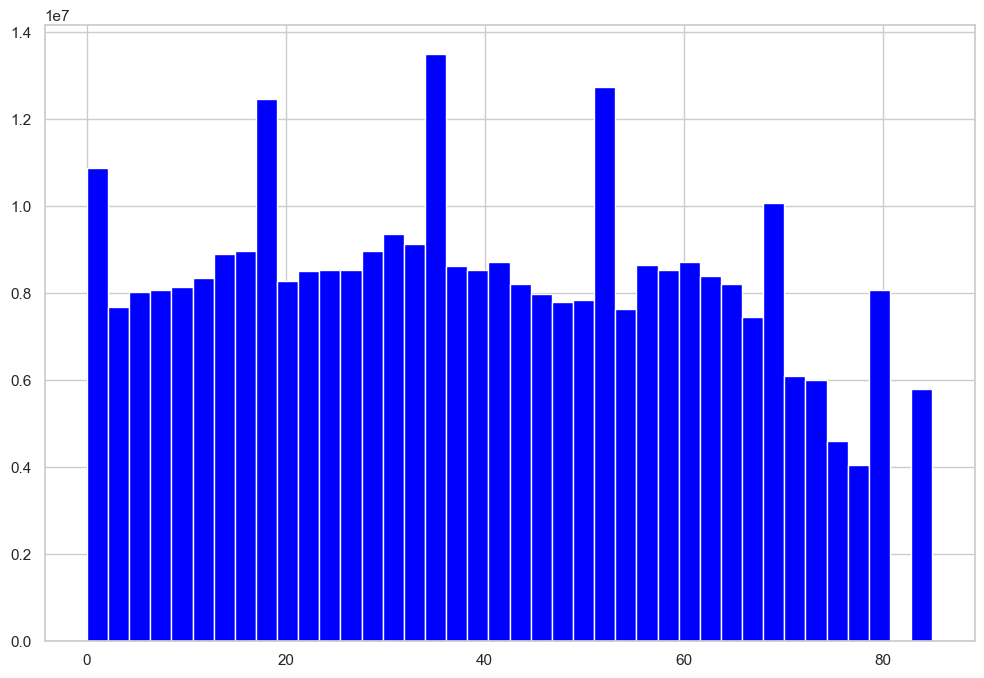

In [385]:
df['AGE'].hist(weights=df['ASECWT'], color='blue', bins=40)

count     121117
unique     35192
top            0
freq       14476
Name: INCTOT_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


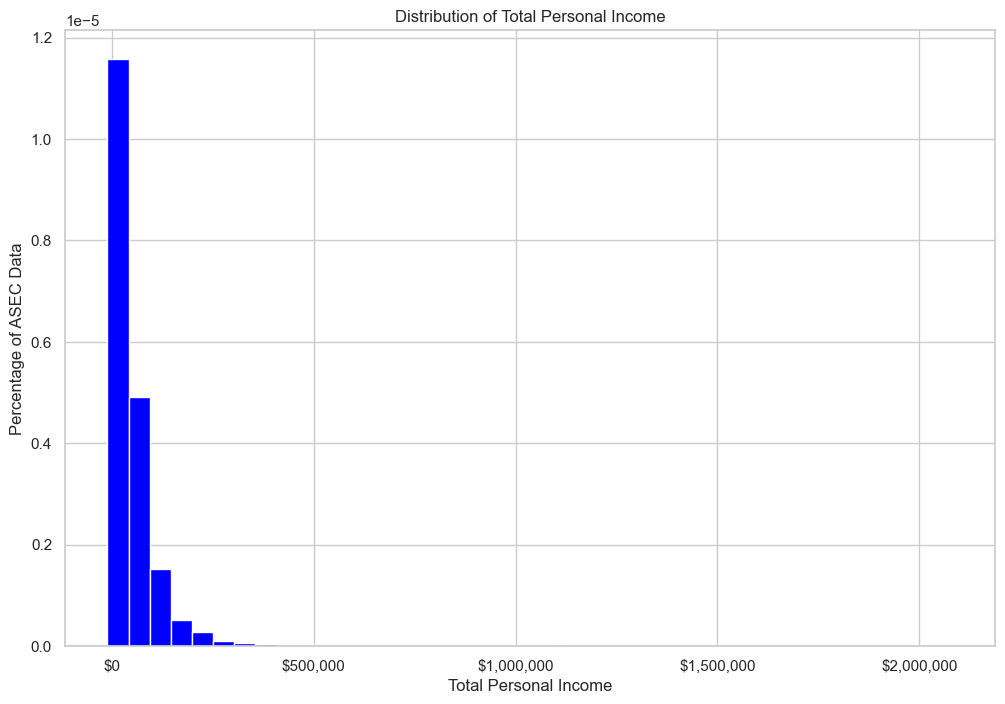

count     121113
unique      3542
top            0
freq       49692
Name: INCWAGE_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


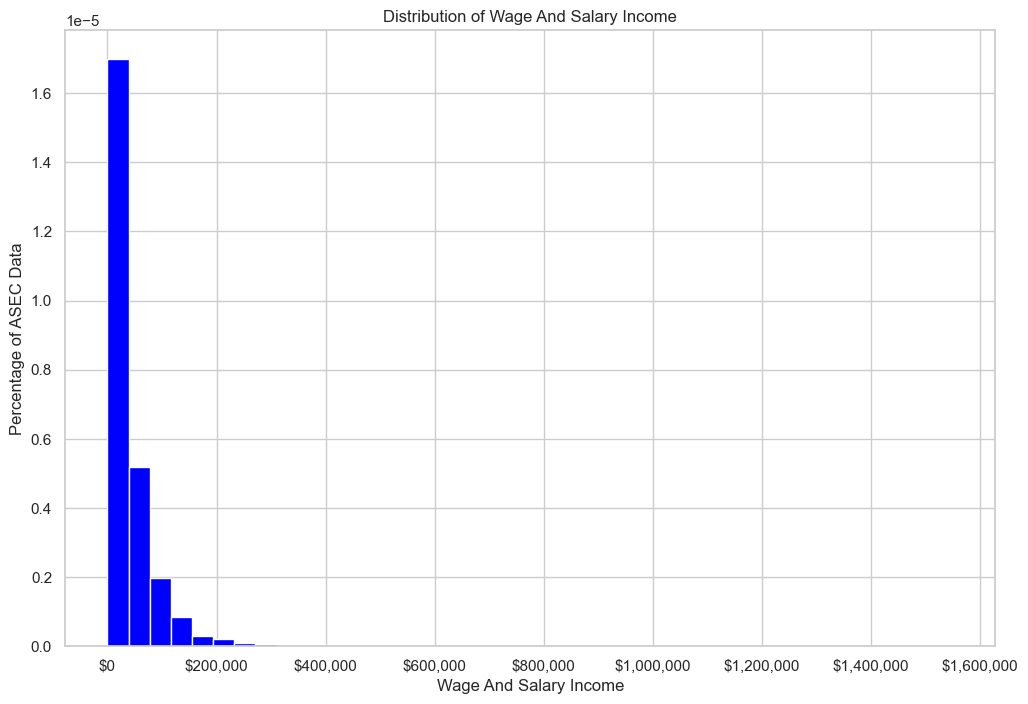

count     121119
unique       403
top            0
freq      115395
Name: INCBUS_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


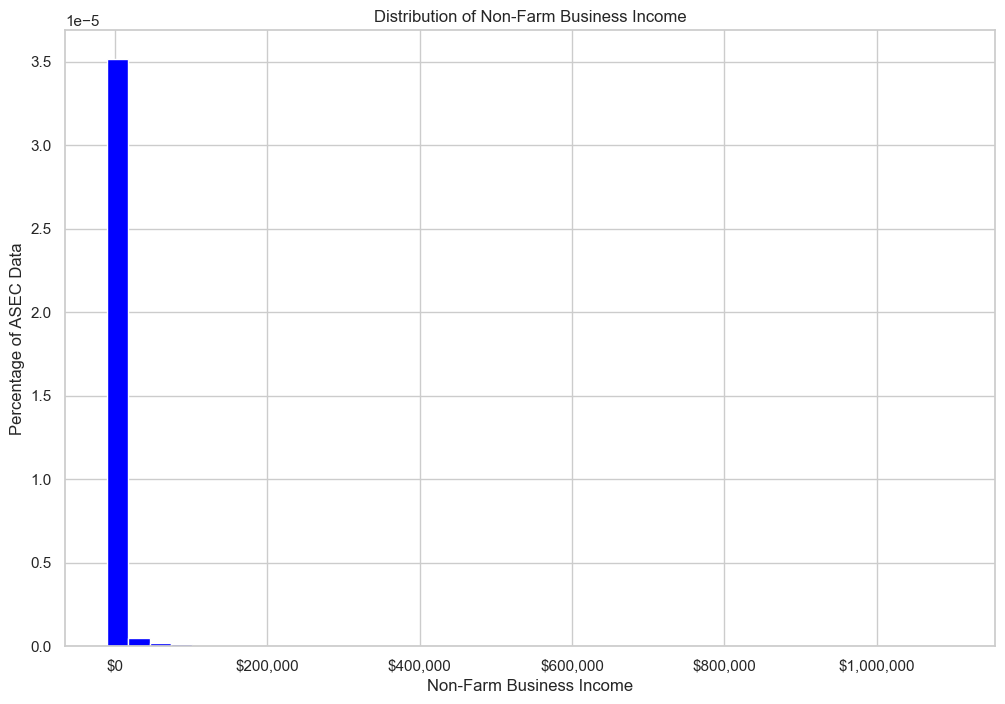

count     121119
unique       111
top            0
freq      120002
Name: INCFARM_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


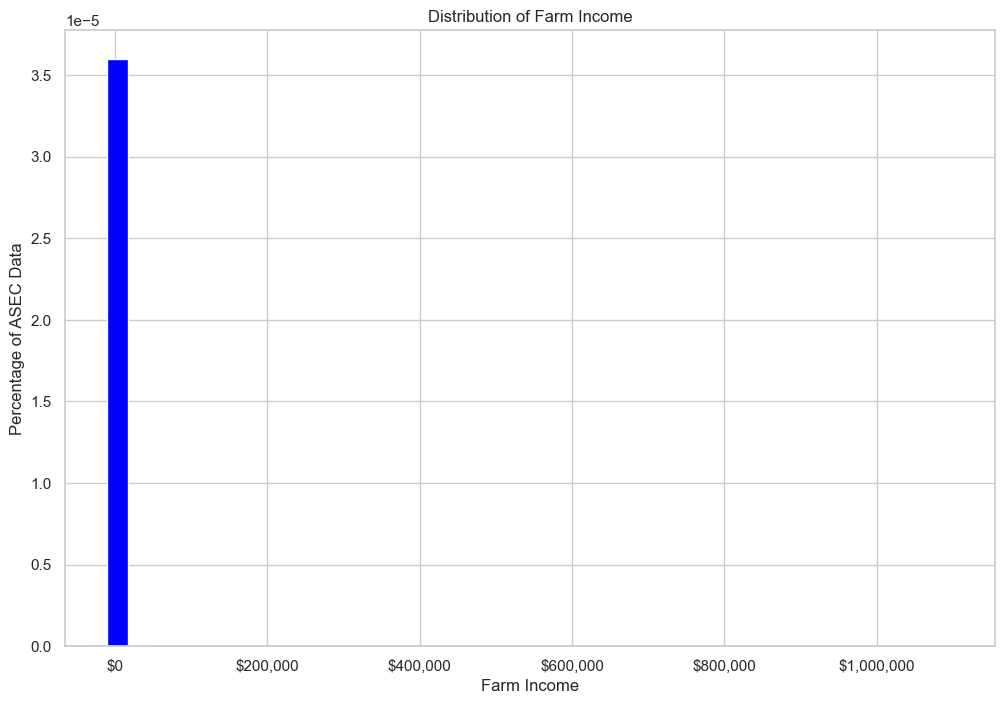

count     121119
unique      4013
top            0
freq       96494
Name: INCSS_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


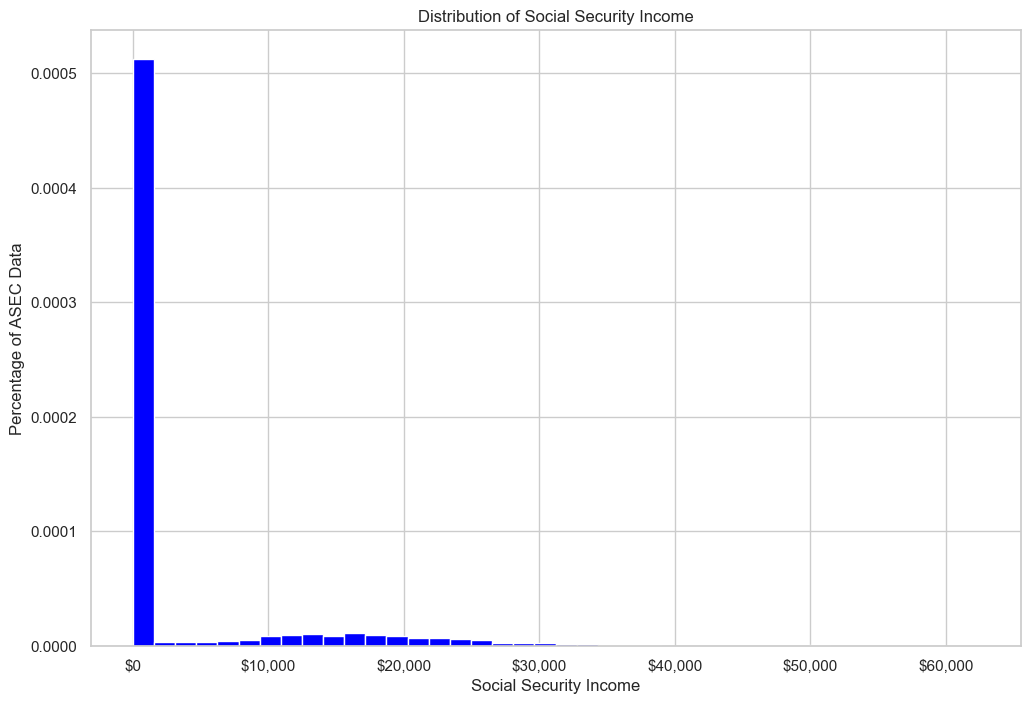

count     121119
unique       224
top            0
freq      120364
Name: INCWELFR_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


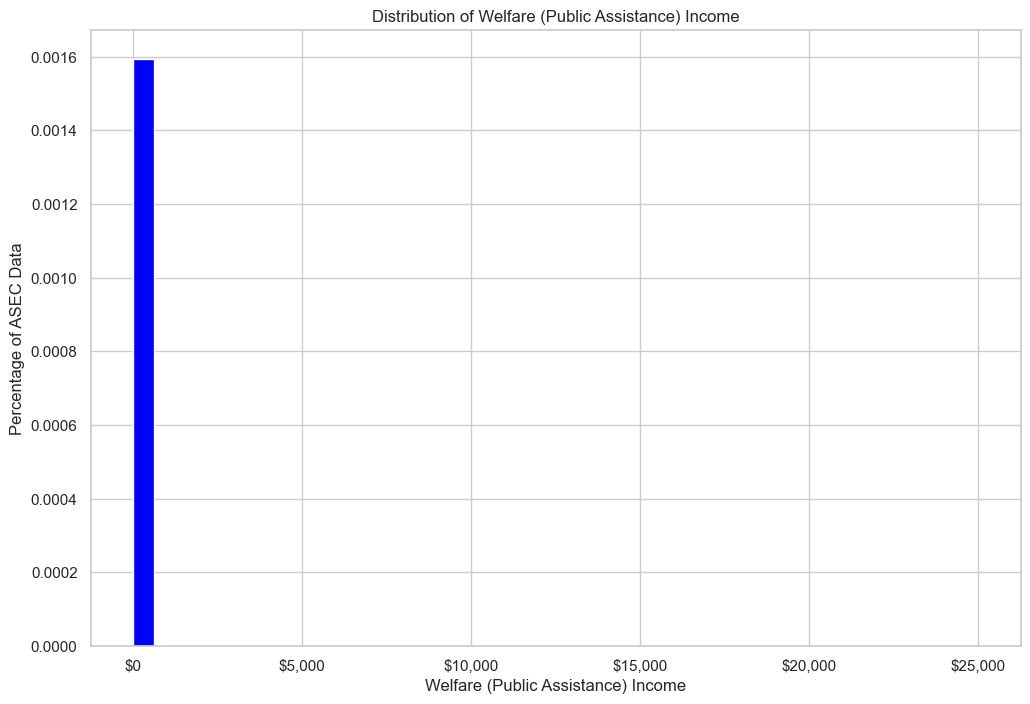

count     152726
unique       694
top            0
freq      148239
Name: INCRETIR_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


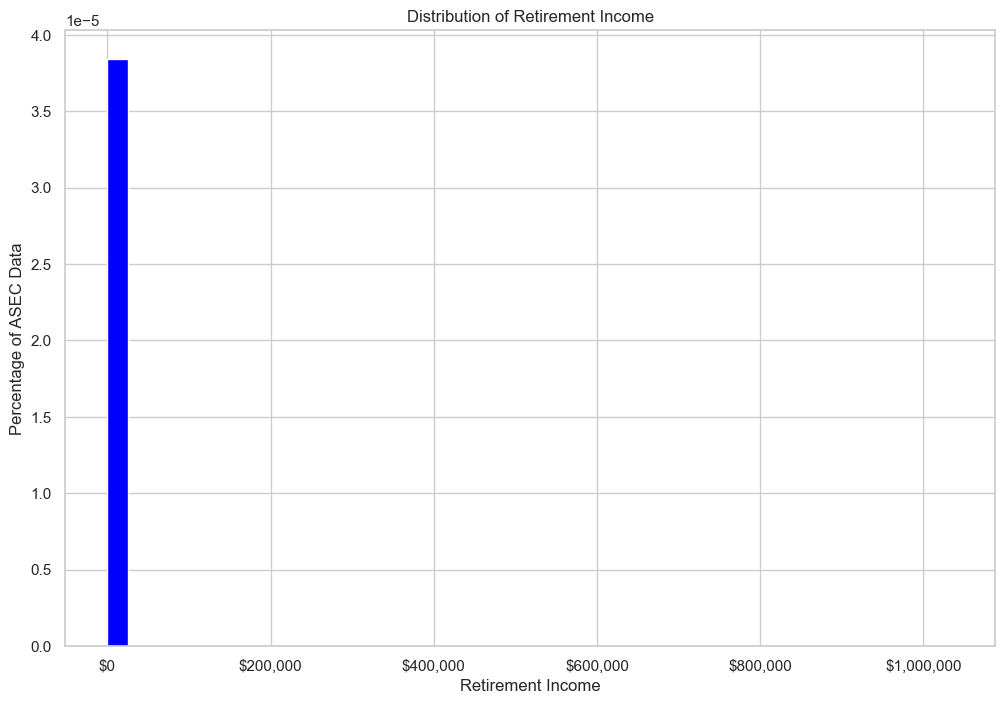

count     121119
unique       583
top            0
freq      118450
Name: INCSSI_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


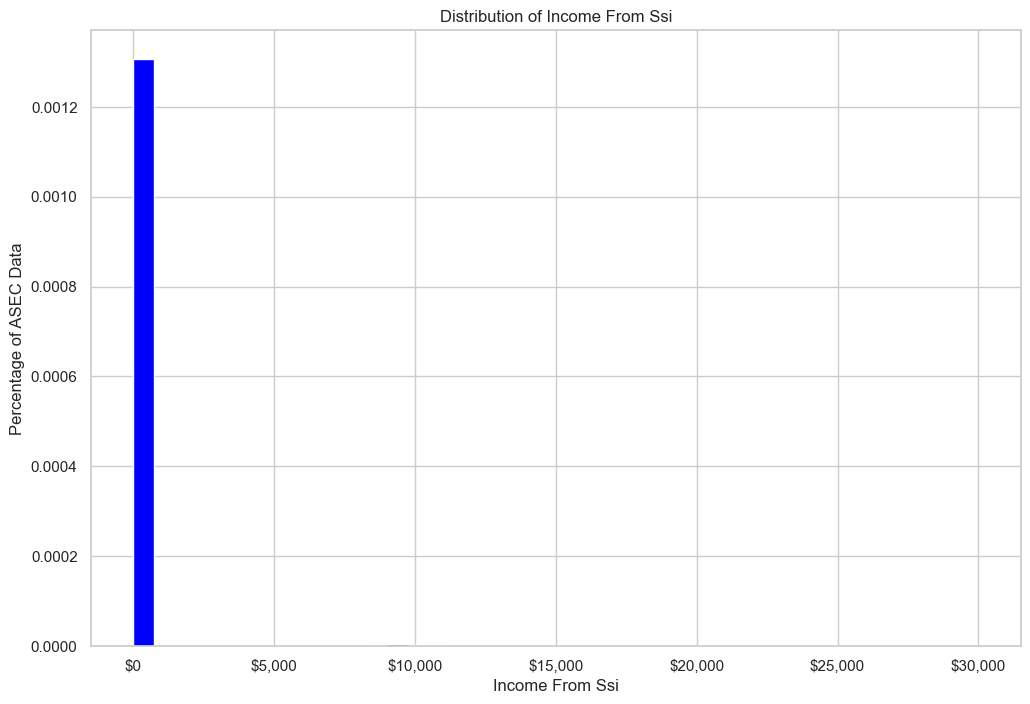

count     121101
unique      6134
top            0
freq       54668
Name: INCINT_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


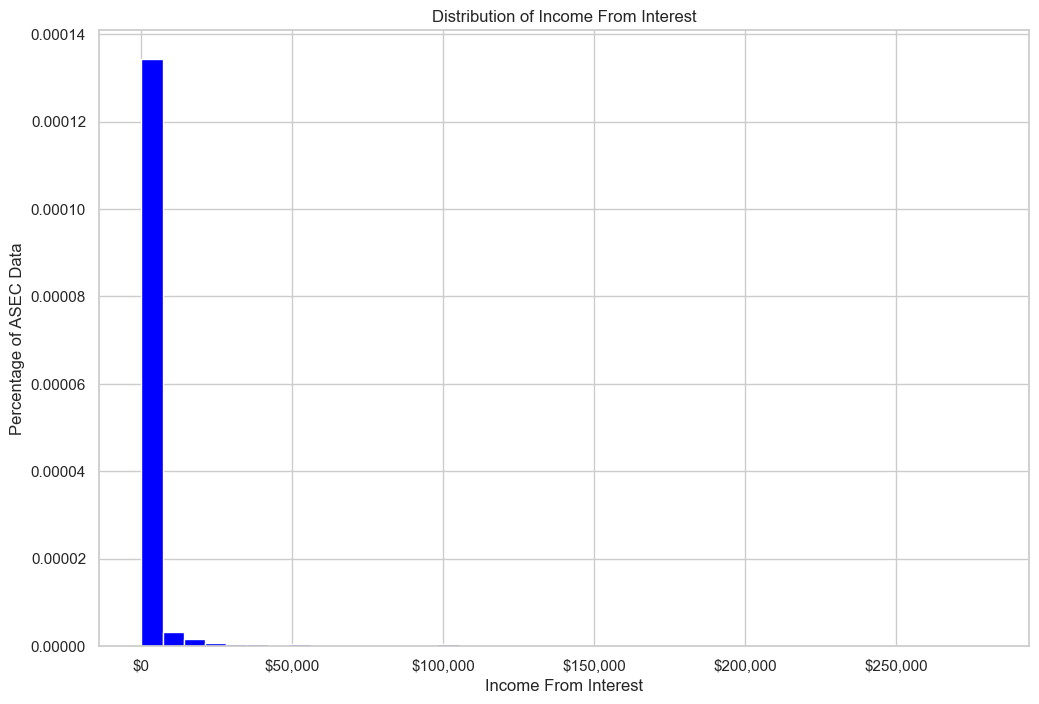

count     121116
unique       940
top            0
freq      117054
Name: INCUNEMP_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


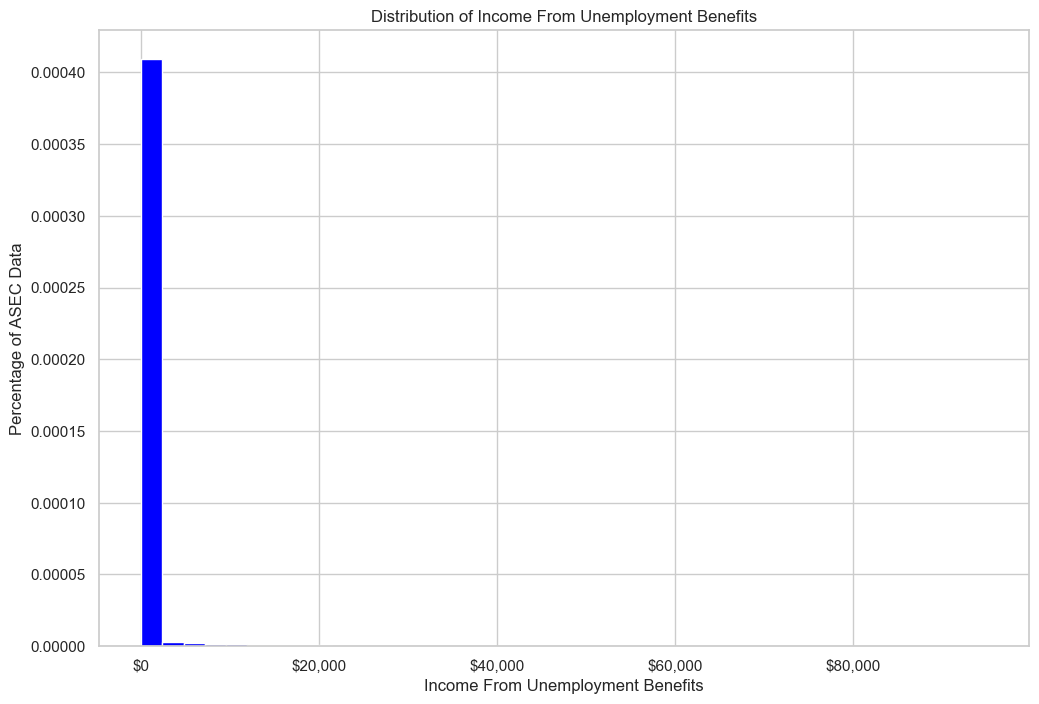

count     121118
unique       151
top            0
freq      120695
Name: INCWKCOM_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


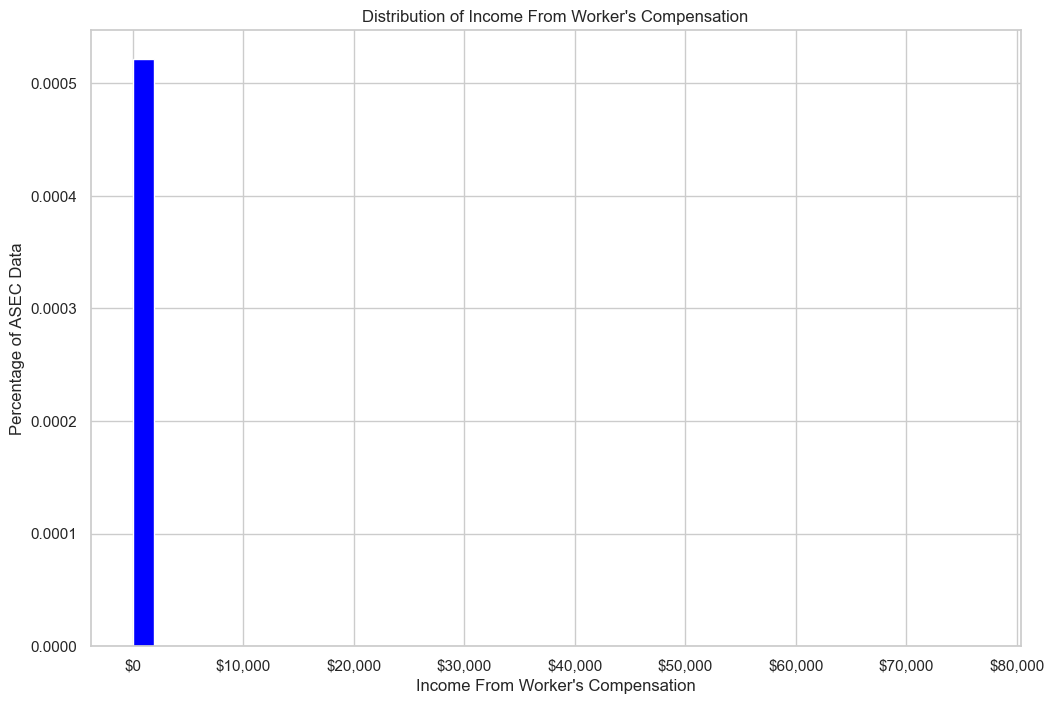

count     121119
unique       482
top            0
freq      118952
Name: INCVET_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


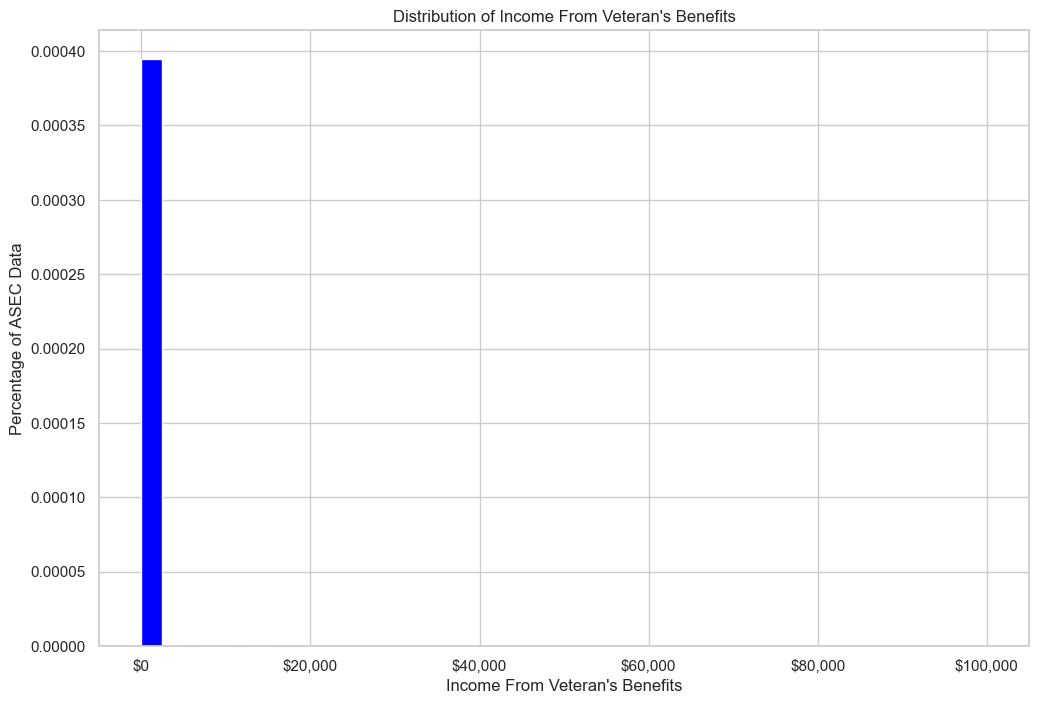

count     121119
unique       391
top            0
freq      119762
Name: INCSURV_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


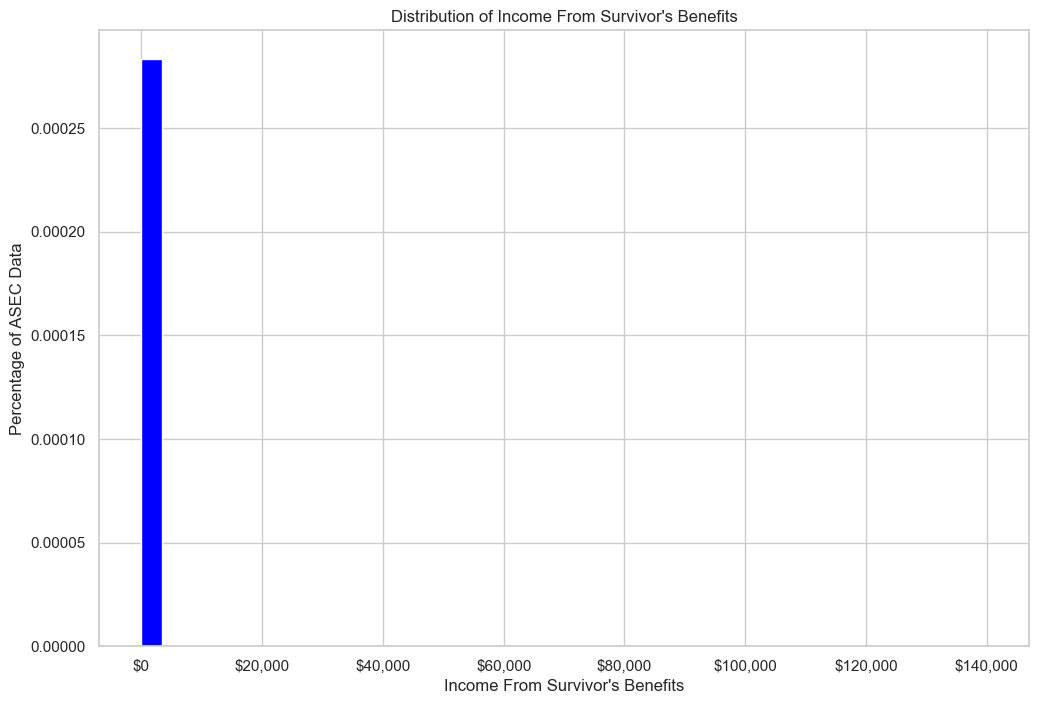

count     121119
unique       315
top            0
freq      119956
Name: INCDISAB_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


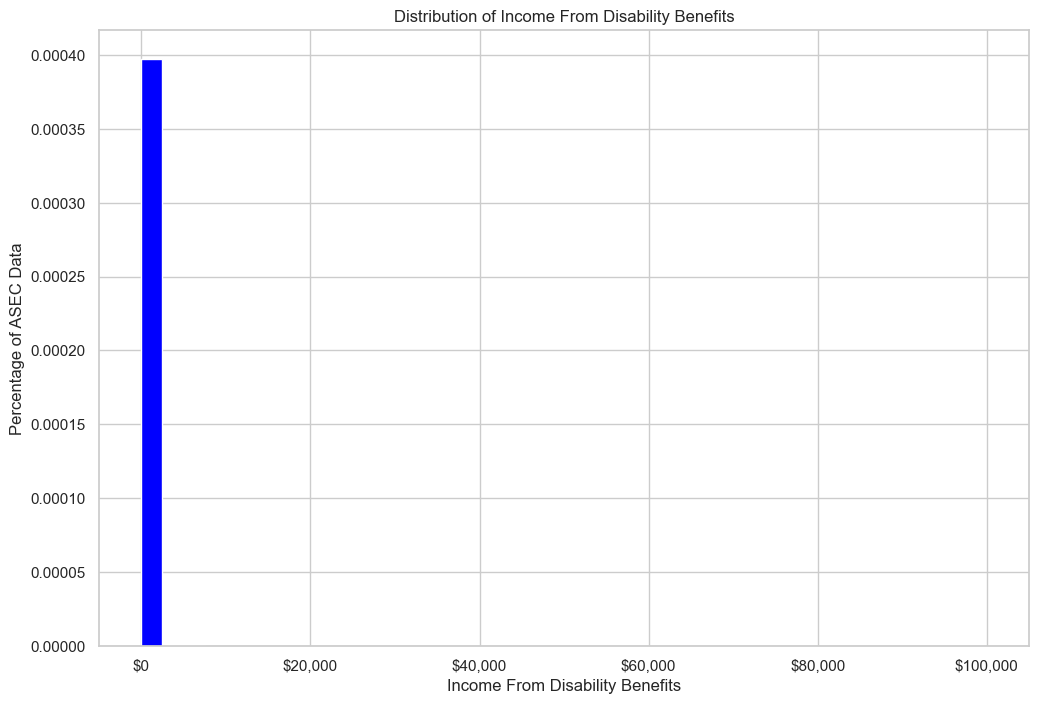

count     121115
unique       479
top            0
freq      104418
Name: INCDIVID_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


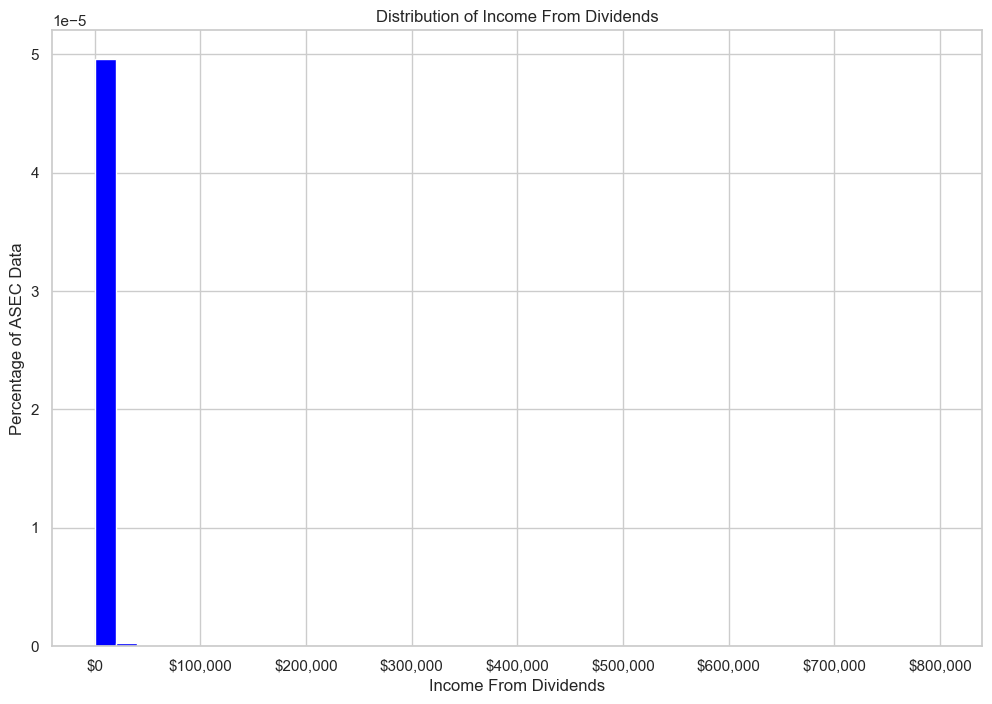

count     121115
unique       376
top            0
freq      115548
Name: INCRENT_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


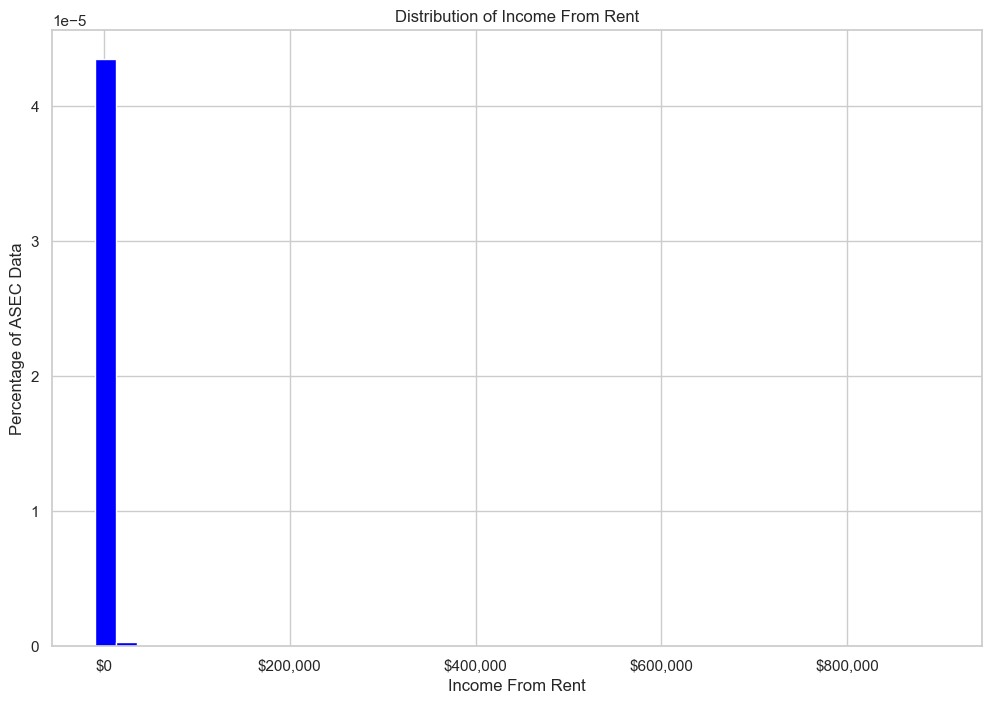

count     121119
unique       278
top            0
freq      118069
Name: INCEDUC_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


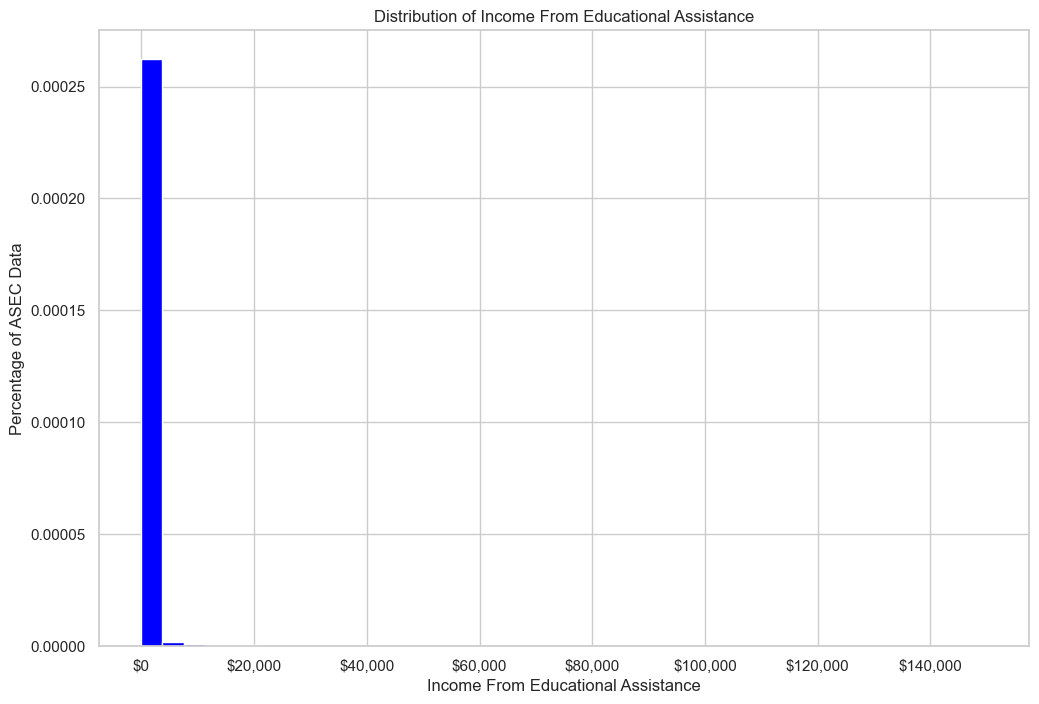

count     121115
unique       446
top            0
freq      119308
Name: INCCHILD_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


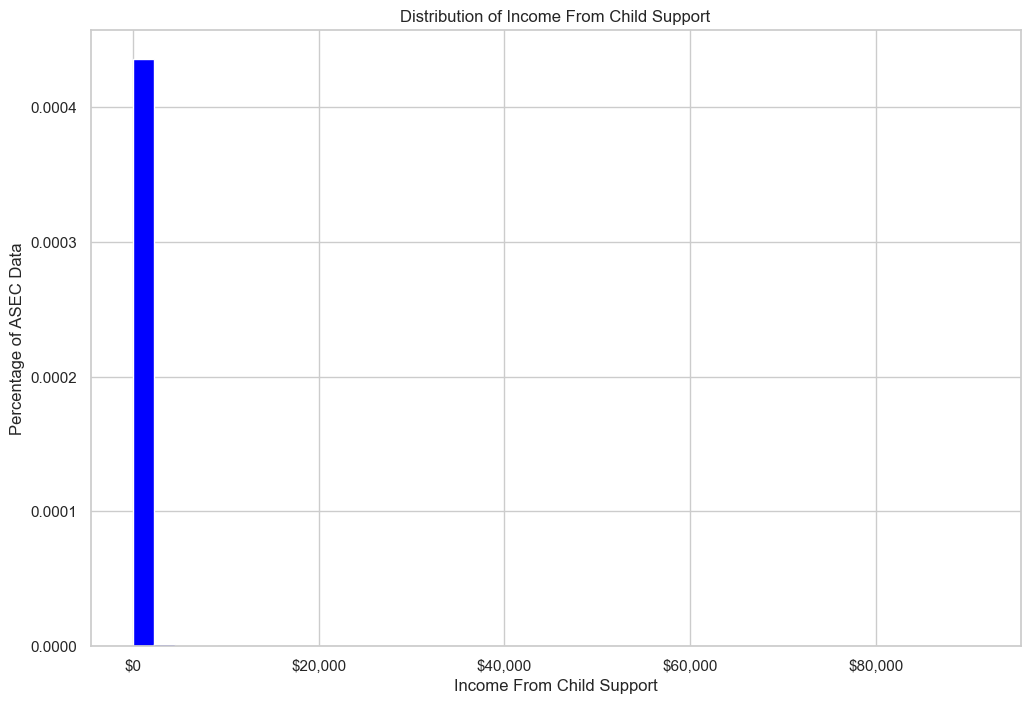

count     121119
unique       133
top            0
freq      120073
Name: INCASIST_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


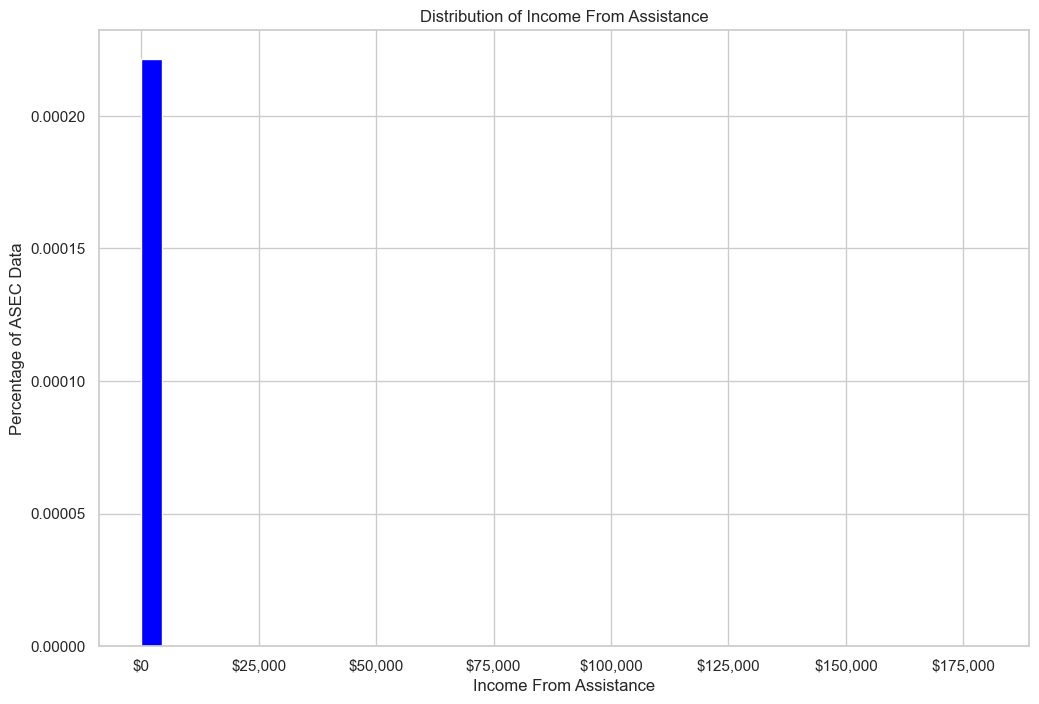

count     152732
unique       212
top            0
freq      151486
Name: INCOTHER_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


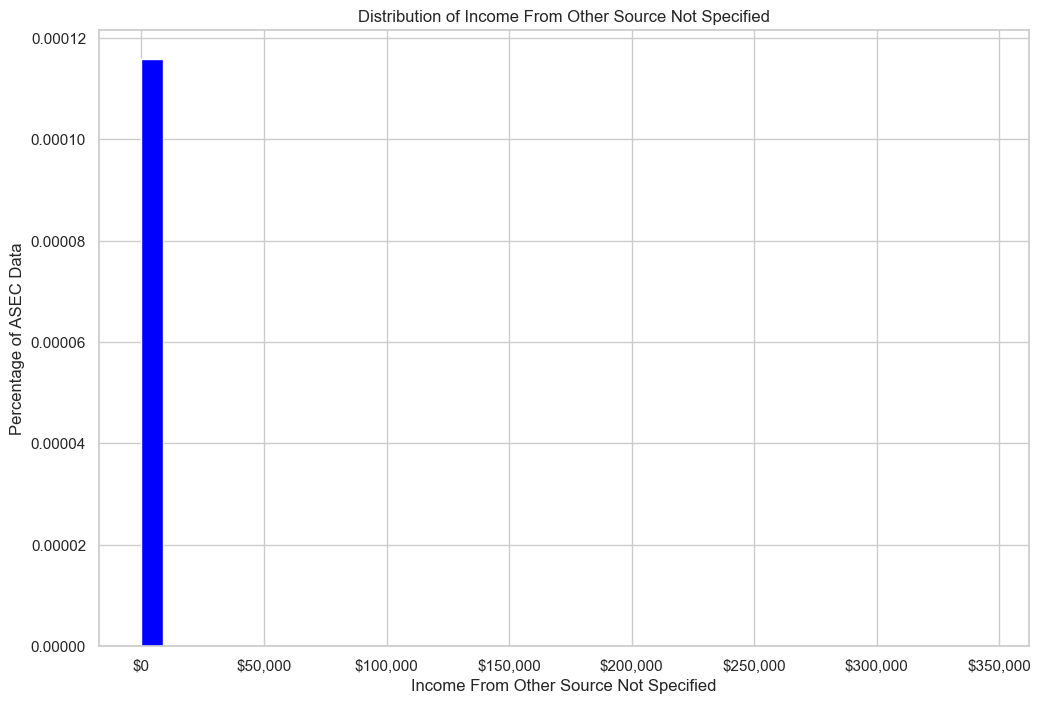

count     152730
unique       349
top            0
freq      150982
Name: INCRANN_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


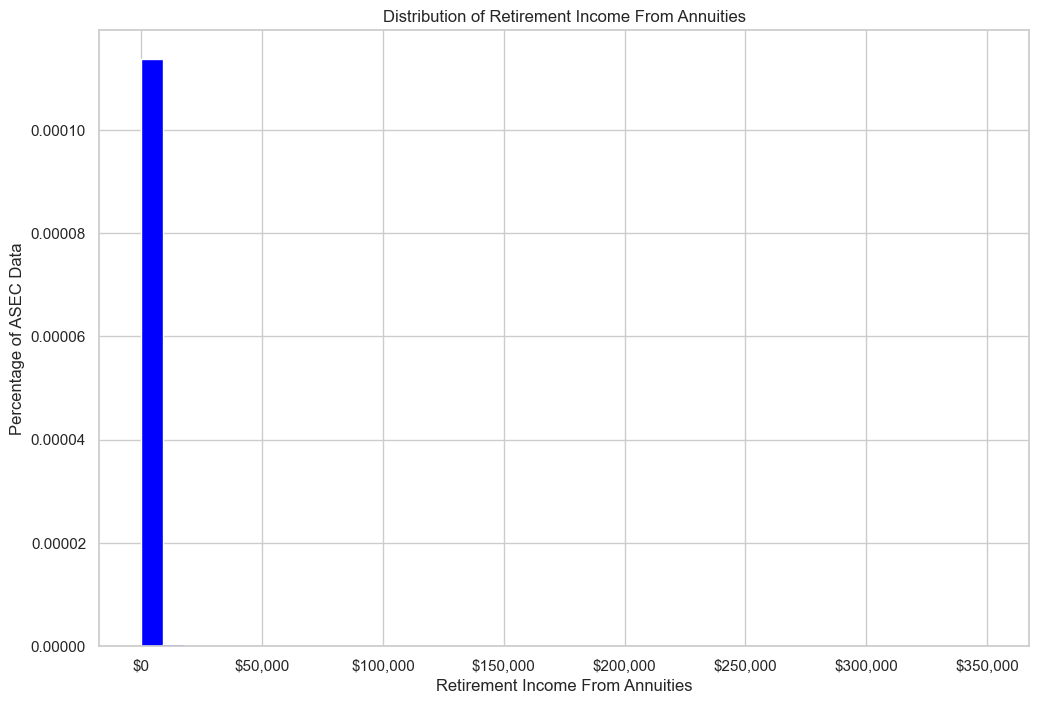

count     152727
unique      1508
top            0
freq      145149
Name: INCPENS_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


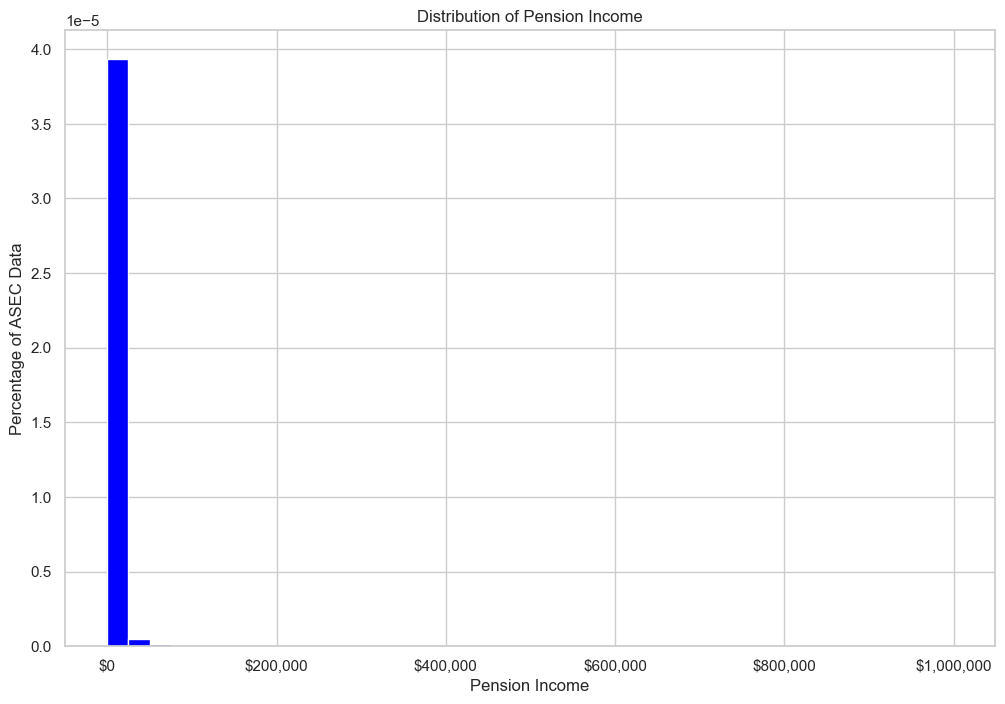

count     121117
unique     33020
top            0
freq       50201
Name: ADJGINC_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


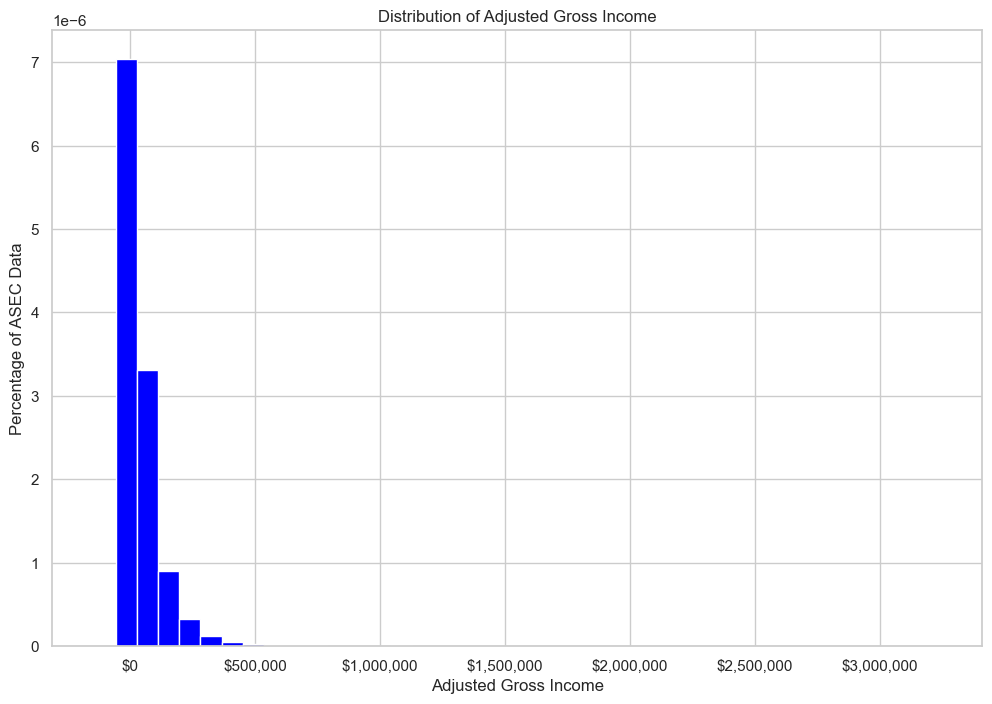

count     121119
unique     31994
top            0
freq       65094
Name: TAXINC_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


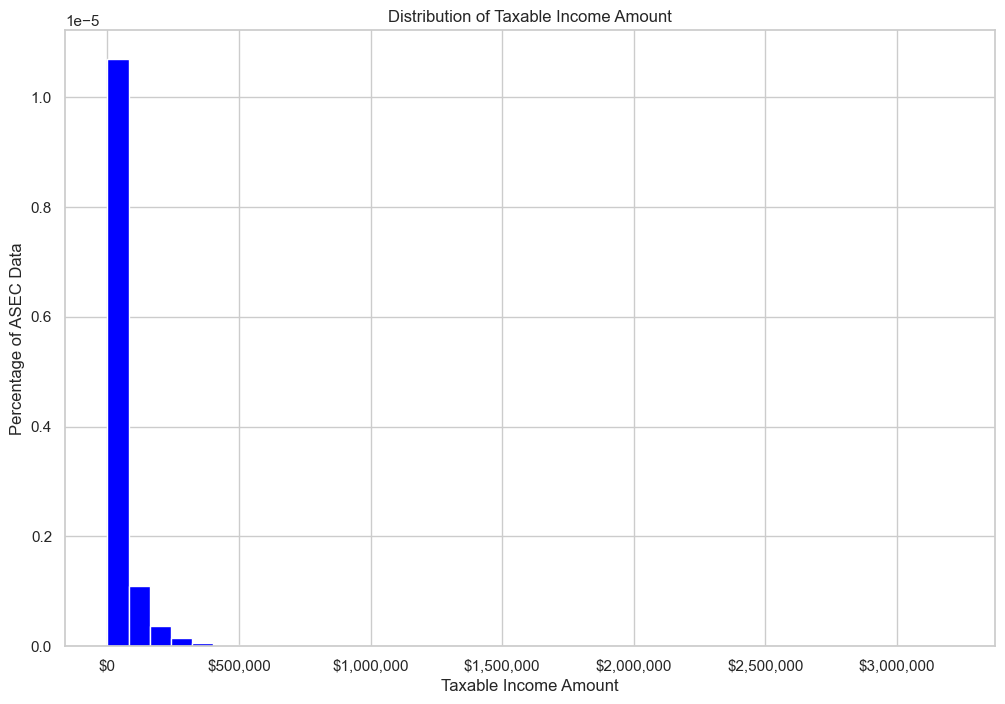

KeyError: 'INCTOT_3_2'

In [386]:
for col in df.columns:
    if 'INC' in col and '2' not in col:
        colname = f"{col}_2"
        f = df[colname].isnull()==False
        print(df.loc[f, colname].describe().round(0))
        ax = df.loc[f, colname].hist(weights=df.loc[f, 'ASECWT'], figsize=(12, 8), color='blue', bins=40, density=True)
        label = ddi_codebook.get_variable_info(col).label.title().replace("'S", "'s")
        ax.set_title(f"Distribution of {label}")
        ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])
        ax.set_xlabel(f"{label}")
        ax.set_ylabel(f"Percentage of ASEC Data")
        plt.show()

In [387]:
pt(ddi_codebook, df, 'OCC', 'ASECWT')

OCC  code         count  raw_count  raw_percent   Percent
0    NaN     0  1.629153e+08      78249     0.512329  0.495602
1    NaN   440  5.629201e+06       2569     0.016820  0.017125
2    NaN  9130  3.750610e+06       1661     0.010875  0.011410
3    NaN  2310  3.638916e+06       1698     0.011118  0.011070
4    NaN  3255  3.536647e+06       1556     0.010188  0.010759
..   ...   ...           ...        ...          ...       ...
521  NaN  7030  4.519830e+03          1     0.000007  0.000014
522  NaN  4160  4.187920e+03          3     0.000020  0.000013
523  NaN  8910  3.506720e+03          2     0.000013  0.000011
524  NaN  8850  3.339530e+03          1     0.000007  0.000010
525  NaN  5040  3.037970e+03          2     0.000013  0.000009

[526 rows x 6 columns]

In [388]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set figure size for the notebook
plt.rcParams["figure.figsize"]=12,8
# set seaborn whitegrid theme
sns.set(style="whitegrid")

In [389]:
from IPython.core.display import display

/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/1726750586.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


In [390]:
import seaborn as sns
def cdf_plot_by_x(
    xdf,
    groupbyvar,
    xvar,
    wvar,
    k=None,
    bbox=(0.5, -0.1),
    legend_ncol=3,
    max_percentile=1.,
):
    fig, ax = plt.subplots(1, 1, figsize=(16, 8))
    if k is not None:
        sdf = xdf[groupbyvar].value_counts()
        top_k = sdf[0:(k-1)].index.tolist()
        xdfss = xdf[xdf.eval(f'{groupbyvar} == "' + f'" | {groupbyvar} == "'.join(top_k) + '"')].reset_index(drop=True)
        print(f'reducing records from {xdf.shape[0]} to {xdfss.shape[0]}')
        print(f"reducing groups from {xdf[groupbyvar].nunique()} to {k}")
    else:
        xdfss = xdf
    
    max_percentile_value = xdfss[xvar].quantile(max_percentile)
    xdfss = xdfss[xdfss[xvar] < max_percentile_value]
    groups = xdfss[groupbyvar].unique()
    pal = sns.color_palette("bright", len(groups))
    sns.ecdfplot(
        data=xdfss,
        weights=wvar, 
        x=xvar, 
        hue=groupbyvar, 
        alpha=0.8, 
        ax=ax,
        palette=pal,
    ).set(title=f'Cumulative Distribution of Total Income by {groupbyvar}')
    label = ddi_codebook.get_variable_info(xvar.replace("_2", "")).label.title().replace("'S", "'s")
    ax.set_xlabel(f"{label}")
    ax.set_ylabel(f"Cumulative Percent of ASEC Data")
    ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.2f}'))
    ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
    ax.get_legend().set_visible(False)
    fig.legend(labels=groups, loc='lower center', bbox_to_anchor=bbox, ncol=legend_ncol)
    fig.show()
    
def den_cdf_plot_by_x(
    xdf,
    groupbyvar,
    xvar,
    wvar,
    k=None,
    bbox=(0.5, -0.1),
    legend_ncol=3,
    max_percentile=1.,
    den_title=None,
):
    fig, (ax1, ax) = plt.subplots(1, 2, figsize=(16, 8))
    if k is not None:
        sdf = xdf[groupbyvar].value_counts()
        top_k = sdf[0:(k-1)].index.tolist()
        xdfss = xdf[xdf.eval(f'{groupbyvar} == "' + f'" | {groupbyvar} == "'.join(top_k) + '"')].reset_index(drop=True)
        print(f'reducing records from {xdf.shape[0]} to {xdfss.shape[0]}')
        print(f"reducing groups from {xdf[groupbyvar].nunique()} to {k}")
    else:
        xdfss = xdf
    
    if den_title is None:
        den_title = f'Estimated Density Function of Total Income by {groupbyvar}'
    max_percentile_value = xdfss[xvar].quantile(max_percentile)
    xdfss = xdfss[xdfss[xvar] < max_percentile_value]
    groups = xdfss[groupbyvar].unique()
    pal = sns.color_palette("bright", len(groups))

    sns.kdeplot(
        data=xdfss,
        weights=wvar, 
        x=xvar, 
        hue=groupbyvar, 
        cut=0, fill=True, 
        common_norm=False, 
        alpha=0.2, 
        ax=ax1,
        palette=pal,
    ).set(title=den_title)
    try:
        label = ddi_codebook.get_variable_info(xvar.replace("_2", "")).label.title().replace("'S", "'s")
    except:
        label = xvar
    ax1.set_xlabel(f"{label}")
    ax1.set_ylabel(f"Percent of ASEC Data")
    ax1.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.2f}'))
    ax1.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
    ax1.get_legend().set_visible(False)

    sns.ecdfplot(
        data=xdfss,
        weights=wvar, 
        x=xvar, 
        hue=groupbyvar, 
        alpha=0.8, 
        ax=ax,
        palette=pal,
    ).set(title=f'Cumulative Distribution of Total Income by {groupbyvar}')
    label = ddi_codebook.get_variable_info(xvar.replace("_2", "")).label.title().replace("'S", "'s")
    ax.set_xlabel(f"{label}")
    ax.set_ylabel(f"Cumulative Percent of ASEC Data")
    ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.3f}'))
    ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
    ax.get_legend().set_visible(False)
    fig.legend(labels=groups, loc='lower center', bbox_to_anchor=bbox, ncol=legend_ncol)
    fig.show()
    
def denbyplot(df, colname, byvar, weightvar):
    f, ax = plt.subplots(1, figsize=(12, 8))
    groups = df[byvar].unique()
    labels = []
    for i, g in enumerate(groups):
        f = (df[colname].isnull()==False) & (df[byvar]==g)    
        ax = df[f][f"{colname}_2"].plot(weight=df[f][weightvar], kind='density', grid=True)
        ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])
    #     ax.set_xlim([0, 1e6])
        label = ddi_codebook.get_variable_info(colname.replace("_2", "")).label.title().replace("'S", "'s")
        labels.append(label)
        ax.set_xlabel(f"{label}")

    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])

    # Put a legend below current axis
    ax.set_ylabel(f"Percentage of ASEC Data")
    ax.legend(labels, 
              loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=2)
    plt.show()
    
def den_plot_by_x(
    xdf,
    groupbyvar,
    xvar,
    wvar,
    k=None,
    bbox=(0.5, -0.1),
    legend_ncol=3,
    max_percentile=1.,
    addvline=False,
    den_title=None,
):
    fig, ax1 = plt.subplots(1, 1, figsize=(16, 8))
    if k is not None:
        sdf = xdf[groupbyvar].value_counts()
        top_k = sdf[0:(k-1)].index.tolist()
        xdfss = xdf[xdf.eval(f'{groupbyvar} == "' + f'" | {groupbyvar} == "'.join(top_k) + '"')].reset_index(drop=True)
        print(f'reducing records from {xdf.shape[0]} to {xdfss.shape[0]}')
        print(f"reducing groups from {xdf[groupbyvar].nunique()} to {k}")
    else:
        xdfss = xdf
    
    if den_title is None:
        den_title = f'Estimated Density Function of Total Income by {groupbyvar}'
    max_percentile_value = xdfss[xvar].quantile(max_percentile)
    xdfss = xdfss[xdfss[xvar] < max_percentile_value]
    groups = xdfss[groupbyvar].unique()
    pal = sns.color_palette("bright", len(groups))

    sns.kdeplot(
        data=xdfss,
        weights=wvar, 
        x=xvar, 
        hue=groupbyvar, 
        cut=0, fill=True, 
        common_norm=False, 
        alpha=0.2, 
        ax=ax1,
        palette=pal,
    ).set(title=den_title)
    try:
        label = ddi_codebook.get_variable_info(xvar.replace("_2", "")).label.title().replace("'S", "'s")
    except:
        label = xvar
    
    ax1.set_xlabel(f"{label}")
    ax1.set_ylabel(f"Percent of ASEC Data")
    ax1.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.2f}'))
    ax1.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
    ax1.get_legend().set_visible(False)
    fig.legend(labels=groups, loc='lower center', bbox_to_anchor=bbox, ncol=legend_ncol)
    if addvline:
        tmp = xdfss[[xvar, groupbyvar, wvar]]
        tmp['XWEIGHT'] = xdfss[xvar] * xdfss[wvar]
        x = tmp[
            [groupbyvar, 'XWEIGHT', wvar]
        ].groupby(by=groupbyvar).agg({
            'XWEIGHT': [len, np.sum, np.mean], 
            wvar: [np.sum]
        }, as_index=False)

        x.columns = ['_'.join([y for y in j if y != '']) for j in x.columns]
        x['final'] = x['XWEIGHT_sum'] / x[f'{wvar}_sum']
        display(x[['final']].sort_values(by='final', ascending=False))
        for i, xval in enumerate(x['final']):
            ax1.axvline(x = xval,
               ymin = 0, color=pal[i],
               ymax = 1, linestyle='--')
    
    fig.show()

In [391]:
df['Educational Attainment'] = df['Educational_Attainment']

In [392]:
df['Investment Income as Percent of Total Income'] = np.where(
    df['INCTOT_2'] ==0, 
    0,
    df['Investments Income'].astype(float) / df['INCTOT_2'].astype(float))

df['Government Income as Percent of Total Income'] = np.where(
    df['INCTOT_2'] ==0, 
    0,
    df['Government Income'].astype(float) / df['INCTOT_2'].astype(float))

df['Wage Income as Percent of Total Income'] = np.where(
    df['INCTOT_2'] ==0, 
    0,
    df['Wages Income'].astype(float) / df['INCTOT_2'].astype(float))

df.loc[df['Investment Income as Percent of Total Income'] < 0, 'Investment Income as Percent of Total Income'] = 0.
df.loc[df['Investment Income as Percent of Total Income'] > 1, 'Investment Income as Percent of Total Income'] = 1
df.loc[df['Government Income as Percent of Total Income'] < 0 , 'Government Income as Percent of Total Income'] = 0.
df.loc[df['Government Income as Percent of Total Income'] > 1 , 'Government Income as Percent of Total Income'] = 1
df.loc[df['Wage Income as Percent of Total Income'] < 0, 'Wage Income as Percent of Total Income'] = 0.
df.loc[df['Wage Income as Percent of Total Income'] > 1, 'Wage Income as Percent of Total Income'] = 1

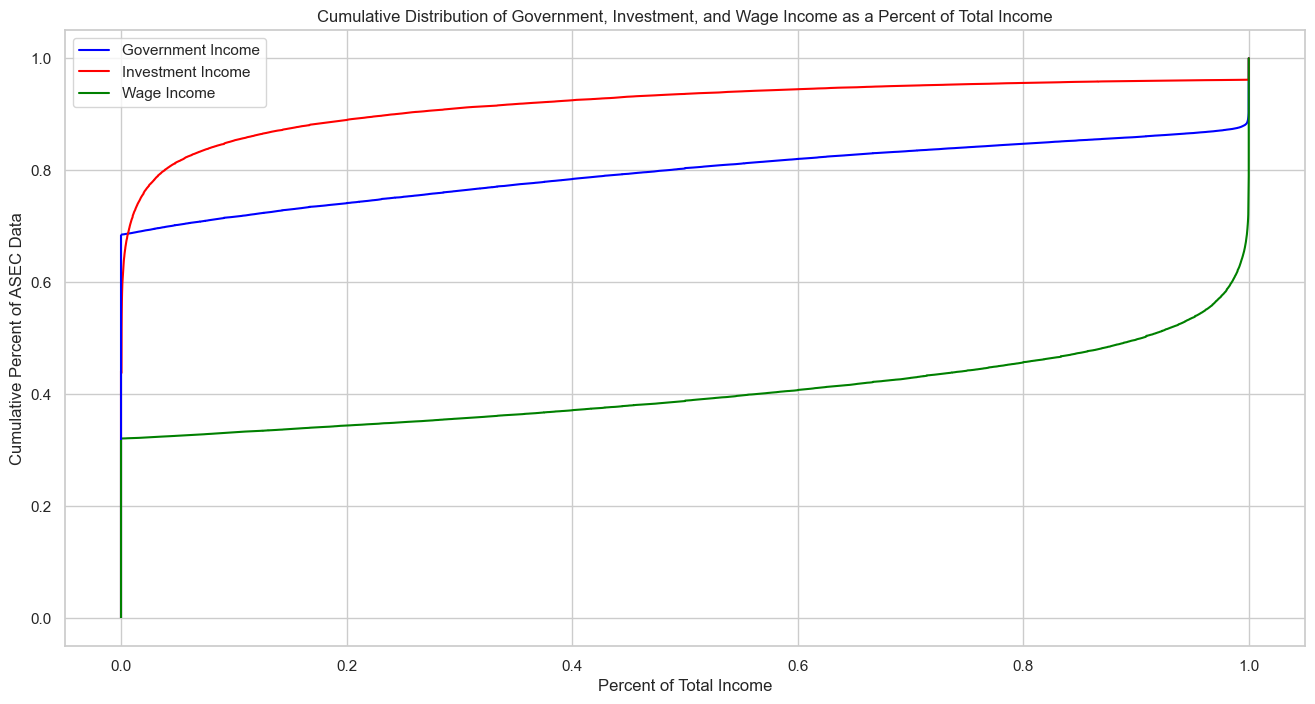

In [427]:
fig, ax1 = plt.subplots(1, 1, figsize=(16, 8))
x = pt(None, df, 'Government Income as Percent of Total Income', 'ASECWT')
x = x.sort_values(by='Government Income as Percent of Total Income')
x['cumulative percent'] = x['Percent'].cumsum()

x2 = pt(None, df, 'Investment Income as Percent of Total Income', 'ASECWT')
x2 = x2.sort_values(by='Investment Income as Percent of Total Income')
x2['cumulative percent'] = x2['Percent'].cumsum()

x3 = pt(None, df, 'Wage Income as Percent of Total Income', 'ASECWT')
x3 = x3.sort_values(by='Wage Income as Percent of Total Income')
x3['cumulative percent'] = x3['Percent'].cumsum()

x.plot(x='Government Income as Percent of Total Income', y='cumulative percent', ax=ax1, label='Government Income', color='blue')
x2.plot(x='Investment Income as Percent of Total Income', y='cumulative percent', ax=ax1, label='Investment Income', color='red',)
x3.plot(x='Wage Income as Percent of Total Income', y='cumulative percent', ax=ax1, label='Wage Income', color='green')
ax1.vlines(x=0, ymin=0, ymax=x2['raw_percent'].values[0], color='red')
ax1.vlines(x=0, ymin=0, ymax=x['raw_percent'].values[0]-0.006, color='blue')
ax1.vlines(x=0, ymin=0, ymax=x3['raw_percent'].values[0]-0.006, color='green')
ax1.set_ylabel('Cumulative Percent of ASEC Data')
ax1.set_xlabel('Percent of Total Income')
ax1.set_title("Cumulative Distribution of Government, Investment, and Wage Income as a Percent of Total Income")
plt.show()

In [454]:
np.average(df['Government Income'] > 0, weights=df['ASECWT'])

0.25758914128852967

In [450]:
np.average(df[df['Government Income'] > 0]['Government Income'], weights=df[df['Government Income'] > 0]['ASECWT'])

16426.156125125846

In [451]:
np.average(
    df[df['Government Income'] > 0]['Government Income as Percent of Total Income'], 
    weights=df[df['Government Income'] > 0]['ASECWT'],
)

0.6494701029752428

In [455]:
df['Has Government Income'] = df['Government Income'] > 0

In [457]:
pt(ddi=None, df=df, xvar='Has Government Income', wvar='ASECWT')

Has Government Income         count  raw_count  raw_percent   Percent
0                  False  2.440467e+08     115192      0.75421  0.742411
1                   True  8.467519e+07      37540      0.24579  0.257589

In [462]:
df['Has Invesment Income'] = df['Investment Income'] > 0 

In [470]:
np.average(df['Investment Income'] > 0, weights=df['ASECWT'])

0.45959411485223955

In [464]:
np.average(df['Investment Income'], weights=df['ASECWT'])

3773.9806655736957

In [460]:
tmp = df[['Has Government Income', 'Educational Attainment', 'ASECWT']]
tmp['XWEIGHT'] = df['Has Government Income'] * df['ASECWT']
x = tmp[
    ['Educational Attainment', 'XWEIGHT', 'ASECWT']
].groupby(by='Educational Attainment').agg({
    'XWEIGHT': [len, np.sum, np.mean], 
    'ASECWT': [np.sum]
}, as_index=False)

x.columns = ['_'.join([y for y in j if y != '']) for j in x.columns]
x['final'] = x['XWEIGHT_sum'] / x['ASECWT_sum']

/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/2159685760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['XWEIGHT'] = df['Has Government Income'] * df['ASECWT']


In [461]:
x

XWEIGHT_len  XWEIGHT_sum  XWEIGHT_mean  \
Educational Attainment                                                      
Bachelor's degree                        24438  14782651.89    604.904325   
Graduate degree                          14545   8875855.86    610.234160   
High school diploma or equivalent        58755  48015125.60    817.209184   
Less than High School Diploma            18478   9413016.69    509.417507   
Missing                                  31613         0.00      0.000000   
Vocational Degree                         4903   3588537.11    731.906406   

                                     ASECWT_sum     final  
Educational Attainment                                     
Bachelor's degree                  5.640483e+07  0.262081  
Graduate degree                    3.250910e+07  0.273027  
High school diploma or equivalent  1.318132e+08  0.364266  
Less than High School Diploma      3.733442e+07  0.252127  
Missing                            5.999851e+07  0.000000  
Vocational Degree                  1.066183e+07  0.336578

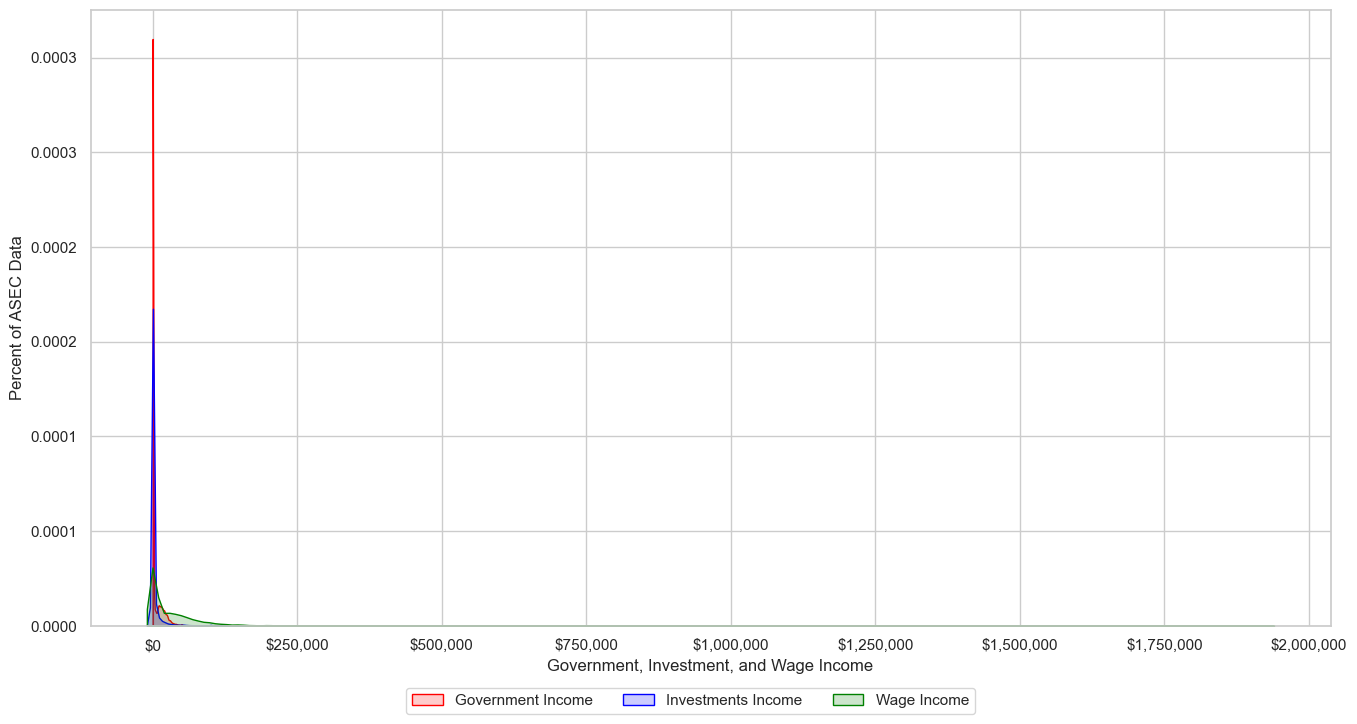

In [395]:
fig, ax1 = plt.subplots(1, 1, figsize=(16, 8))
sns.kdeplot(
    data=df,
    x='Government Income',
    weights='ASECWT',
    color='red',
    ax=ax1,
    cut=0, 
    fill=True, 
    common_norm=False, 
    alpha=0.2, 
    
)
sns.kdeplot(
    data=df,
    x='Investment Income',
    weights='ASECWT',
    color='blue',
    ax=ax1,
    cut=0, 
    fill=True, 
    common_norm=False, 
    alpha=0.2, 
)
sns.kdeplot(
    data=df,
    x='Wage Income',
    weights='ASECWT',
    color='green',
    ax=ax1,
    cut=0, 
    fill=True, 
    common_norm=False, 
    alpha=0.2, 
)
ax1.set_xlabel(f"Government, Investment, and Wage Income")
ax1.set_ylabel(f"Percent of ASEC Data")
ax1.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.4f}'))
ax1.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
fig.legend(labels=['Government Income', 'Investments Income', 'Wage Income'], loc='lower center', bbox_to_anchor=(0.5, -0.01), ncol=3)

In [396]:
df['Educational Attainment'].value_counts(False)

High school diploma or equivalent    58755
Missing                              31613
Bachelor's degree                    24438
Less than High School Diploma        18478
Graduate degree                      14545
Vocational Degree                     4903
Name: Educational Attainment, dtype: int64

In [436]:
def den_plot_by_x(
    xdf,
    groupbyvar,
    xvar,
    wvar,
    k=None,
    bbox=(0.5, -0.1),
    legend_ncol=3,
    max_percentile=1.,
    addvline=False,
    den_title=None,
):
    fig, ax1 = plt.subplots(1, 1, figsize=(14, 8))
    if k is not None:
        sdf = xdf[groupbyvar].value_counts()
        top_k = sdf[0:(k-1)].index.tolist()
        xdfss = xdf[xdf.eval(f'{groupbyvar} == "' + f'" | {groupbyvar} == "'.join(top_k) + '"')].reset_index(drop=True)
        print(f'reducing records from {xdf.shape[0]} to {xdfss.shape[0]}')
        print(f"reducing groups from {xdf[groupbyvar].nunique()} to {k}")
    else:
        xdfss = xdf
    
    if den_title is None:
        den_title = f'Estimated Density Function of Total Income by {groupbyvar}'
    max_percentile_value = xdfss[xvar].quantile(max_percentile)
    xdfss = xdfss[xdfss[xvar] < max_percentile_value]
    groups = xdfss[groupbyvar].unique().tolist()
    pal = sns.color_palette("bright", len(groups))
    
    if addvline:    
        tmp = xdfss[[xvar, groupbyvar, wvar]]
        tmp['XWEIGHT'] = xdfss[xvar] * xdfss[wvar]
        x = tmp[
            [groupbyvar, 'XWEIGHT', wvar]
        ].groupby(by=groupbyvar).agg({
            'XWEIGHT': [len, np.sum, np.mean], 
            wvar: [np.sum]
        }, as_index=False)
        x.columns = ['_'.join([y for y in j if y != '']) for j in x.columns]
        x['final'] = x['XWEIGHT_sum'] / x[f'{wvar}_sum']

    test = sns.kdeplot(
        data=xdfss,
        weights=wvar, 
        x=xvar, 
        hue=groupbyvar, 
        hue_order=x.index.tolist(),
        cut=0, fill=True, 
        common_norm=False, 
        alpha=0.2, 
        # ax=ax1,
        palette=pal,
    ).set(title=den_title)

    try:
        label = ddi_codebook.get_variable_info(xvar.replace("_2", "")).label.title().replace("'S", "'s")
    except:
        label = xvar
    
    ax1.set_xlabel(f"{label}")
    ax1.set_ylabel(f"Percent of ASEC Data")
    ax1.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.5f}'))
    ax1.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
    if addvline:
        display(x[['final']].rename({"final": xvar}, axis=1))
        for i, xval in enumerate(x['final']):
            ax1.axvline(x = xval,
               ymin = 0, color=pal[i],
               ymax = 1, linestyle='--')
    fig.show()

/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/2986280503.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['XWEIGHT'] = xdfss[xvar] * xdfss[wvar]


Government Income
Educational Attainment                              
Bachelor's degree                        4067.271643
Graduate degree                          4718.920043
High school diploma or equivalent        5082.108363
Less than High School Diploma            3073.145057
Vocational Degree                        4868.886096

/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/2986280503.py:70: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


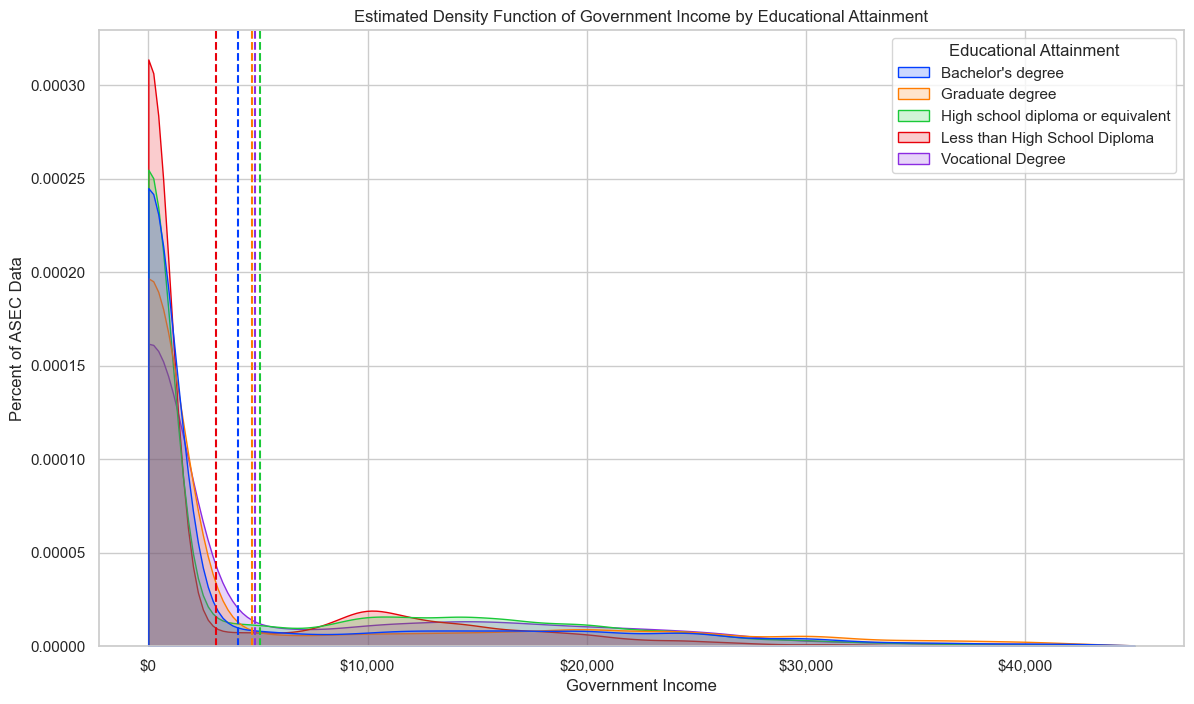

In [437]:
den_plot_by_x(
    df[df['Educational Attainment']!='Missing'], 
    'Educational Attainment',
    'Government Income', 
    'ASECWT', 
    k=None, bbox=(0.5, -0.01), 
    legend_ncol=10,
    max_percentile=.99, 
    addvline=True, 
    den_title='Estimated Density Function of Government Income by Educational Attainment',
)

/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/2986280503.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['XWEIGHT'] = xdfss[xvar] * xdfss[wvar]


Investment Income
Educational Attainment                              
Bachelor's degree                        5068.713647
Graduate degree                          7208.416992
High school diploma or equivalent        1822.441562
Less than High School Diploma             325.605317
Vocational Degree                        2496.040235

/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/2986280503.py:70: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


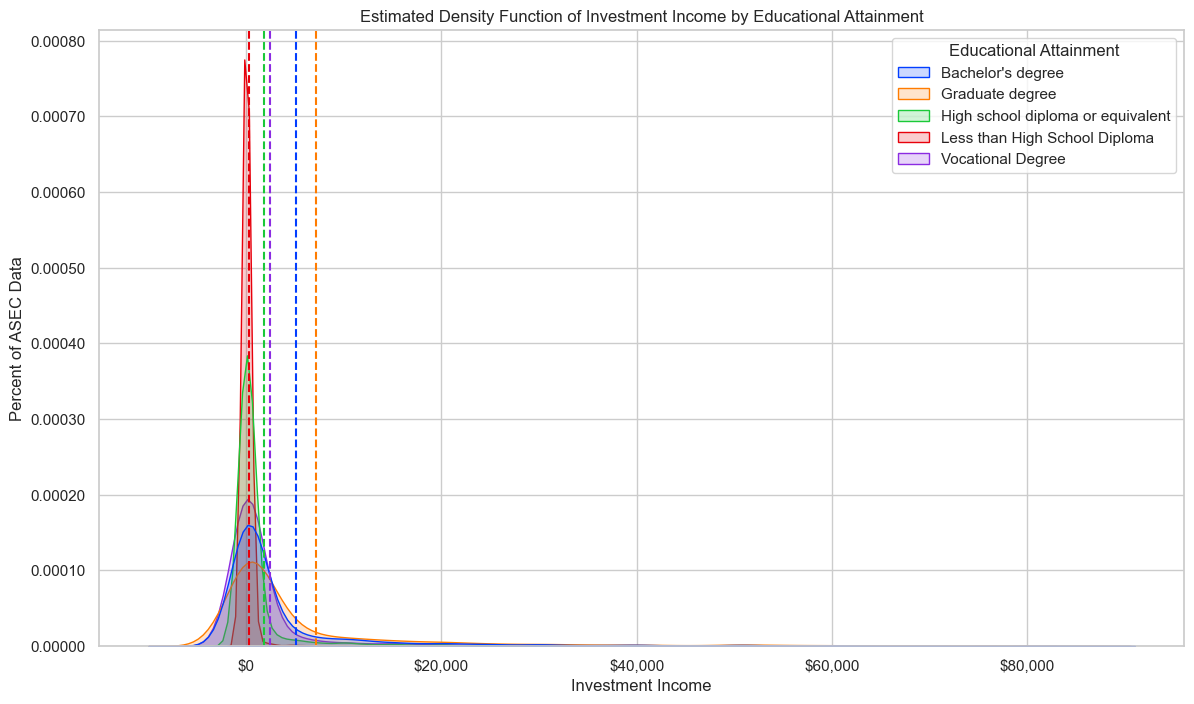

In [438]:
den_plot_by_x(
    df[df['Educational Attainment']!='Missing'], 
    'Educational Attainment',
    'Investment Income', 
    'ASECWT', 
    k=None, bbox=(0.5, -0.01), 
    legend_ncol=10,
    max_percentile=.99, 
    addvline=True, 
    den_title='Estimated Density Function of Investment Income by Educational Attainment',
)

/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/2986280503.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['XWEIGHT'] = xdfss[xvar] * xdfss[wvar]


Wage Income
Educational Attainment                         
Bachelor's degree                  61701.764524
Graduate degree                    87391.230927
High school diploma or equivalent  28621.366331
Less than High School Diploma       9885.772267
Vocational Degree                  38084.893385

/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/2986280503.py:70: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


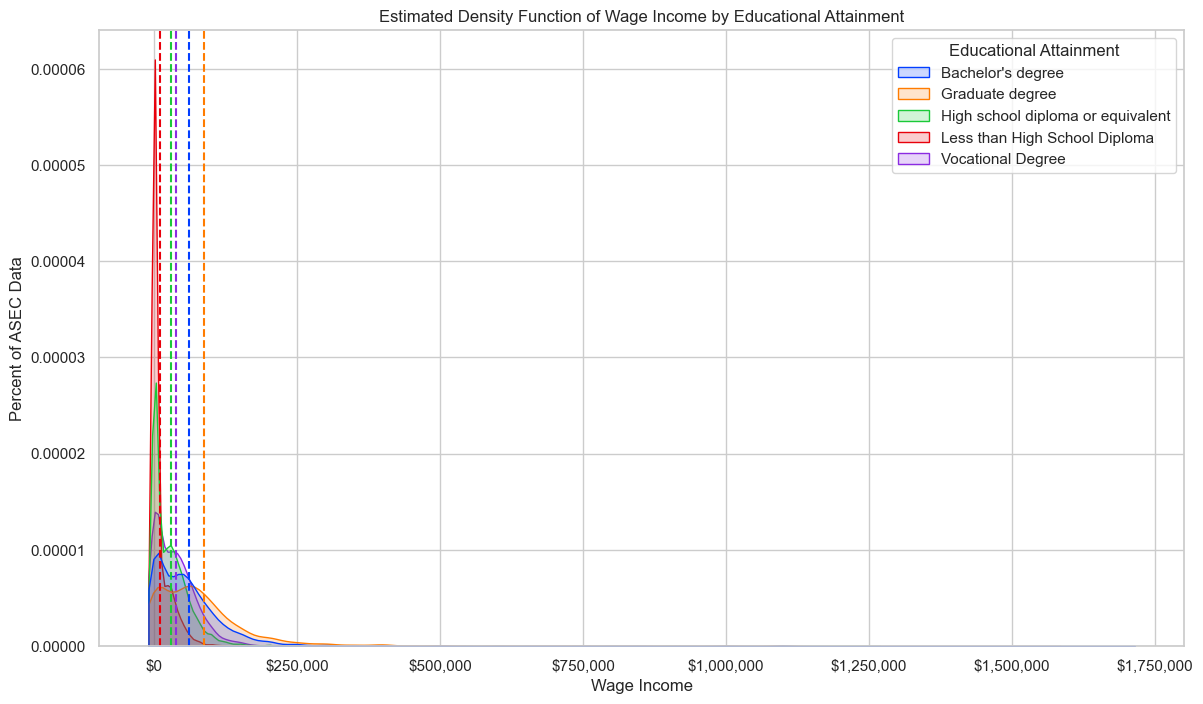

In [439]:
den_plot_by_x(
    df[df['Educational Attainment']!='Missing'], 
    'Educational Attainment',
    'Wage Income', 
    'ASECWT', 
    k=None, bbox=(0.5, -0.01), 
    legend_ncol=10,
    max_percentile=1., 
    addvline=True, 
    den_title='Estimated Density Function of Wage Income by Educational Attainment',
)

/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/2986280503.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['XWEIGHT'] = xdfss[xvar] * xdfss[wvar]


INCTOT_2
Educational Attainment                         
Bachelor's degree                  66298.396452
Graduate degree                    86978.805893
High school diploma or equivalent  35118.631437
Less than High School Diploma      12925.623165
Vocational Degree                  45467.850051

/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/2986280503.py:70: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


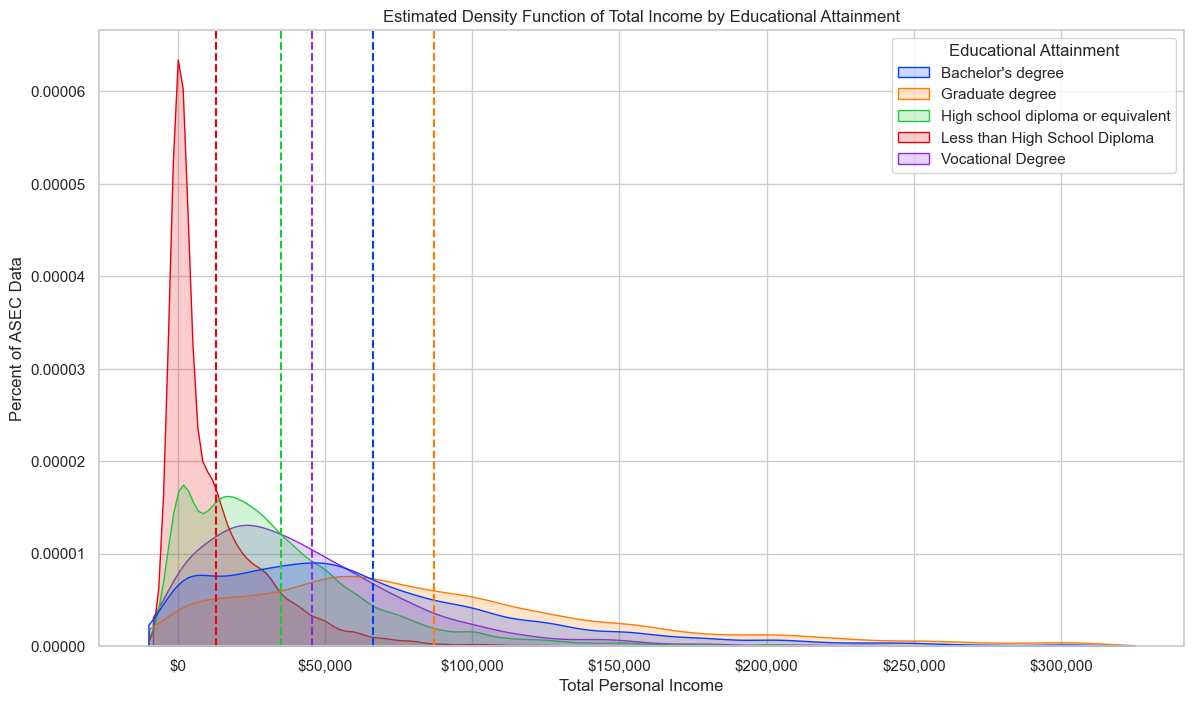

In [441]:
den_plot_by_x(df[df['Educational Attainment']!='Missing'], 
              'Educational Attainment', 
              'INCTOT_2', 'ASECWT', 
k=None, bbox=(0.5, -0.01), legend_ncol=10, max_percentile=0.99, addvline=True)

/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/2986280503.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['XWEIGHT'] = xdfss[xvar] * xdfss[wvar]


INCTOT_2
Educational Attainment                          
Bachelor's degree                    80312.73294
Graduate degree                    105934.037183
High school diploma or equivalent   46356.962685
Less than High School Diploma       25752.398679
Vocational Degree                   55799.883486

/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/2986280503.py:70: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


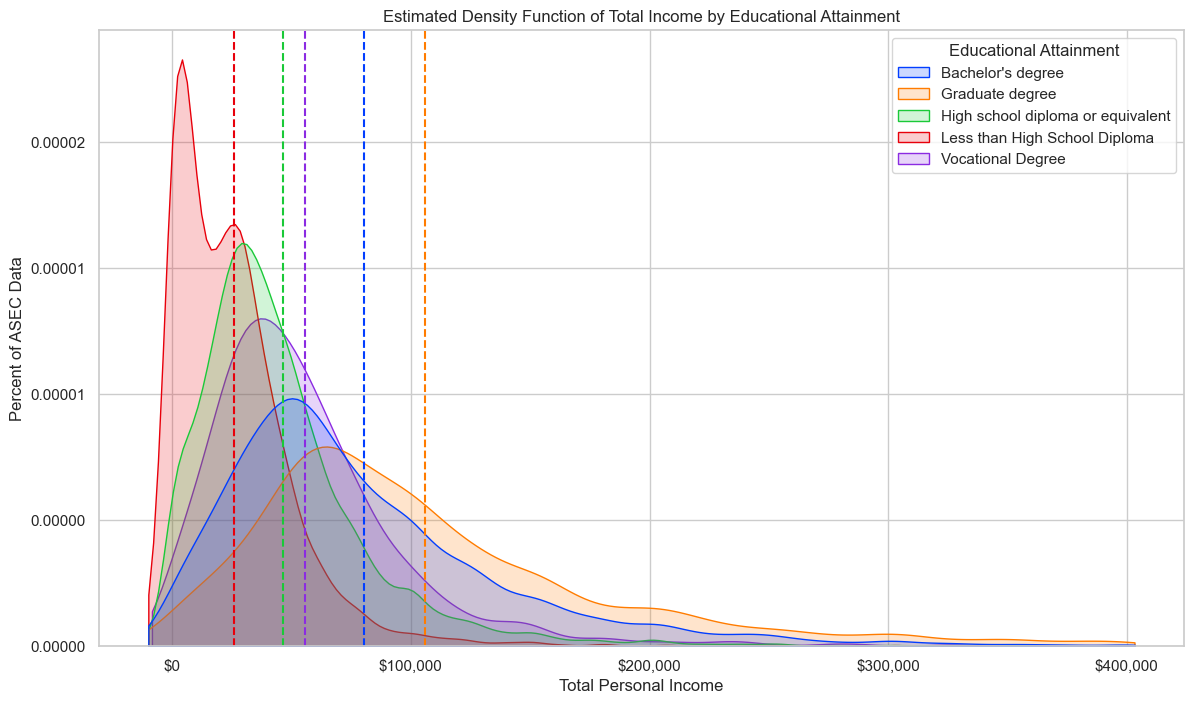

In [440]:
den_plot_by_x(df[df['LABFORCE']==2], 'Educational Attainment', 'INCTOT_2', 'ASECWT', 
                  k=None, bbox=(0.5, -0.01), legend_ncol=10, max_percentile=0.99, addvline=True)

/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/3733516444.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['XWEIGHT'] = xdfss[xvar] * xdfss[wvar]


final
Class_of_worker                              
Federal government employee      87669.291991
Local government employee         63621.64252
NIU                               4277.086577
Self-employed, incorporated      91658.387911
Self-employed, not incorporated  51116.360821
State government employee        65609.792527
Unpaid family worker             15435.825097
Wage/salary, private             60601.999611

/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/3733516444.py:70: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


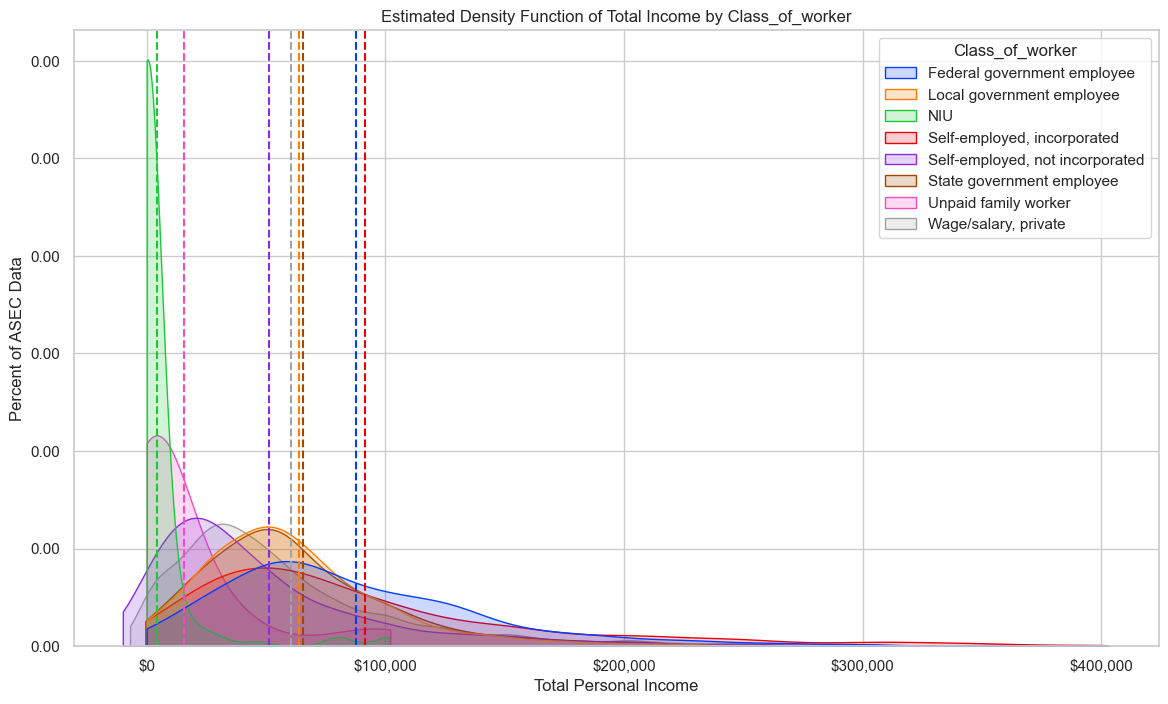

In [409]:
den_plot_by_x(df[df['LABFORCE']==2], 'Class_of_worker', 'INCTOT_2', 'ASECWT', 
                  k=None, bbox=(0.5, -0.04), legend_ncol=4, max_percentile=0.99, addvline=True)

/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/3733516444.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['XWEIGHT'] = xdfss[xvar] * xdfss[wvar]


final
Age_bucket                    
Age (14.0, 30.0]  36800.473556
Age (30.0, 45.0]  67025.898102
Age (45.0, 61.0]  73535.367502
Age (61.0, 85.0]  76273.836303

/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/3733516444.py:70: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


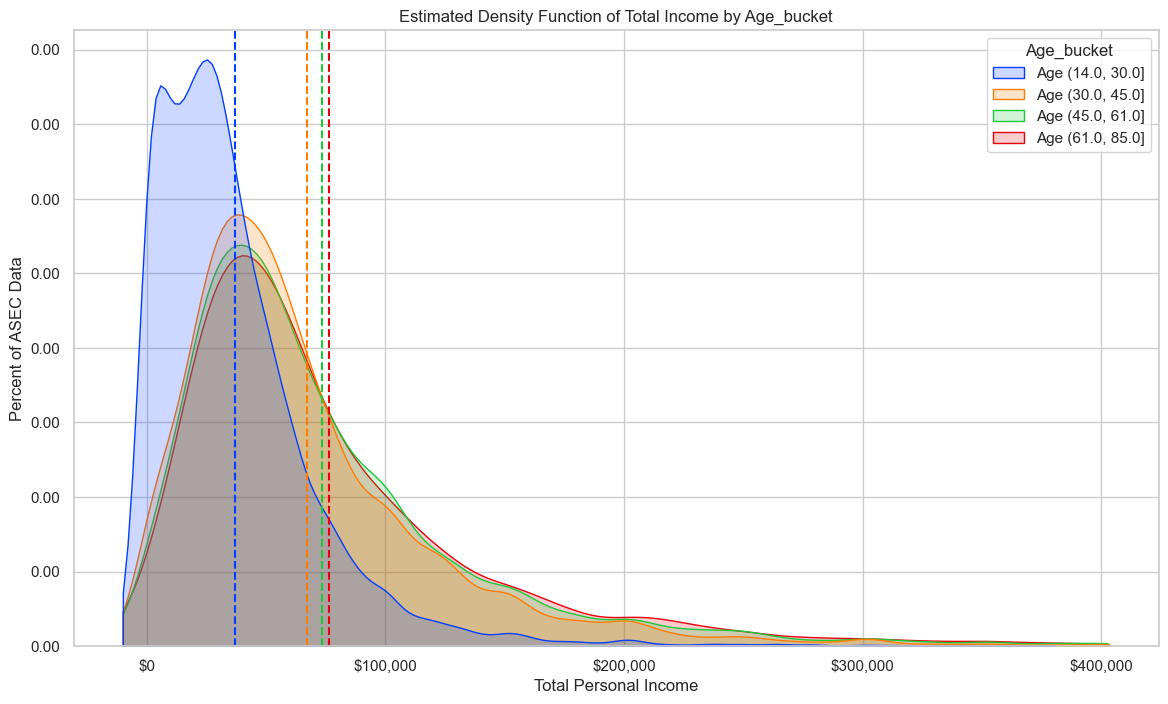

In [410]:
den_plot_by_x(df[df['LABFORCE']==2], 'Age_bucket', 'INCTOT_2', 'ASECWT', 
                  k=None, bbox=(0.5, -0.04), legend_ncol=4, max_percentile=0.99, addvline=True)

reducing records from 73863 to 71682
reducing groups from 26 to 5


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/3733516444.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['XWEIGHT'] = xdfss[xvar] * xdfss[wvar]


final
Race                                      
American Indian/Aleut/Eskimo  42603.081472
Asian only                    76507.130368
Black                         49329.397855
White                         63715.409962

/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/3733516444.py:70: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


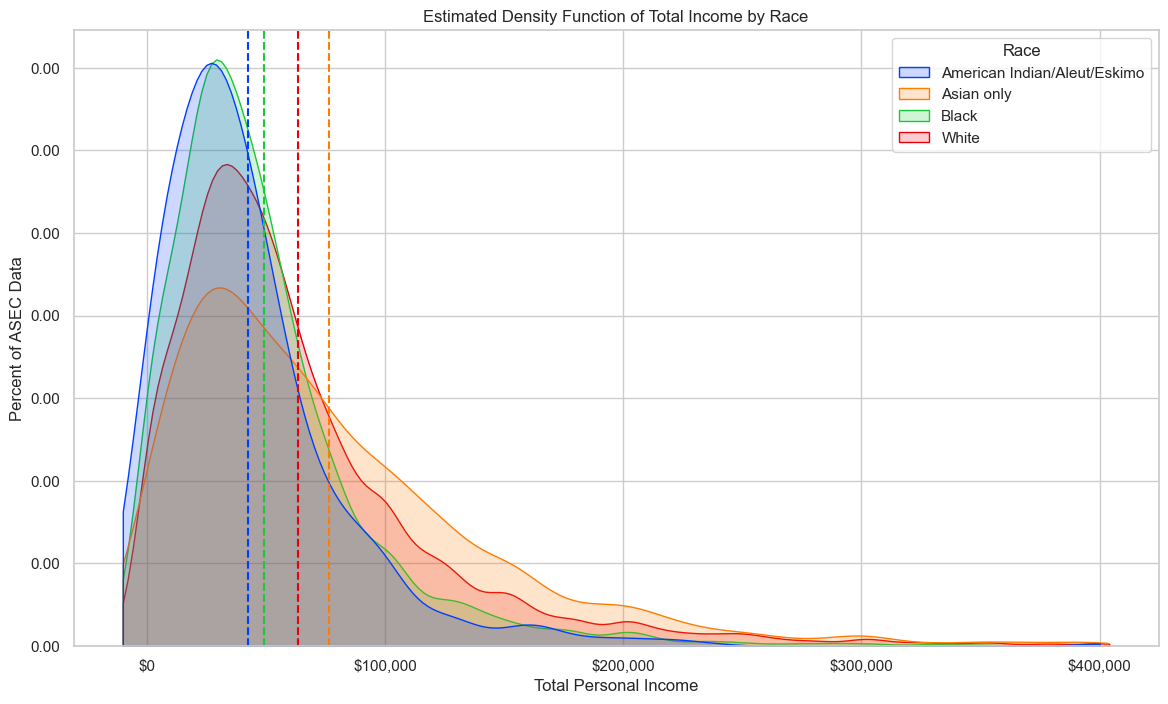

In [411]:
den_plot_by_x(df[df['LABFORCE']==2], 'Race', 'INCTOT_2', 'ASECWT', 
                  k=5, bbox=(0.5, -0.04), legend_ncol=4, max_percentile=0.99, addvline=True)

/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/2795832023.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


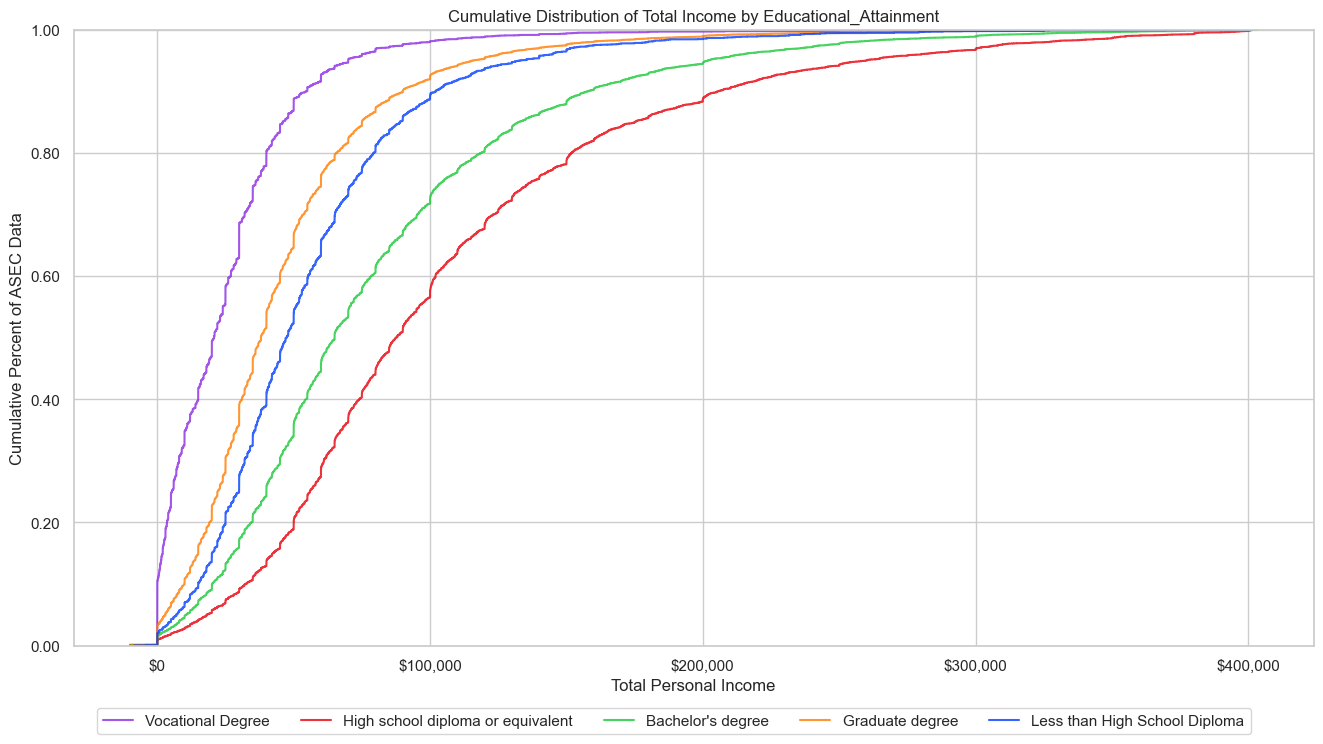

In [412]:
cdf_plot_by_x(df[df['LABFORCE']==2], 'Educational_Attainment', 'INCTOT_2', 'ASECWT', 
                  k=None, bbox=(0.5, -0.01), legend_ncol=10, max_percentile=0.99)

/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/2795832023.py:109: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


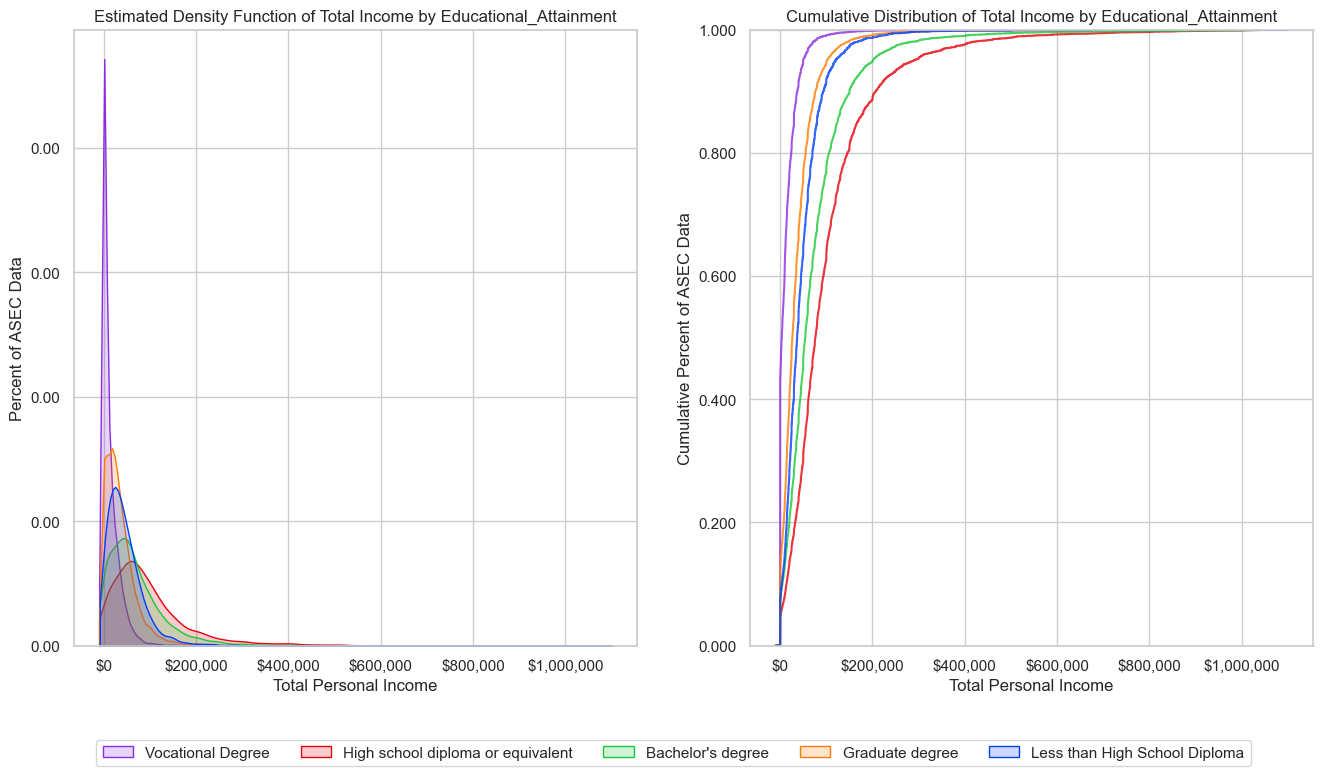

In [413]:
den_cdf_plot_by_x(df, 'Educational_Attainment', 'INCTOT_2', 'ASECWT', 
                  k=None, bbox=(0.5, -0.05), legend_ncol=10, max_percentile=0.999)

/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/2795832023.py:109: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


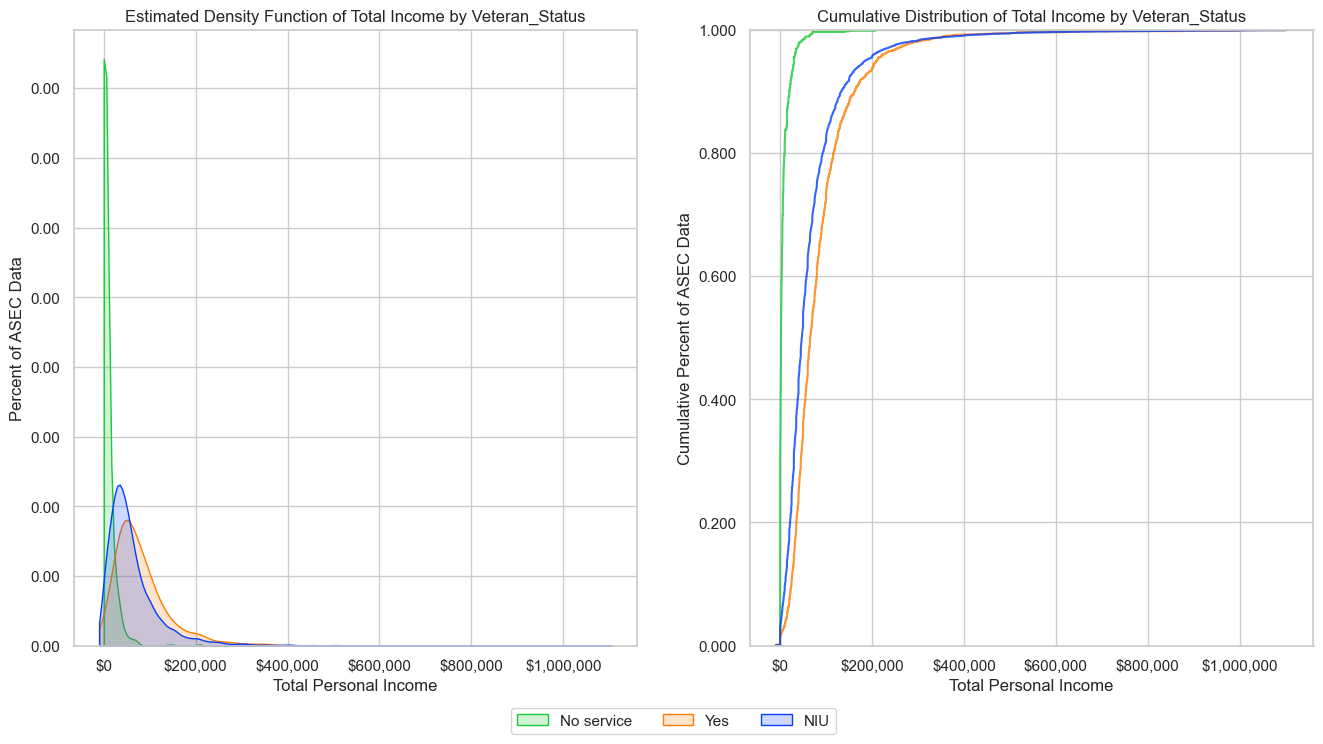

In [414]:
den_cdf_plot_by_x(
    df[df['LABFORCE']==2], 'Veteran_Status', 'INCTOT_2', 'ASECWT', 
    k=None, bbox=(0.5, -0.01), legend_ncol=5, 
    max_percentile=0.999,
)

reducing records from 73863 to 72717
reducing groups from 8 to 6


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/2795832023.py:109: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


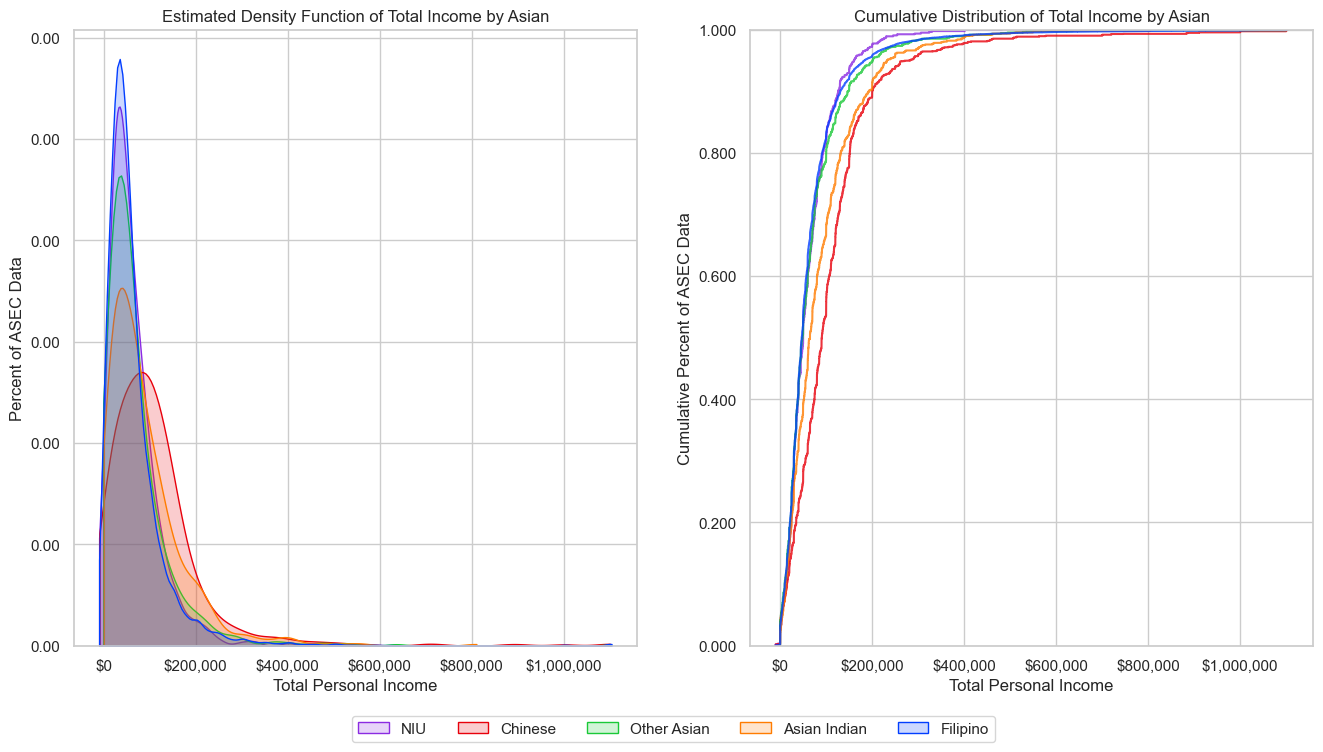

In [415]:
den_cdf_plot_by_x(
    df[df['LABFORCE']==2], 'Asian', 'INCTOT_2', 'ASECWT', k=6, 
    bbox=(0.5, -0.02), legend_ncol=10, max_percentile=0.999,
)

reducing records from 73863 to 71418
reducing groups from 9 to 6


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_30240/331875114.py:149: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


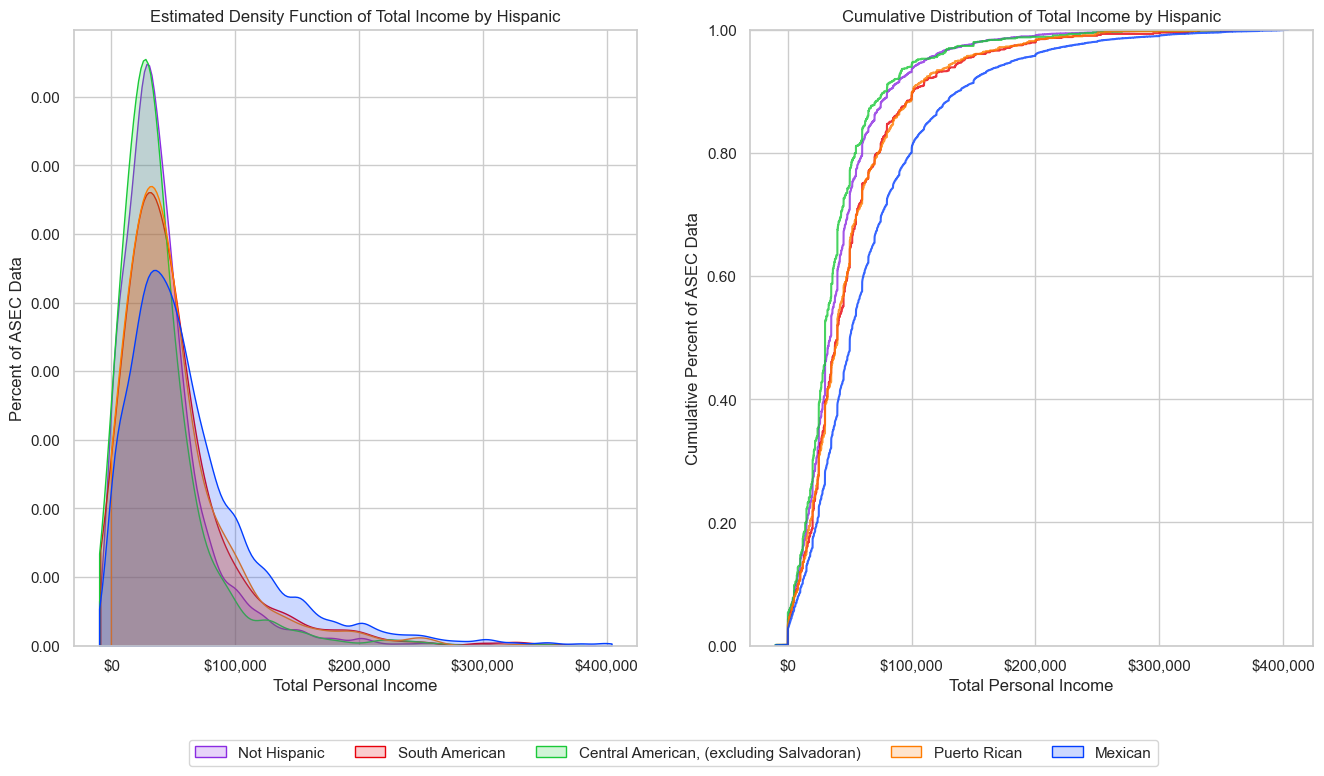

In [86]:
den_cdf_plot_by_x(
    df[df['LABFORCE']==2], 'Hispanic', 'INCTOT_2', 'ASECWT', 
    k=6, bbox=(0.5, -0.05), legend_ncol=5, 
    max_percentile=0.99,
)

reducing records from 73863 to 71486
reducing groups from 8 to 6


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_30240/331875114.py:149: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


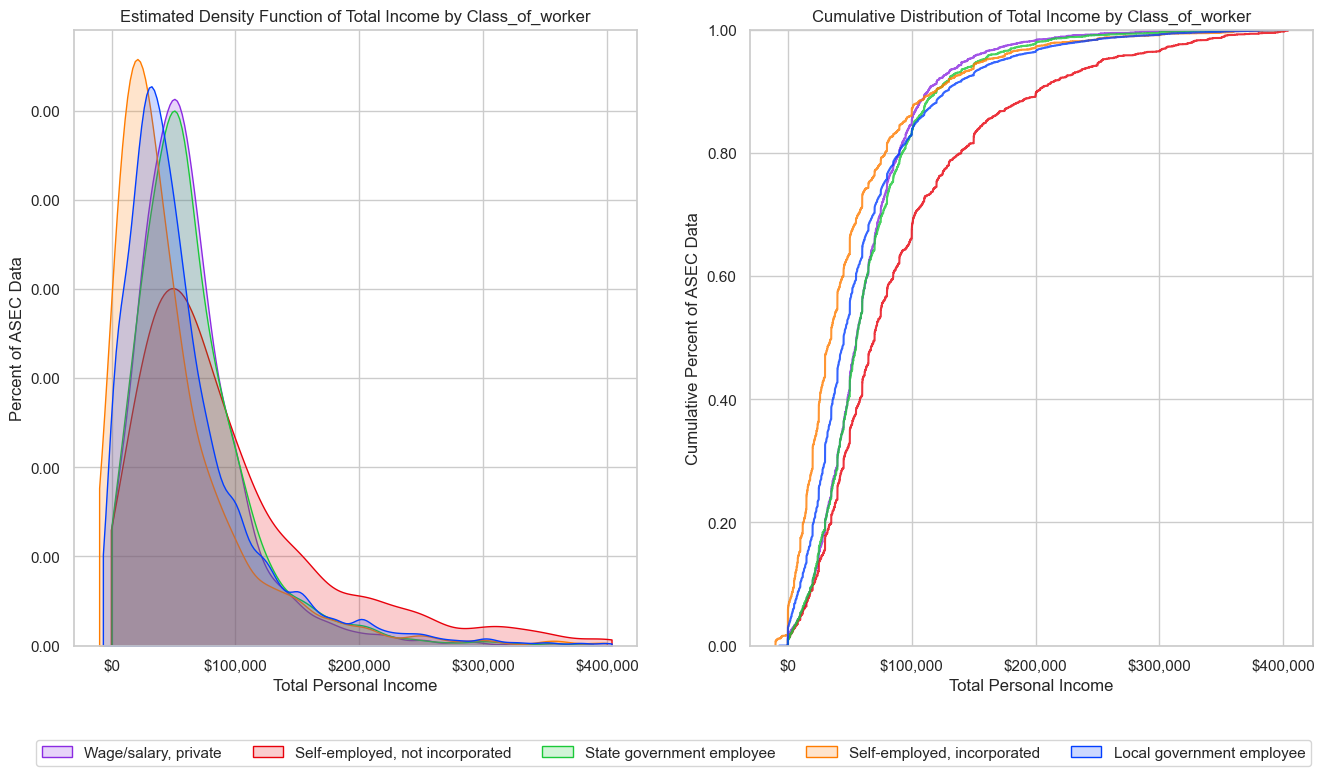

In [88]:
den_cdf_plot_by_x(df[df['LABFORCE']==2], 'Class_of_worker', 'INCTOT_2', 'ASECWT', k=6, bbox=(0.5, -0.05), legend_ncol=5, max_percentile=0.99)

reducing records from 73863 to 72772
reducing groups from 6 to 6


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_30240/331875114.py:149: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


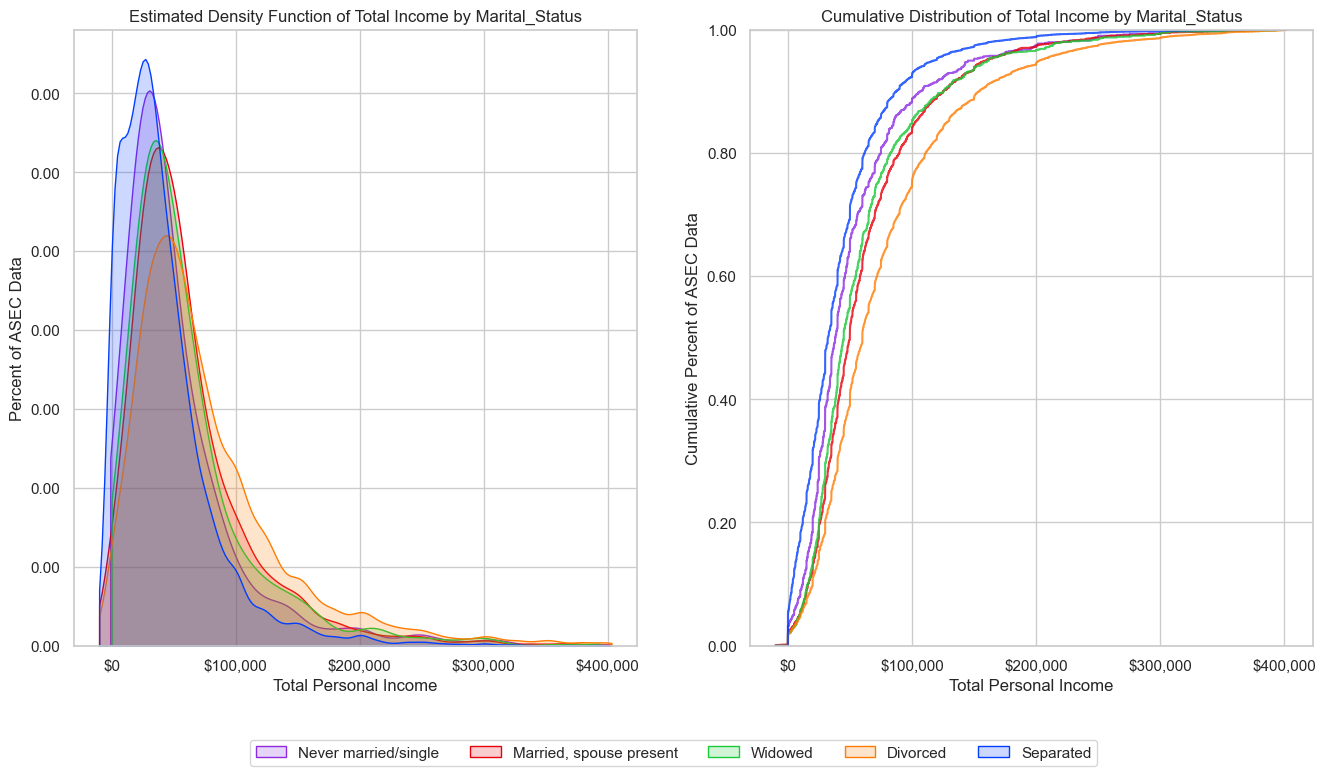

In [89]:
den_cdf_plot_by_x(
    df[df['LABFORCE']==2], 'Marital_Status', 'INCTOT_2', 'ASECWT', k=6, bbox=(0.5, -0.05), 
    legend_ncol=5, max_percentile=0.99
)

In [90]:
df['Age'] = df['AGE'].astype(float)

reducing records from 73863 to 67317
reducing groups from 160 to 10


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_30240/331875114.py:149: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


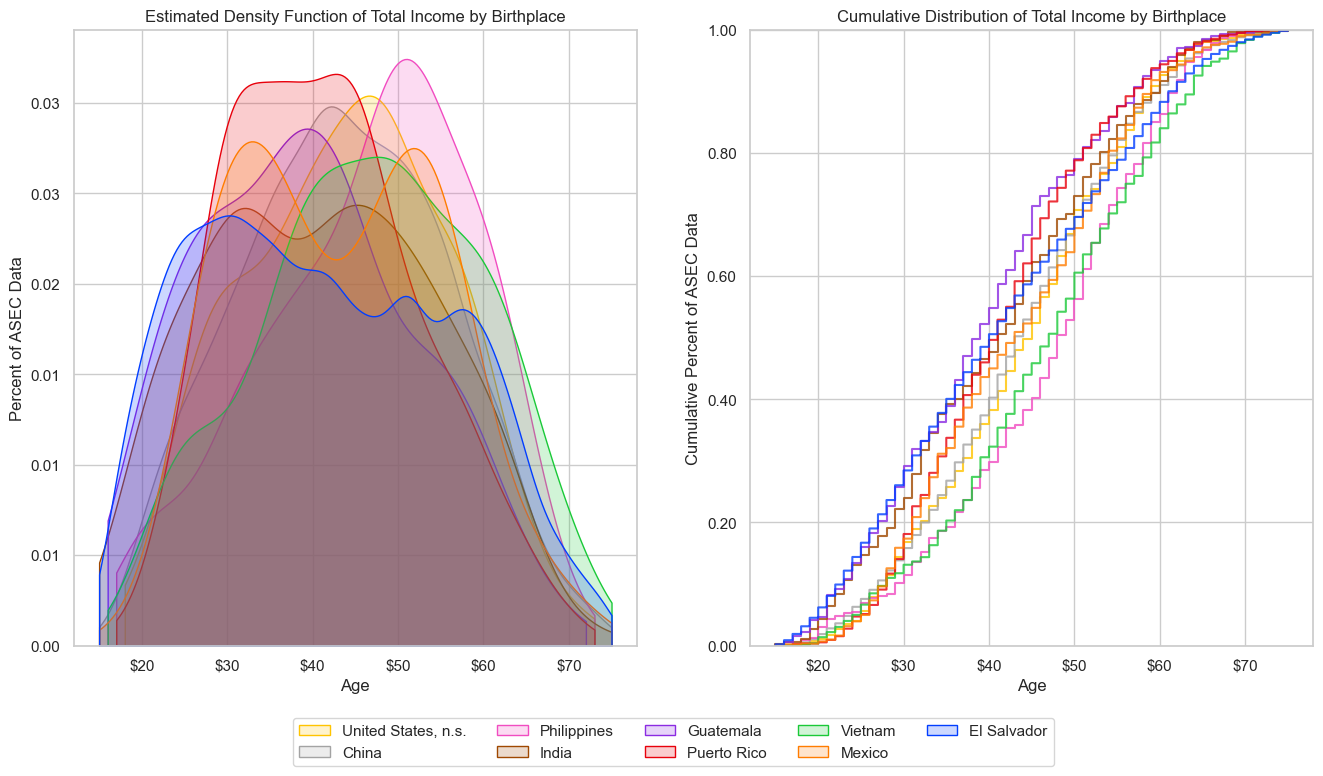

In [91]:
den_cdf_plot_by_x(df[df['LABFORCE']==2], 'Birthplace', 'Age', 'ASECWT', k=10, bbox=(0.5, -0.05), legend_ncol=5, max_percentile=0.99)

reducing records from 73863 to 67317
reducing groups from 160 to 10


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_30240/331875114.py:149: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


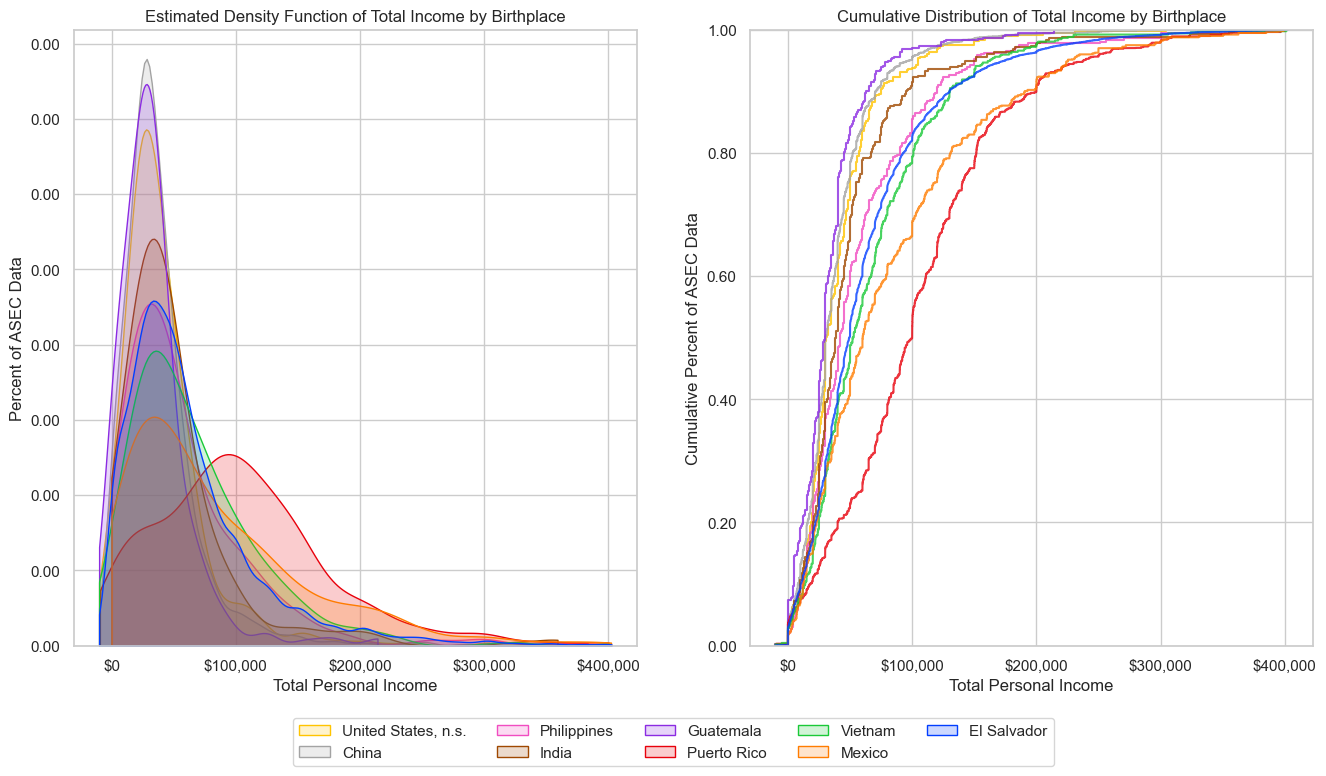

In [92]:
den_cdf_plot_by_x(df[df['LABFORCE']==2], 'Birthplace', 'INCTOT_2', 'ASECWT', k=10, bbox=(0.5, -0.05), legend_ncol=5, max_percentile=0.99)

reducing records from 73863 to 73863
reducing groups from 4 to 10


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_30240/331875114.py:149: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


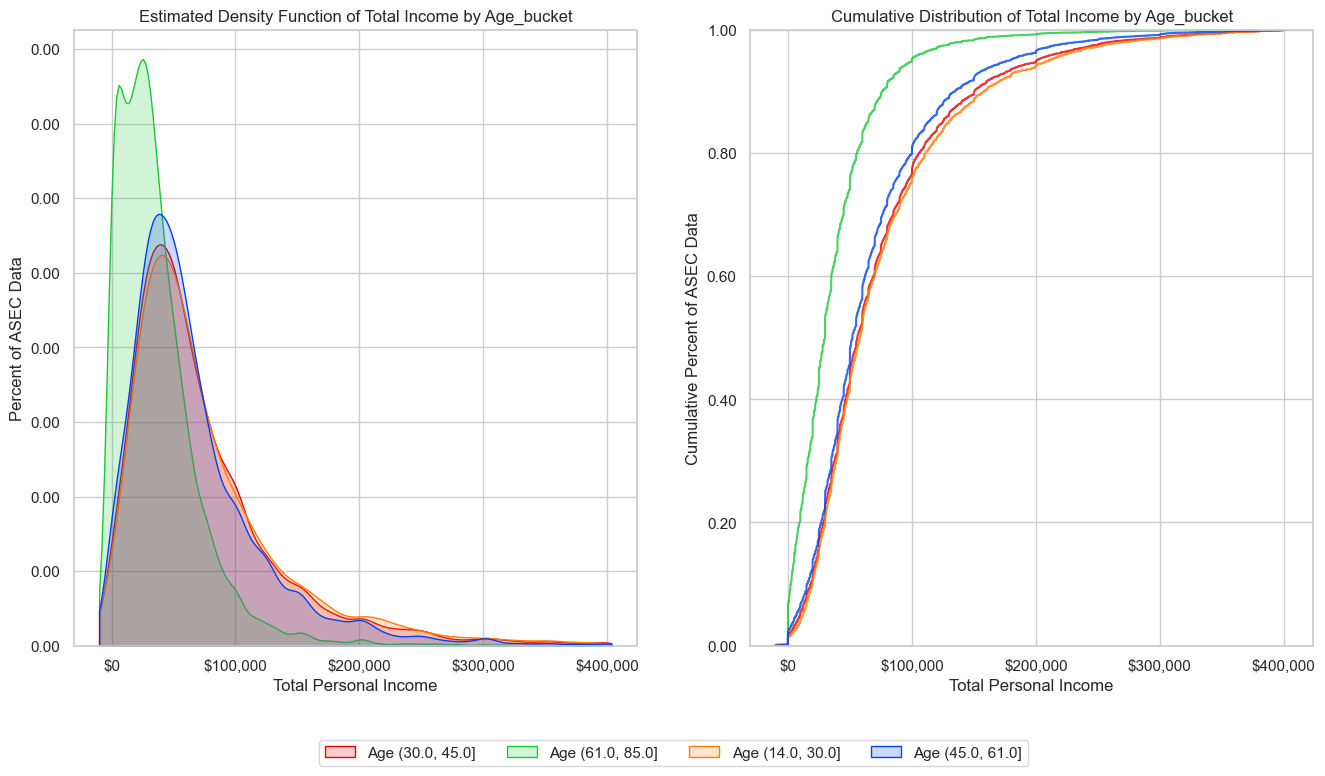

In [93]:
den_cdf_plot_by_x(df[df['LABFORCE']==2], 'Age_bucket', 'INCTOT_2', 'ASECWT', k=10, bbox=(0.5, -0.05), legend_ncol=5, max_percentile=0.99)

reducing records from 73863 to 73863
reducing groups from 5 to 10


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_30240/331875114.py:149: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


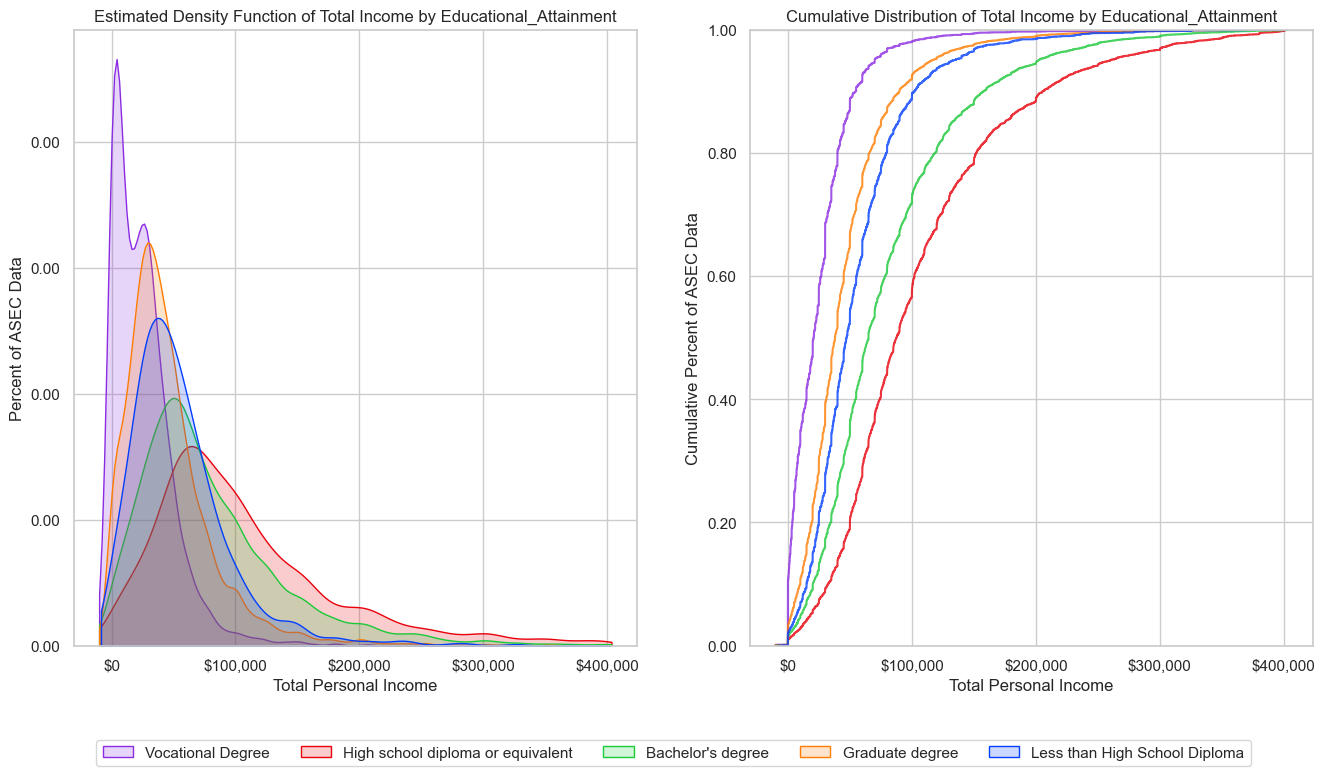

In [94]:
den_cdf_plot_by_x(df[df['LABFORCE']==2], 'Educational_Attainment', 'INCTOT_2', 'ASECWT', k=10, bbox=(0.5, -0.05), legend_ncol=5, max_percentile=0.99)

reducing records from 73863 to 71682
reducing groups from 26 to 5


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_30240/331875114.py:149: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


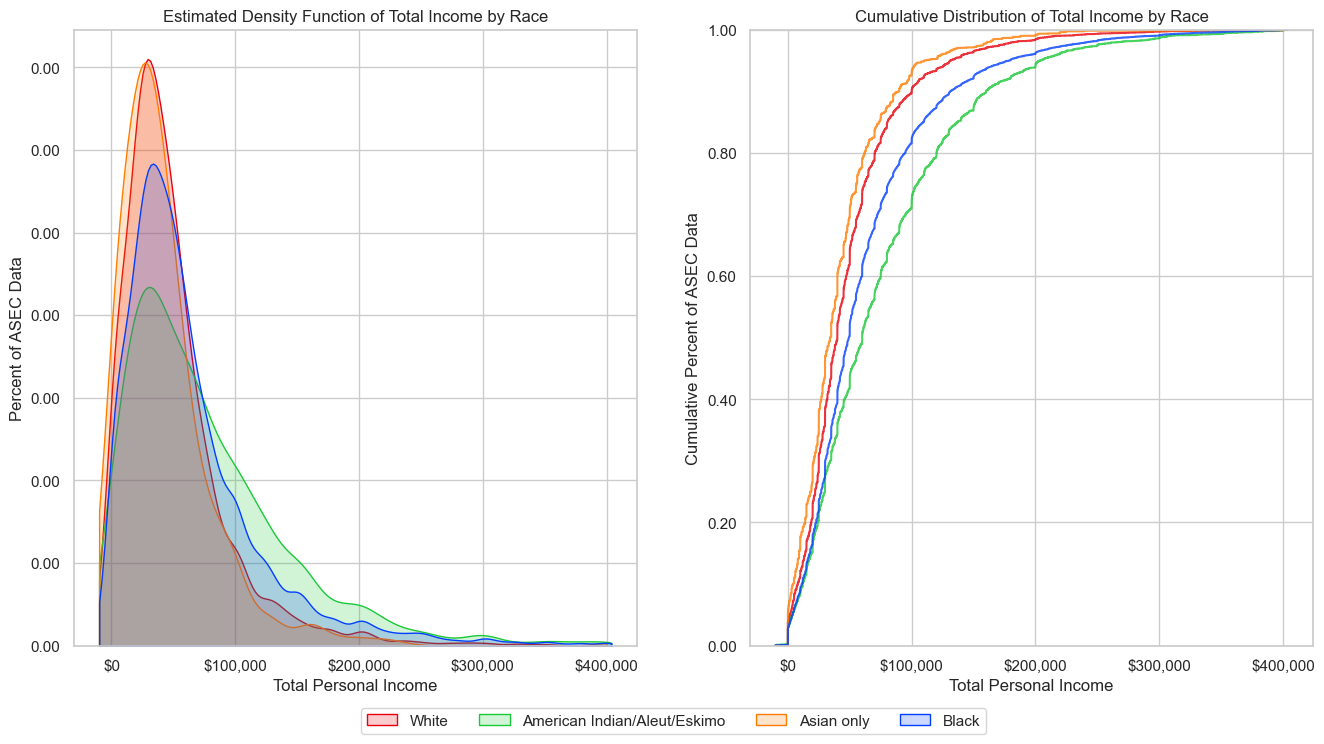

In [95]:
den_cdf_plot_by_x(df[df['LABFORCE']==2], 'Race', 'INCTOT_2', 'ASECWT', k=5, bbox=(0.5, -0.01), legend_ncol=5, max_percentile=0.99)

# Inheritance

In [433]:
inheritence = pd.read_html("https://budgetmodel.wharton.upenn.edu/issues/2021/7/16/inheritances-by-age-and-income-group")
idf = inheritence[0]
idff = pd.DataFrame(idf[['Income','All Ages']].values[0:-1], columns=['Income Percentile', 'Median Inheritance'])
idff['Median Inheritance'] = idff['Median Inheritance'].str.replace(",|\$", "").astype(int)

/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/1434188404.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  idff['Median Inheritance'] = idff['Median Inheritance'].str.replace(",|\$", "").astype(int)


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/780848752.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


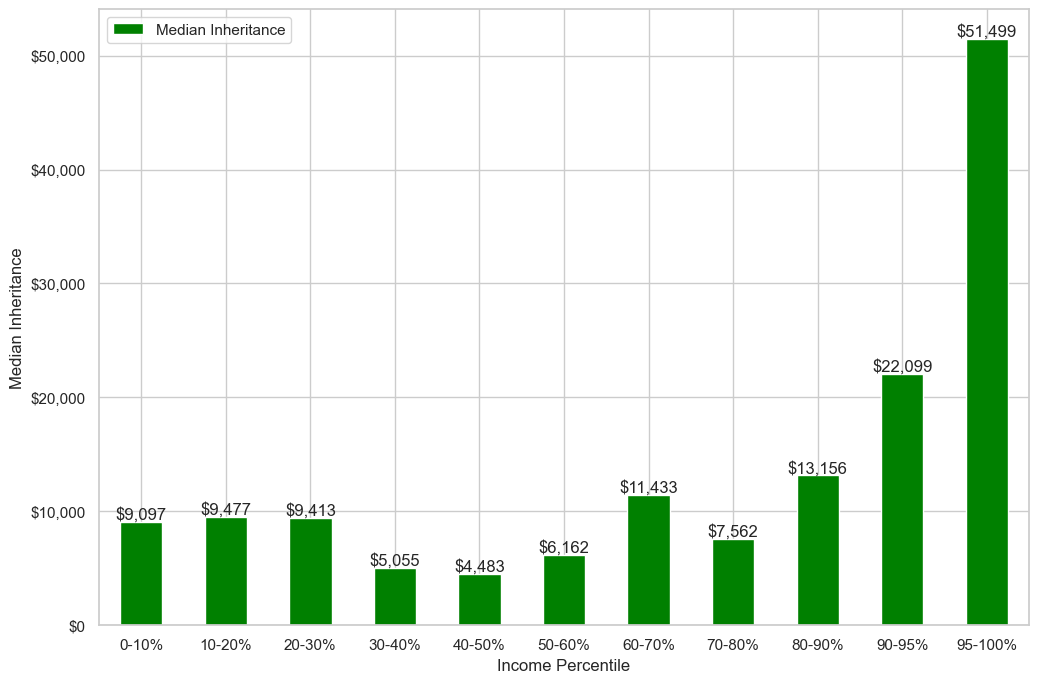

In [434]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))
idff.plot(kind='bar', x='Income Percentile', y='Median Inheritance', ax=ax1, color='green', grid=True, zorder=1)
ax1.set_xlabel("Income Percentile")
ax1.set_ylabel(f"Median Inheritance")
ax1.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax1.bar_label(ax1.containers[0], label_type='edge',  fmt='${:,.0f}')

plt.xticks(rotation='horizontal')
fig.show()

# FICO

In [472]:
# Retrieved from:
# https://www.fico.com/blogs/average-us-fico-score-718

fico_scores_data = {
    "FICO_Score_Range": ["300-499", "500-549", "550-599", "600-649", "650-699", "700-749", "750-799", "800-850", "Total"],
    "April_2005": [6.8, 8.1, 8.7, 10.0, 13.1, 16.5, 20.4, 16.2, 100.0],
    "April_2006": [6.2, 8.0, 8.9, 10.2, 12.8, 16.5, 20.0, 17.4, 100.0],
    "April_2007": [6.3, 7.9, 8.9, 10.1, 12.5, 16.1, 19.9, 18.2, 100.0],
    "April_2008": [7.2, 8.2, 8.7, 9.6, 12.0, 16.0, 19.6, 18.7, 100.0],
    "April_2009": [7.3, 8.7, 9.1, 9.5, 12.0, 15.9, 19.3, 18.2, 100.0],
    "April_2010": [6.9, 9.0, 9.6, 9.5, 11.9, 15.7, 19.5, 17.9, 100.0],
    "April_2011": [6.3, 8.7, 9.9, 9.8, 12.1, 15.6, 19.6, 18.1, 100.0],
    "April_2012": [5.7, 8.4, 9.4, 10.1, 12.2, 16.3, 18.9, 18.5, 100.0],
    "April_2013": [5.6, 8.1, 9.6, 10.2, 12.8, 16.4, 18.2, 19.3, 100.0],
    "April_2014": [5.4, 7.6, 9.4, 10.3, 13.0, 16.6, 18.5, 19.9, 100.0],
    "April_2015": [4.9, 7.6, 9.4, 10.3, 13.3, 16.9, 18.5, 20.4, 100.0],
    "April_2016": [4.6, 7.1, 9.0, 10.0, 13.2, 17.1, 19.0, 20.7, 100.0],
    "April_2017": [4.7, 6.8, 8.5, 9.6, 13.2, 16.2, 20.2, 21.8, 100.0],
    "April_2018": [4.2, 6.8, 8.1, 9.6, 13.0, 16.2, 20.7, 22.3, 100.0],
    "April_2019": [4.3, 6.8, 7.8, 9.3, 12.5, 16.1, 20.7, 22.3, 100.0],
    "April_2020": [4.2, 6.8, 7.7, 9.1, 12.2, 16.1, 20.7, 23.0, 100.0],
    "April_2021": [3.0, 5.4, 7.1, 9.2, 12.4, 16.4, 23.1, 23.3, 100.0],
    "April_2022": [2.9, 5.5, 6.8, 9.1, 12.4, 16.4, 23.6, 23.3, 100.0],
    "April_2023": [2.8, 5.7, 6.8, 9.1, 12.4, 16.4, 23.6, 24.1, 100.0]
}

# Convert the dictionary into a Pandas DataFrame
fico_df = pd.DataFrame(fico_scores_data)

array(['300-499', '500-549', '550-599', '600-649', '650-699', '700-749',
       '750-799', '800-850'], dtype=object)

In [501]:
fico_df.head()

FICO_Score_Range  April_2005  April_2006  April_2007  April_2008  \
0          300-499         6.8         6.2         6.3         7.2   
1          500-549         8.1         8.0         7.9         8.2   
2          550-599         8.7         8.9         8.9         8.7   
3          600-649        10.0        10.2        10.1         9.6   
4          650-699        13.1        12.8        12.5        12.0   

   April_2009  April_2010  April_2011  April_2012  April_2013  April_2014  \
0         7.3         6.9         6.3         5.7         5.6         5.4   
1         8.7         9.0         8.7         8.4         8.1         7.6   
2         9.1         9.6         9.9         9.4         9.6         9.4   
3         9.5         9.5         9.8        10.1        10.2        10.3   
4        12.0        11.9        12.1        12.2        12.8        13.0   

   April_2015  April_2016  April_2017  April_2018  April_2019  April_2020  \
0         4.9         4.6         4.7         4.2         4.3         4.2   
1         7.6         7.1         6.8         6.8         6.8         6.8   
2         9.4         9.0         8.5         8.1         7.8         7.7   
3        10.3        10.0         9.6         9.6         9.3         9.1   
4        13.3        13.2        13.2        13.0        12.5        12.2   

   April_2021  April_2022  April_2023  
0         3.0         2.9         2.8  
1         5.4         5.5         5.7  
2         7.1         6.8         6.8  
3         9.2         9.1         9.1  
4        12.4        12.4        12.4

In [537]:
fdf = pd.DataFrame(fico_df.T.values[1:,:], columns=fico_df['FICO_Score_Range'].values).set_index(fico_df.columns[1:])

In [538]:
# fdf.index = [pd.to_datetime(j.replace("April_", "04-01-")) for j in fdf.index]
# fdf.index = [j.replace("April_", "04-01-") for j in fdf.index]
fdf.index = [int(j.replace("April_", "")) for j in fdf.index]

In [571]:
fdf.head()

300-499 500-549 550-599 600-649 650-699 700-749 750-799 800-850  Total
2005     6.8     8.1     8.7    10.0    13.1    16.5    20.4    16.2  100.0
2006     6.2     8.0     8.9    10.2    12.8    16.5    20.0    17.4  100.0
2007     6.3     7.9     8.9    10.1    12.5    16.1    19.9    18.2  100.0
2008     7.2     8.2     8.7     9.6    12.0    16.0    19.6    18.7  100.0
2009     7.3     8.7     9.1     9.5    12.0    15.9    19.3    18.2  100.0

In [563]:
fdf.tail()

300-499 500-549 550-599 600-649 650-699 700-749 750-799 800-850  Total
2019     4.3     6.8     7.8     9.3    12.5    16.1    20.7    22.3  100.0
2020     4.2     6.8     7.7     9.1    12.2    16.1    20.7    23.0  100.0
2021     3.0     5.4     7.1     9.2    12.4    16.4    23.1    23.3  100.0
2022     2.9     5.5     6.8     9.1    12.4    16.4    23.6    23.3  100.0
2023     2.8     5.7     6.8     9.1    12.4    16.4    23.6    24.1  100.0

In [598]:
fdf.tail(1)[fdf.columns[0:-1]].sum()

300-499     2.8
500-549     5.7
550-599     6.8
600-649     9.1
650-699    12.4
700-749    16.4
750-799    23.6
800-850    24.1
dtype: object

In [569]:
fdf.tail(1)[fdf.columns[0:-3]]

300-499 500-549 550-599 600-649 650-699 700-749
2023     2.8     5.7     6.8     9.1    12.4    16.4

In [599]:
fdf.tail(1)[fdf.columns[0:-3]].sum().sum() + 19

72.19999999999999

In [583]:
from matplotlib.ticker import FormatStrFormatter

/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/3817410186.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([f'{x:.0f}%' for x in ax1.get_yticks()])
/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_5846/3817410186.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


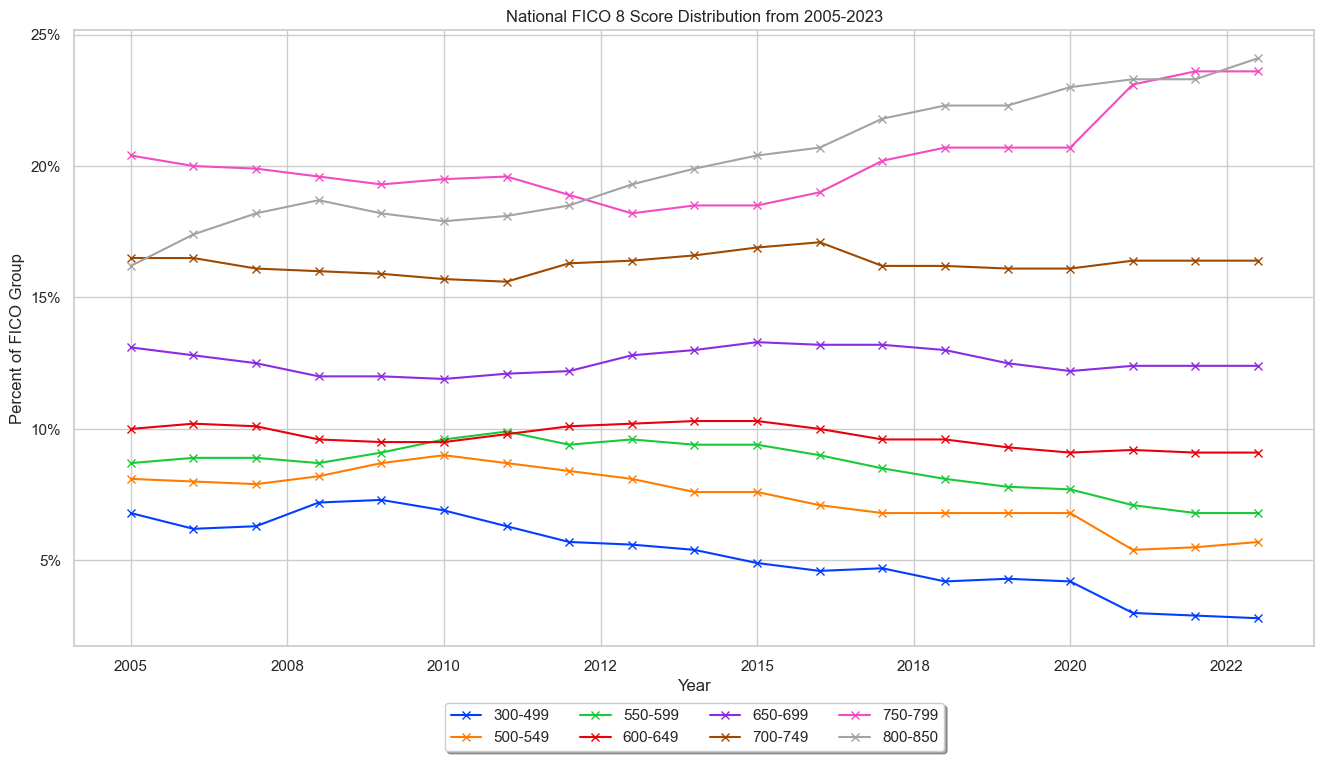

In [591]:
sns.set_palette("bright")
fig, ax1 = plt.subplots(1, 1, figsize=(16, 8))
fdf.reset_index().drop('Total', axis=1).plot(x='index', kind='line', marker='x', ax=ax1, grid=True, title='National FICO 8 Score Distribution from 2005-2023')
ax1.set_xlabel("Year")
ax1.set_ylabel("Percent of FICO Group")
ax1.set_yticklabels([f'{x:.0f}%' for x in ax1.get_yticks()]) 
ax1.get_xaxis().set_major_formatter(FormatStrFormatter('%.0f')) 
# plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places


# ax1.set_xticklabels([j for j in fdf.index])
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08),
          fancybox=True, shadow=True, ncol=4)

fig.show()